## Data import and DataFrame preparation

In [11]:
import pandas as pd
import json
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_profiling 

with open('..\\tosca-metrics\\results\\industry_metric_results_7.json') as f:
#with open('..\\tosca-metrics\\results\\example_metric_results_6.json') as f:
    data = json.load(f)

flat_dict = {}
for key, value in data.items():
    df = pd.io.json.json_normalize(value, sep='_')
    value = df.to_dict(orient='records')[0]
    flat_dict[key] = value

df = pd.DataFrame.from_dict(flat_dict, orient='index')
df = df = df[df.columns.drop(list(df.filter(regex='msg')))]


In [12]:
df.columns

Index(['loc_count', 'bloc_count', 'cloc_count', 'dpt_count', 'etp_count', 'nco_count',
       'nkeys_count', 'ntkn_count', 'nscm_count', 'na_count', 'nc_count', 'nc_min', 'nc_max',
       'nc_median', 'nc_mean', 'ni_count', 'nif_count', 'ninp_count', 'ninpc_count', 'nn_count',
       'nnt_count', 'nout_count', 'np_count', 'np_min', 'np_max', 'np_median', 'np_mean',
       'nr_count', 'nrt_count', 'ttb_check', 'cdnt_count', 'cdrt_count', 'cdat_count',
       'cdct_count', 'cddt_count', 'cdgt_count', 'cdit_count', 'cdpt_count', 'nw_count',
       'tdb_check', 'nrq_count', 'nsh_count', 'ncys_count', 'tob_check', 'ngc_count', 'ngp_count',
       'ngro_count', 'npol_count', 'nf_count'],
      dtype='object')

## Data visualization

In [13]:
df.dtypes

loc_count      float64
bloc_count     float64
cloc_count     float64
dpt_count      float64
etp_count      float64
nco_count      float64
nkeys_count    float64
ntkn_count     float64
nscm_count     float64
na_count       float64
nc_count       float64
nc_min         float64
nc_max         float64
nc_median      float64
nc_mean        float64
ni_count       float64
nif_count      float64
ninp_count     float64
ninpc_count    float64
nn_count       float64
nnt_count      float64
nout_count     float64
np_count       float64
np_min         float64
np_max         float64
np_median      float64
np_mean        float64
nr_count       float64
nrt_count      float64
ttb_check       object
cdnt_count     float64
cdrt_count     float64
cdat_count     float64
cdct_count     float64
cddt_count     float64
cdgt_count     float64
cdit_count     float64
cdpt_count     float64
nw_count       float64
tdb_check       object
nrq_count      float64
nsh_count      float64
ncys_count     float64
tob_check  

In [14]:
df.head()

loc_count  bloc_count  cloc_count  dpt_count  \
C:\Users\s145559\OneDrive - TU Eindhoven\School...      114.0        11.0         8.0        8.0   
C:\Users\s145559\OneDrive - TU Eindhoven\School...       85.0        12.0         7.0        4.0   
C:\Users\s145559\OneDrive - TU Eindhoven\School...       85.0        12.0         7.0        4.0   
C:\Users\s145559\OneDrive - TU Eindhoven\School...       67.0         3.0         6.0        6.0   
C:\Users\s145559\OneDrive - TU Eindhoven\School...        7.0         2.0         0.0        3.0   

                                                    etp_count  nco_count  nkeys_count  ntkn_count  \
C:\Users\s145559\OneDrive - TU Eindhoven\School...       4.77        0.0        114.0       159.0   
C:\Users\s145559\OneDrive - TU Eindhoven\School...       6.87        0.0         61.0       367.0   
C:\Users\s145559\OneDrive - TU Eindhoven\School...       6.87        0.0         61.0       367.0   
C:\Users\s145559\OneDrive - TU Eindhoven\School...       5.63        0.0         54.0       182.0   
C:\Users\s145559\OneDrive - TU Eindhoven\School...       3.70        0.0          6.0        13.0   

                                                    nscm_count  na_count  nc_count  nc_min  \
C:\Users\s145559\OneDrive - TU Eindhoven\School...         0.0       0.0       0.0     0.0   
C:\Users\s145559\OneDrive - TU Eindhoven\School...         0.0       0.0       0.0     0.0   
C:\Users\s145559\OneDrive - TU Eindhoven\School...         0.0       0.0       0.0     0.0   
C:\Users\s145559\OneDrive - TU Eindhoven\School...         0.0       0.0       0.0     0.0   
C:\Users\s145559\OneDrive - TU Eindhoven\School...         0.0       0.0       0.0     0.0   

                                                    nc_max  nc_median  nc_mean  ni_count  \
C:\Users\s145559\OneDrive - TU Eindhoven\School...     0.0        0.0      0.0       0.0   
C:\Users\s145559\OneDrive - TU Eindhoven\School...     0.0        0.0      0.0       0.0   
C:\Users\s145559\OneDrive - TU Eindhoven\School...     0.0        0.0      0.0       0.0   
C:\Users\s145559\OneDrive - TU Eindhoven\School...     0.0        0.0      0.0       0.0   
C:\Users\s145559\OneDrive - TU Eindhoven\School...     0.0        0.0      0.0       0.0   

                                                    nif_count  ninp_count  ninpc_count  nn_count  \
C:\Users\s145559\OneDrive - TU Eindhoven\School...        9.0        13.0          0.0       0.0   
C:\Users\s145559\OneDrive - TU Eindhoven\School...        0.0         0.0          0.0       0.0   
C:\Users\s145559\OneDrive - TU Eindhoven\School...        0.0         0.0          0.0       0.0   
C:\Users\s145559\OneDrive - TU Eindhoven\School...        0.0         0.0          0.0       0.0   
C:\Users\s145559\OneDrive - TU Eindhoven\School...        0.0         0.0          0.0       0.0   

                                                    nnt_count  nout_count  np_count  np_min  \
C:\Users\s145559\OneDrive - TU Eindhoven\School...        0.0         0.0       0.0     0.0   
C:\Users\s145559\OneDrive - TU Eindhoven\School...        0.0         0.0       0.0     0.0   
C:\Users\s145559\OneDrive - TU Eindhoven\School...        0.0         0.0       0.0     0.0   
C:\Users\s145559\OneDrive - TU Eindhoven\School...        0.0         0.0       0.0     0.0   
C:\Users\s145559\OneDrive - TU Eindhoven\School...        0.0         0.0       0.0     0.0   

                                                    np_max  np_median  np_mean  nr_count  \
C:\Users\s145559\OneDrive - TU Eindhoven\School...     0.0        0.0      0.0       0.0   
C:\Users\s145559\OneDrive - TU Eindhoven\School...     0.0        0.0      0.0       0.0   
C:\Users\s145559\OneDrive - TU Eindhoven\School...     0.0        0.0      0.0       0.0   
C:\Users\s145559\OneDrive - TU Eindhoven\School...     0.0        0.0      0.0       0.0   
C:\Users\s145559\OneDrive - TU Eindhoven\School...     0.0        0.0      0.0       0.0   

 

### Scatter value count per metric 

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


---- loc_count ---


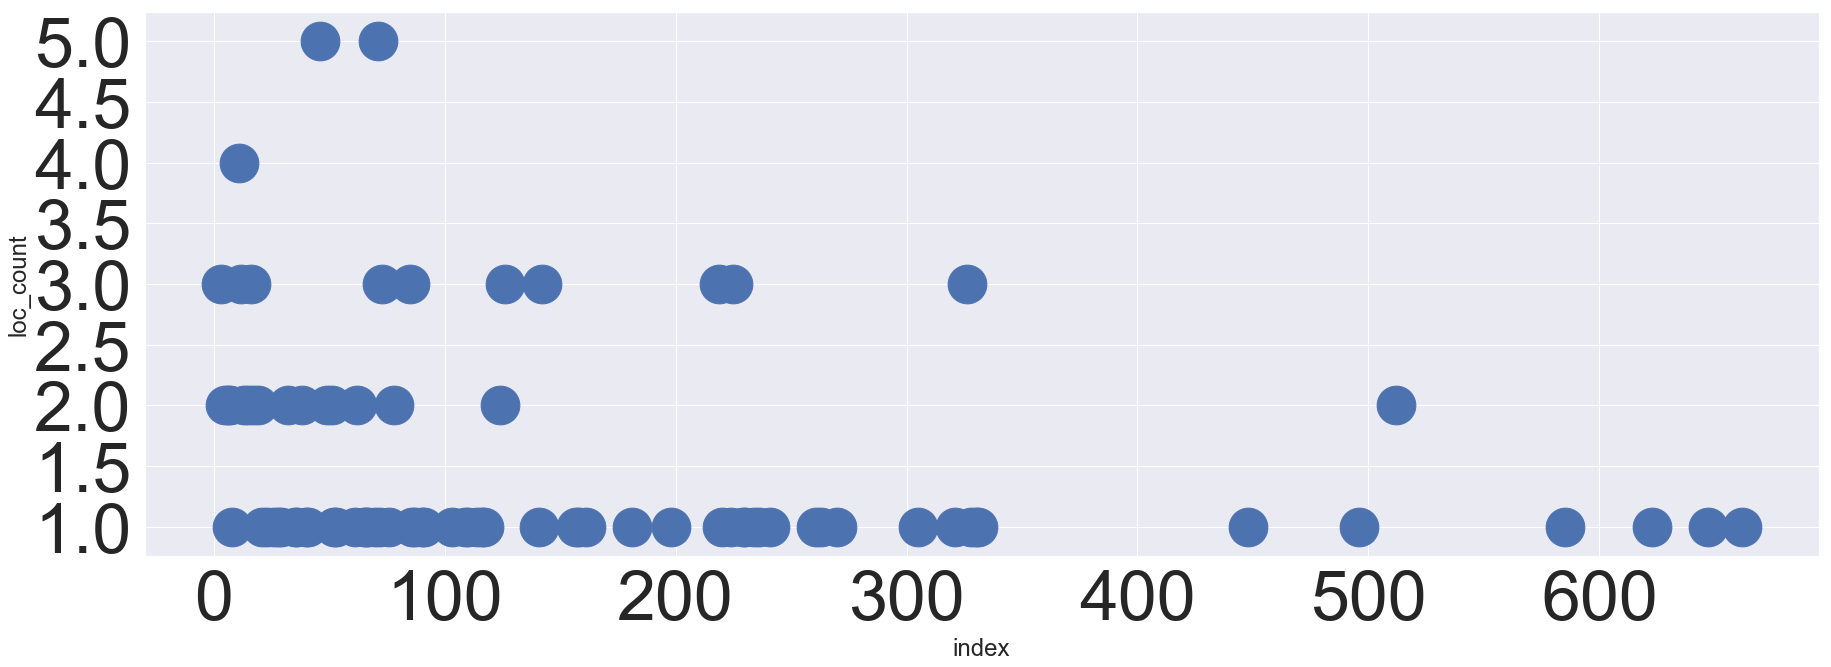

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


---- bloc_count ---


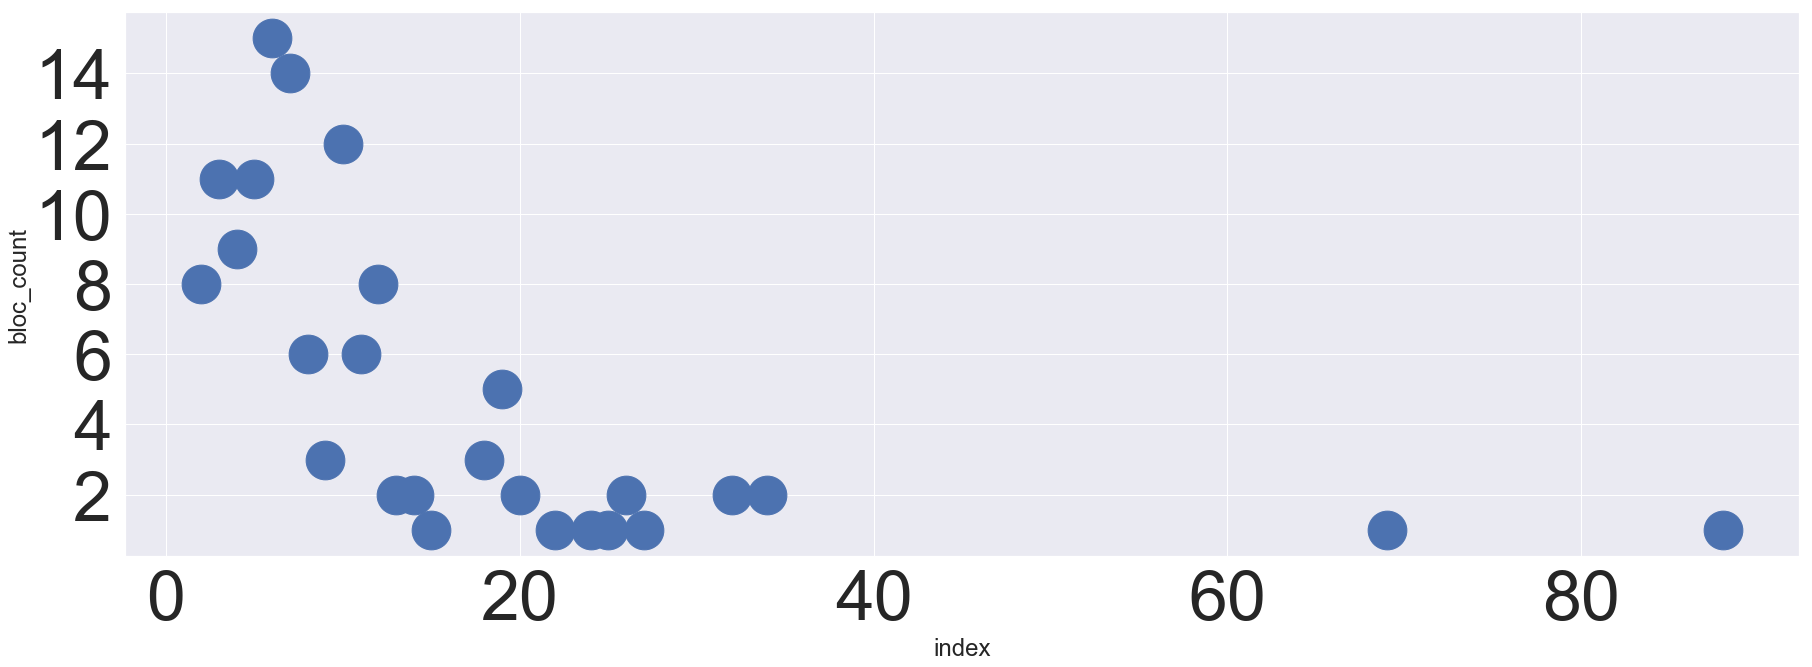

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


---- cloc_count ---


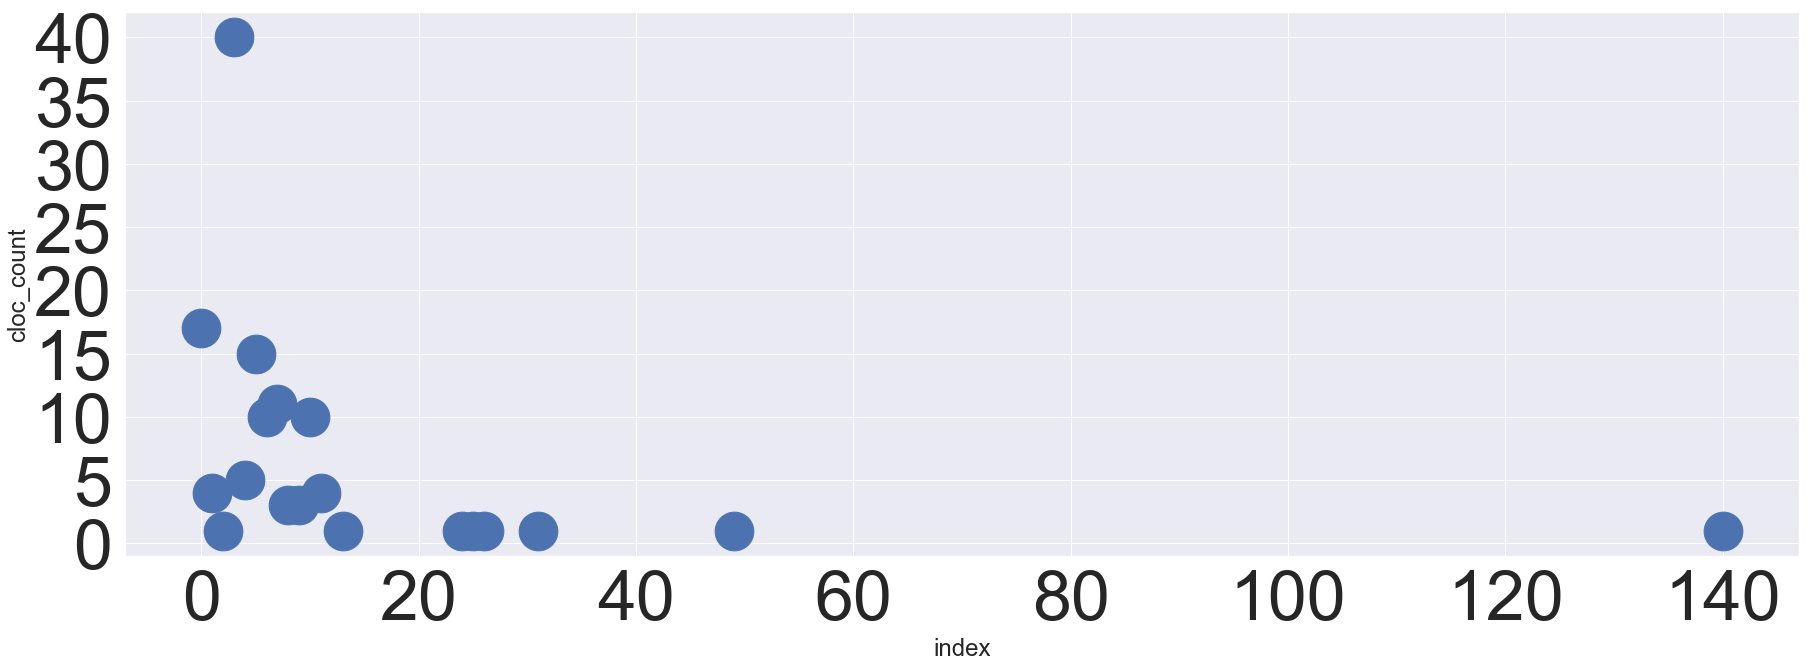

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


---- dpt_count ---


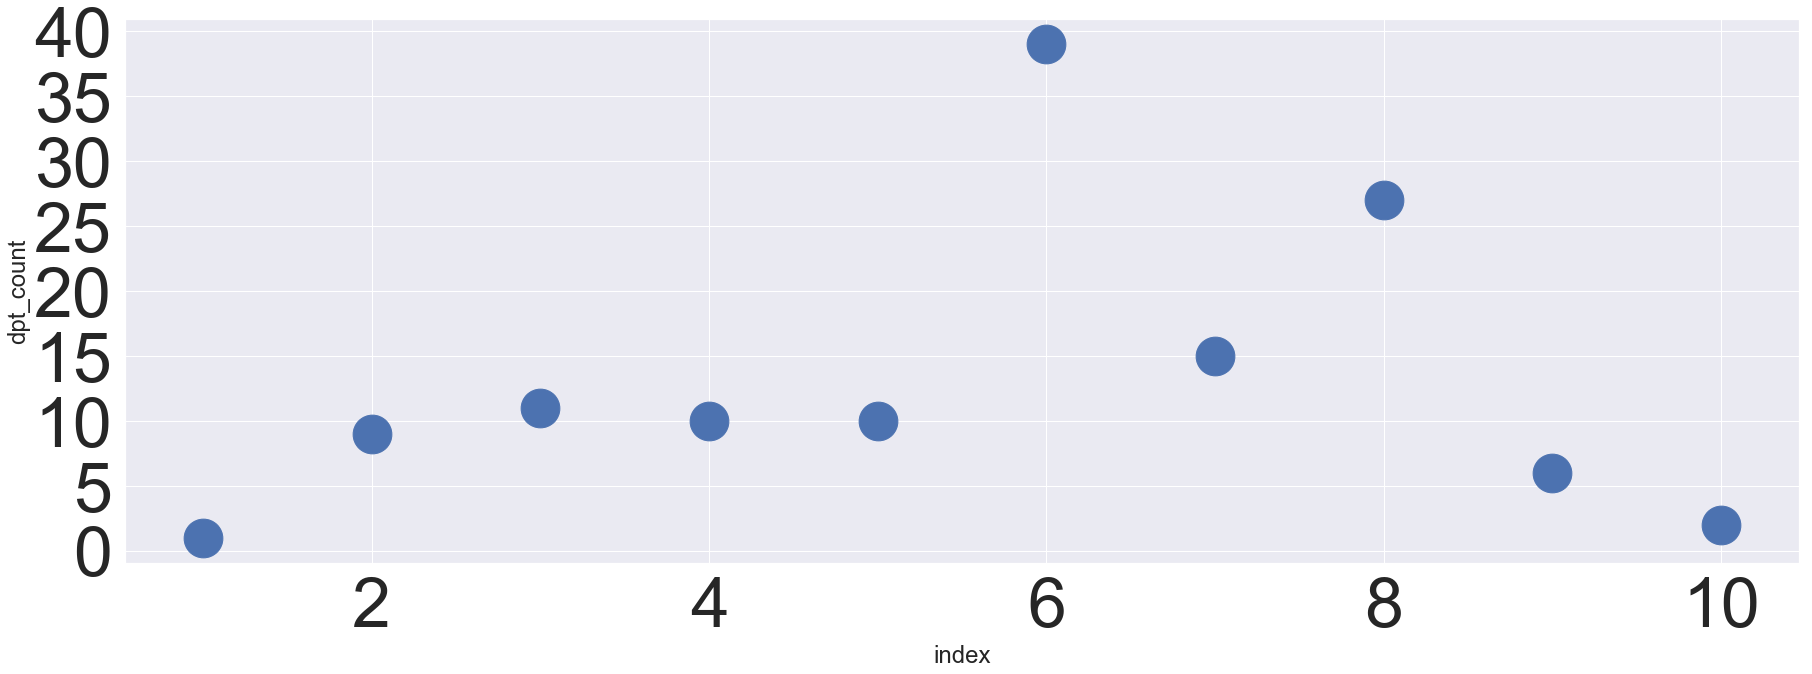

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


---- etp_count ---


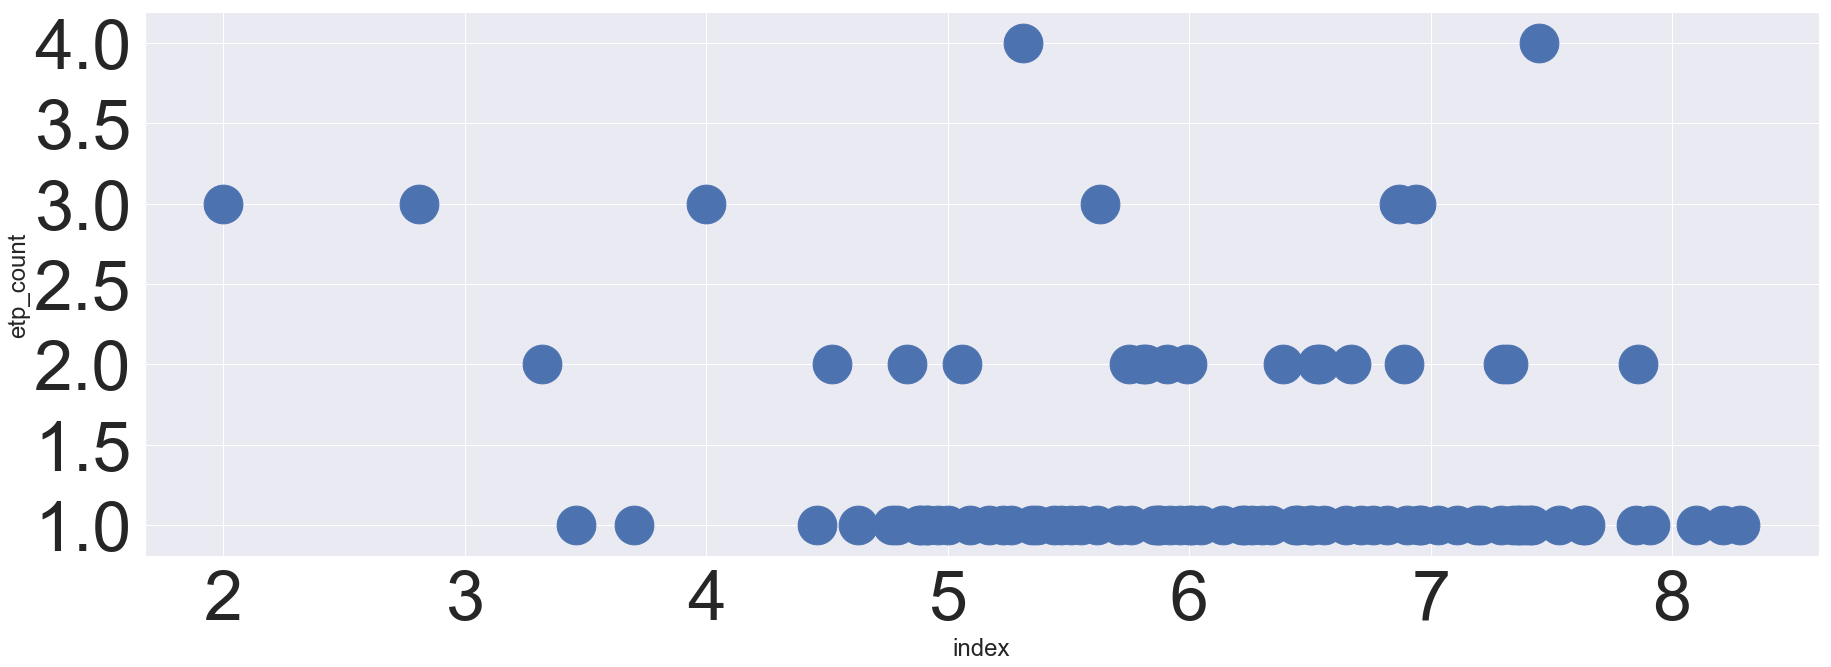

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


---- nco_count ---


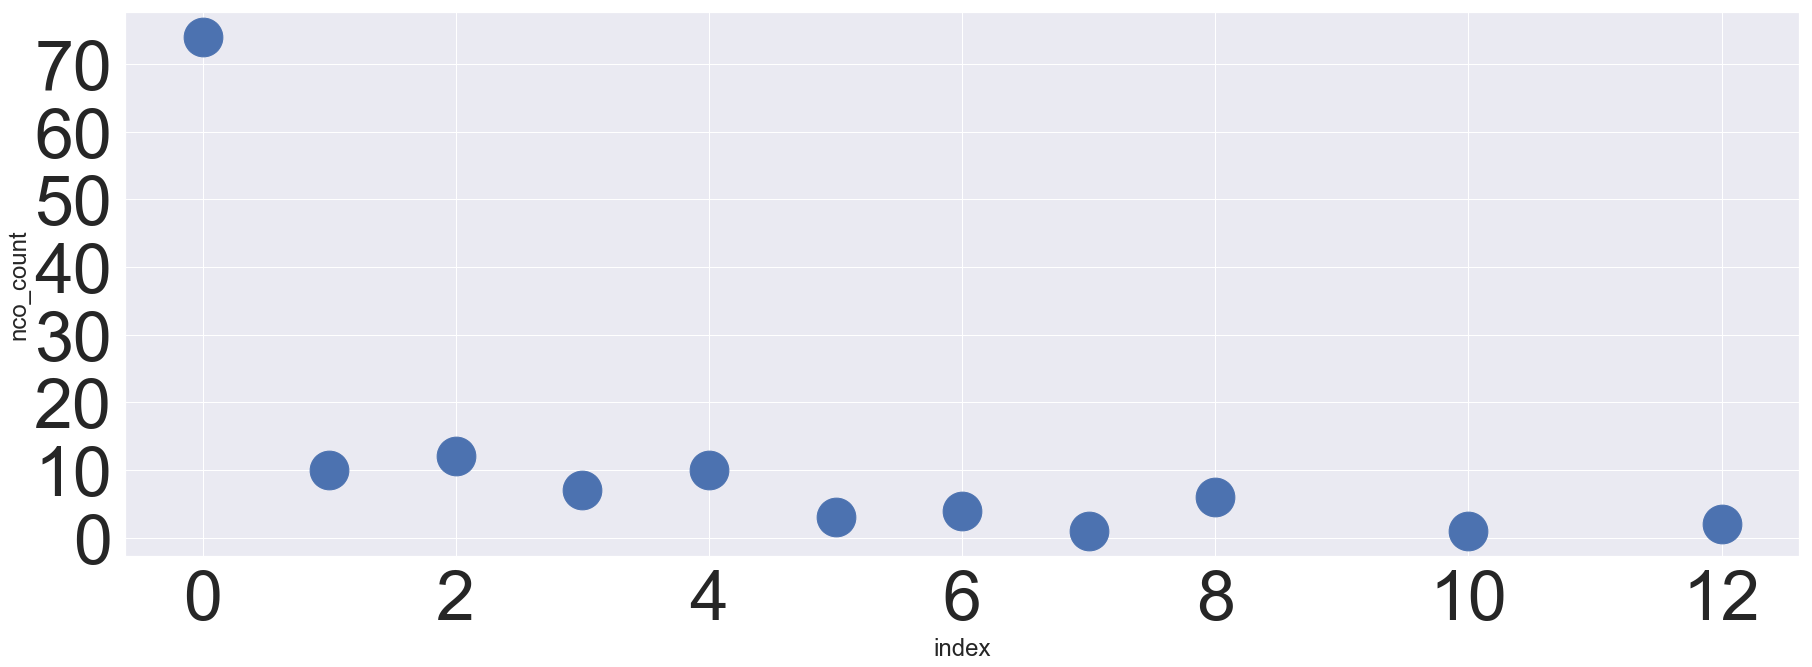

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


---- nkeys_count ---


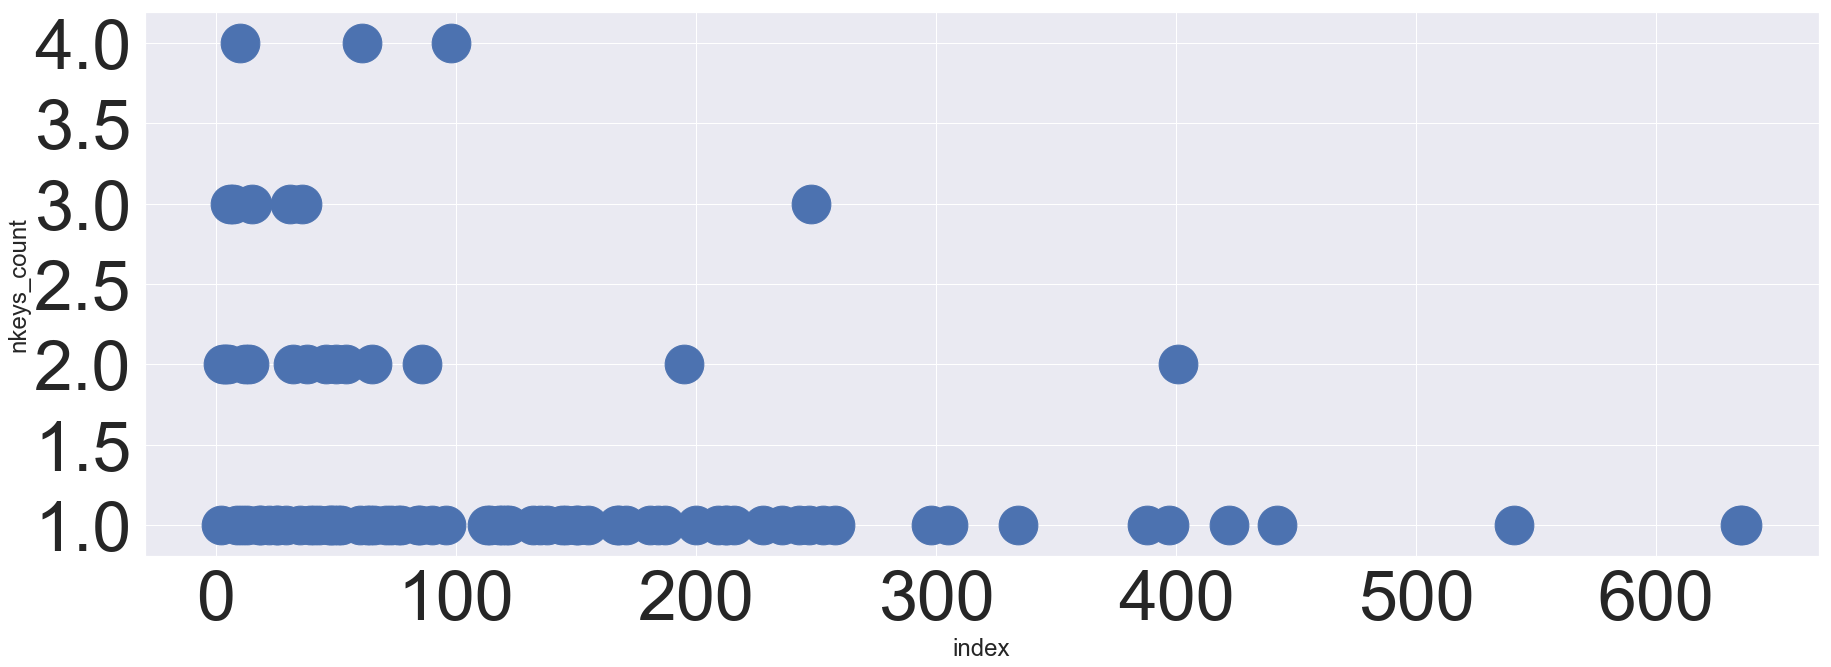

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


---- ntkn_count ---


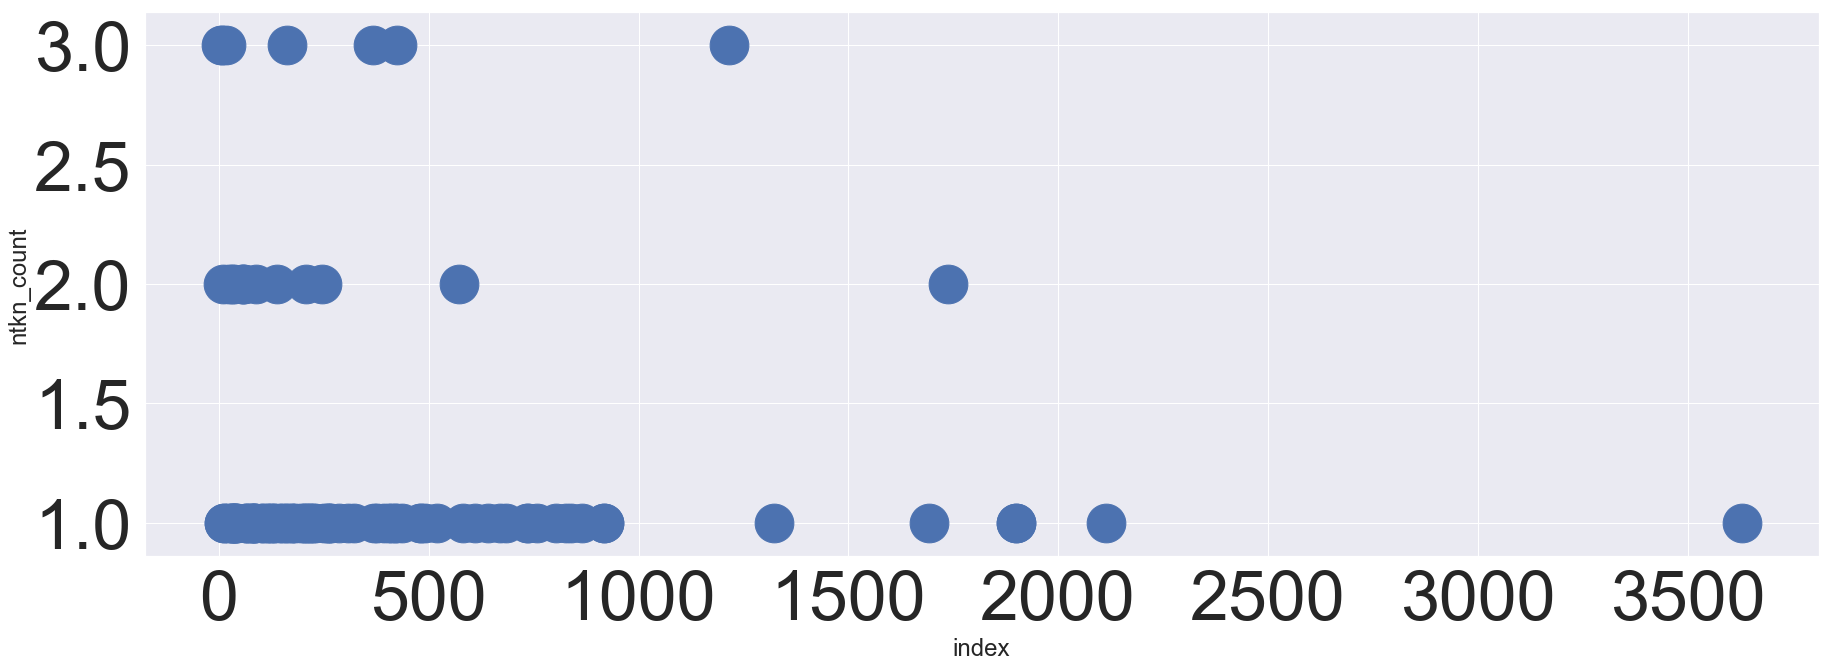

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


---- nscm_count ---


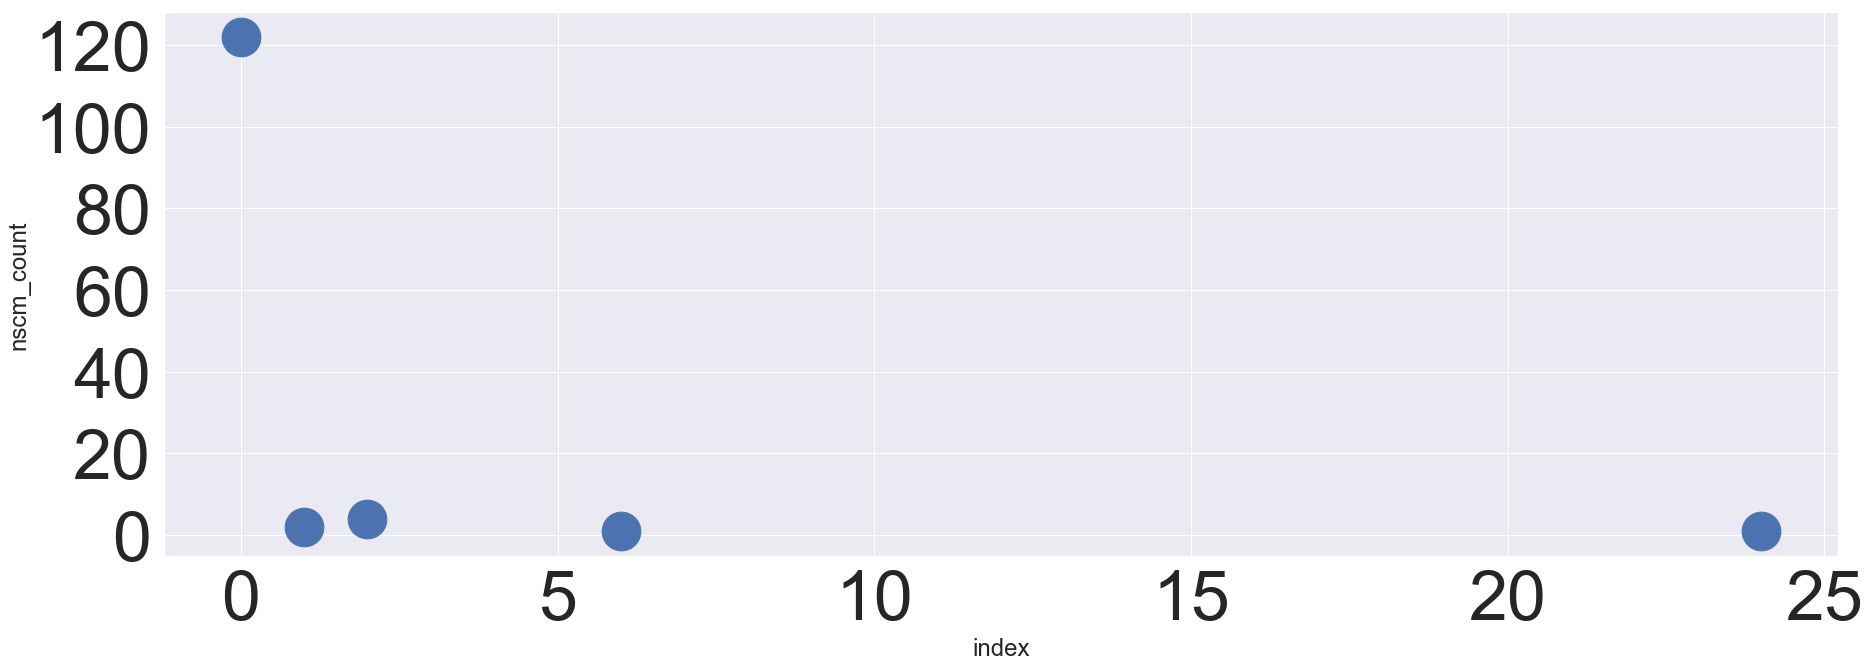

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


---- na_count ---


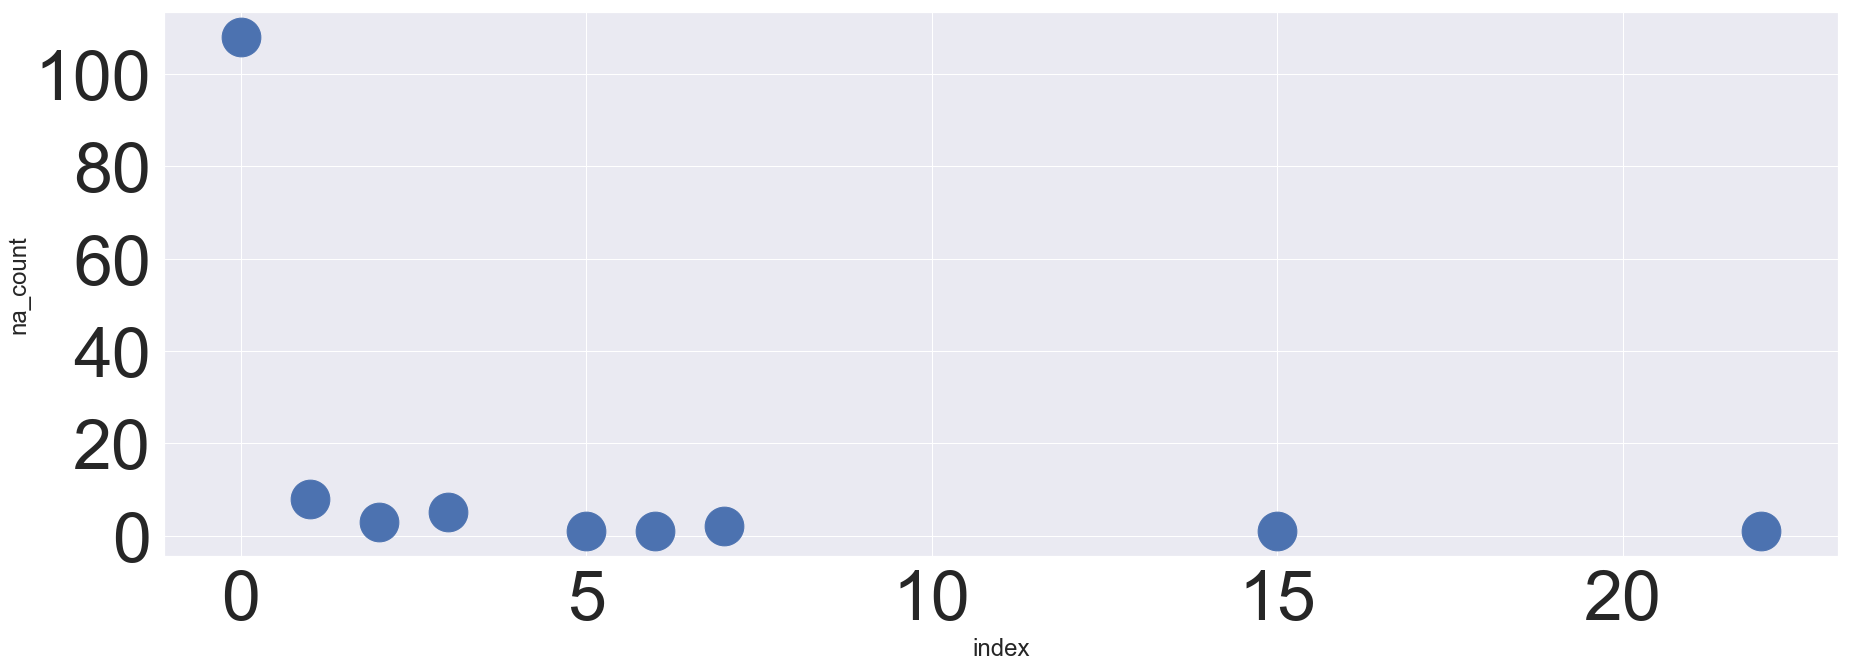

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


---- nc_count ---


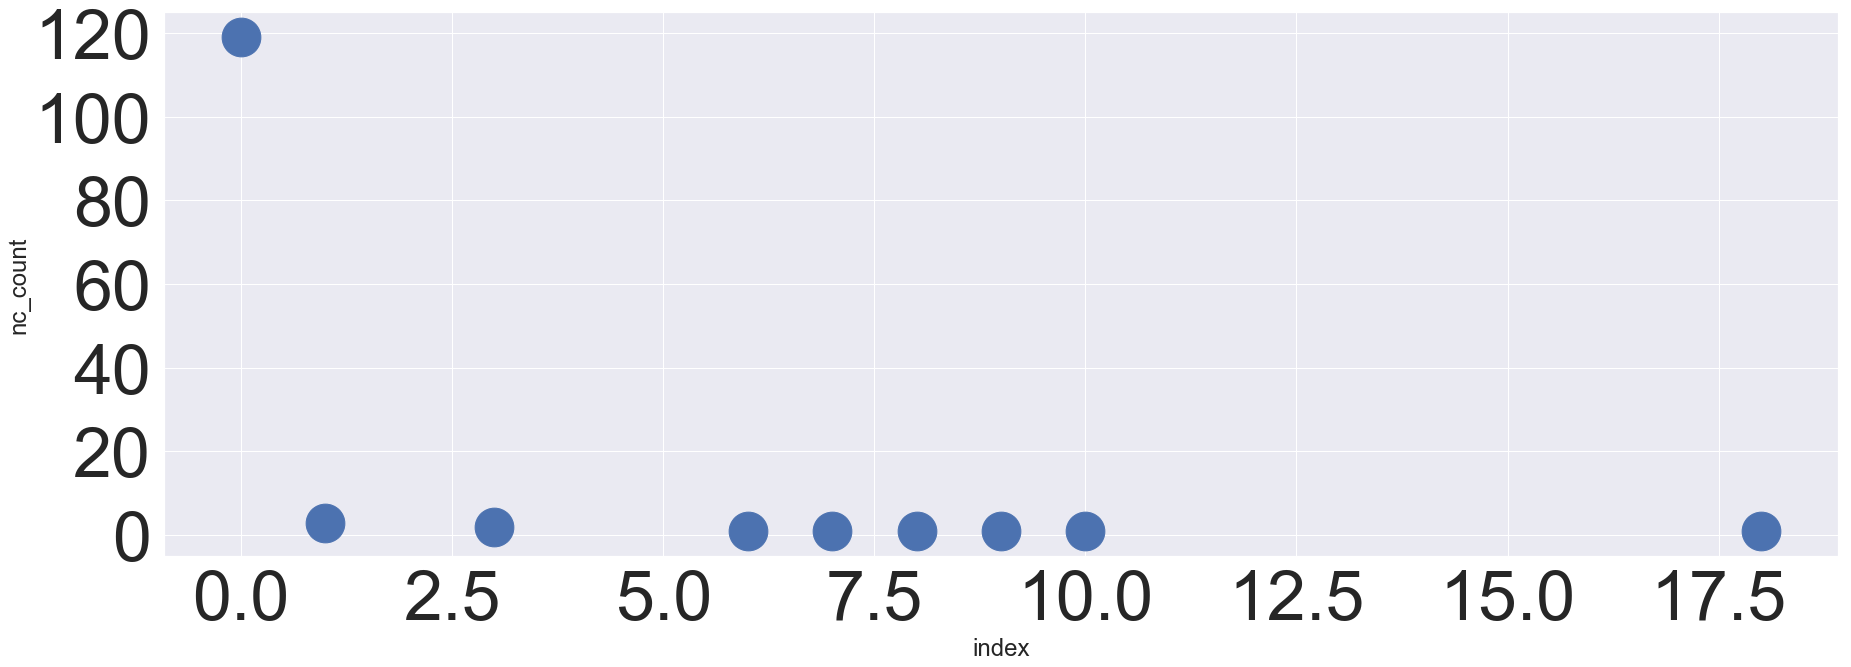

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


---- nc_min ---


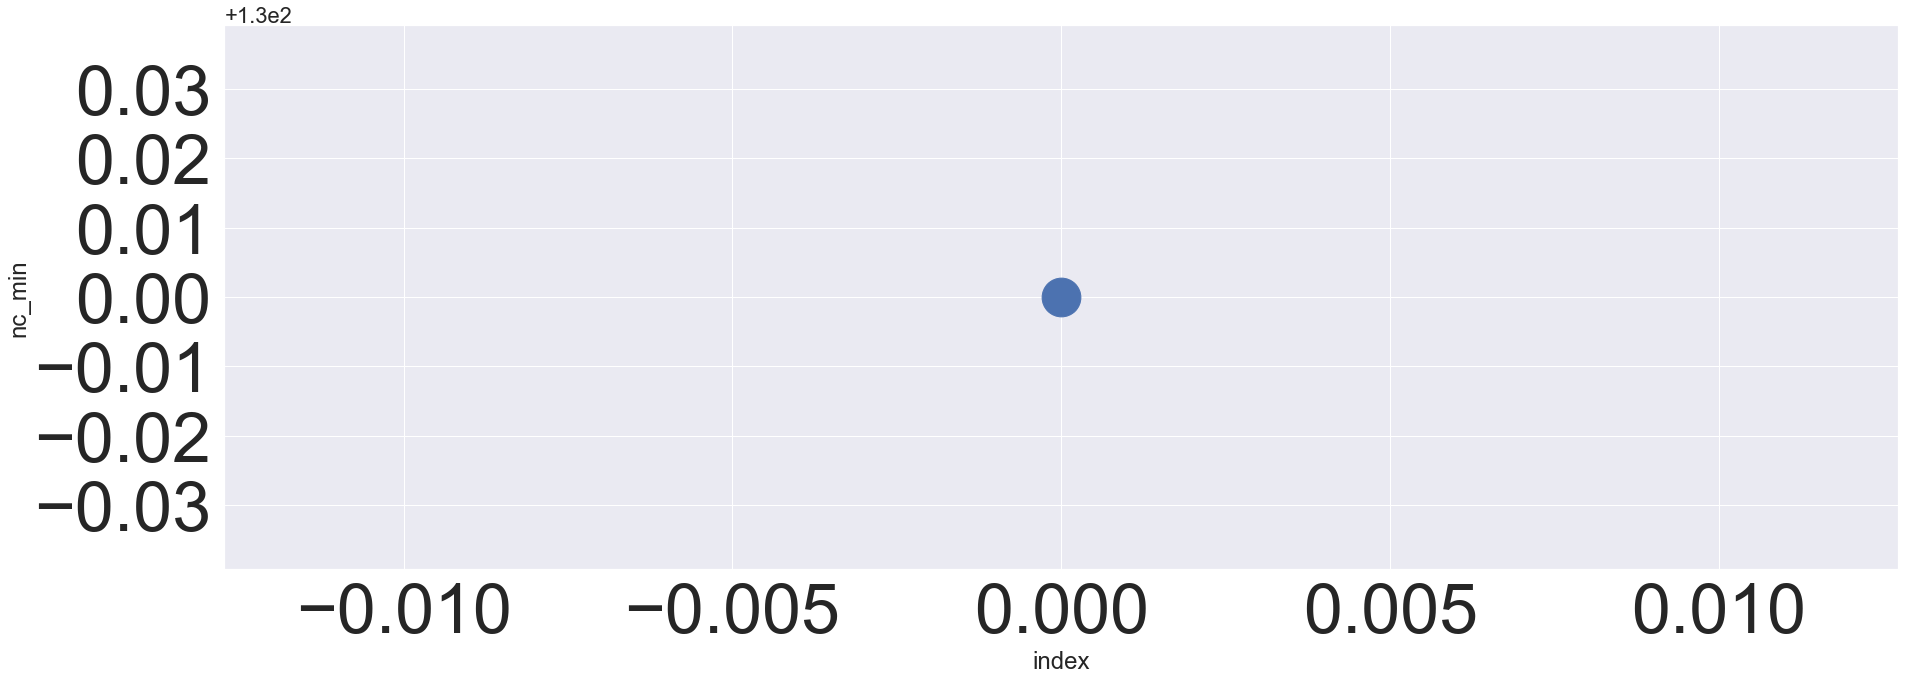

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


---- nc_max ---


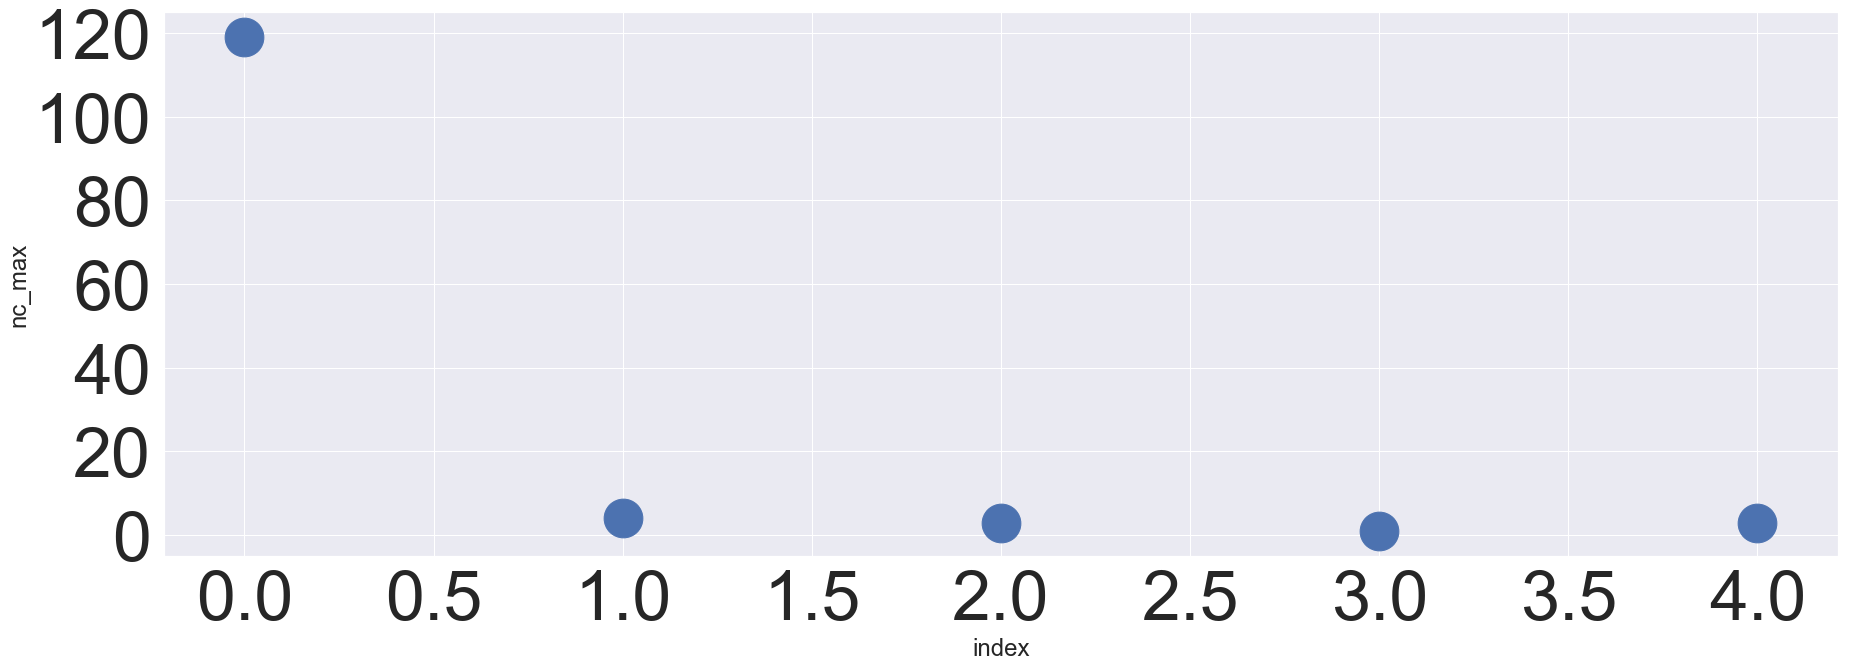

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


---- nc_median ---


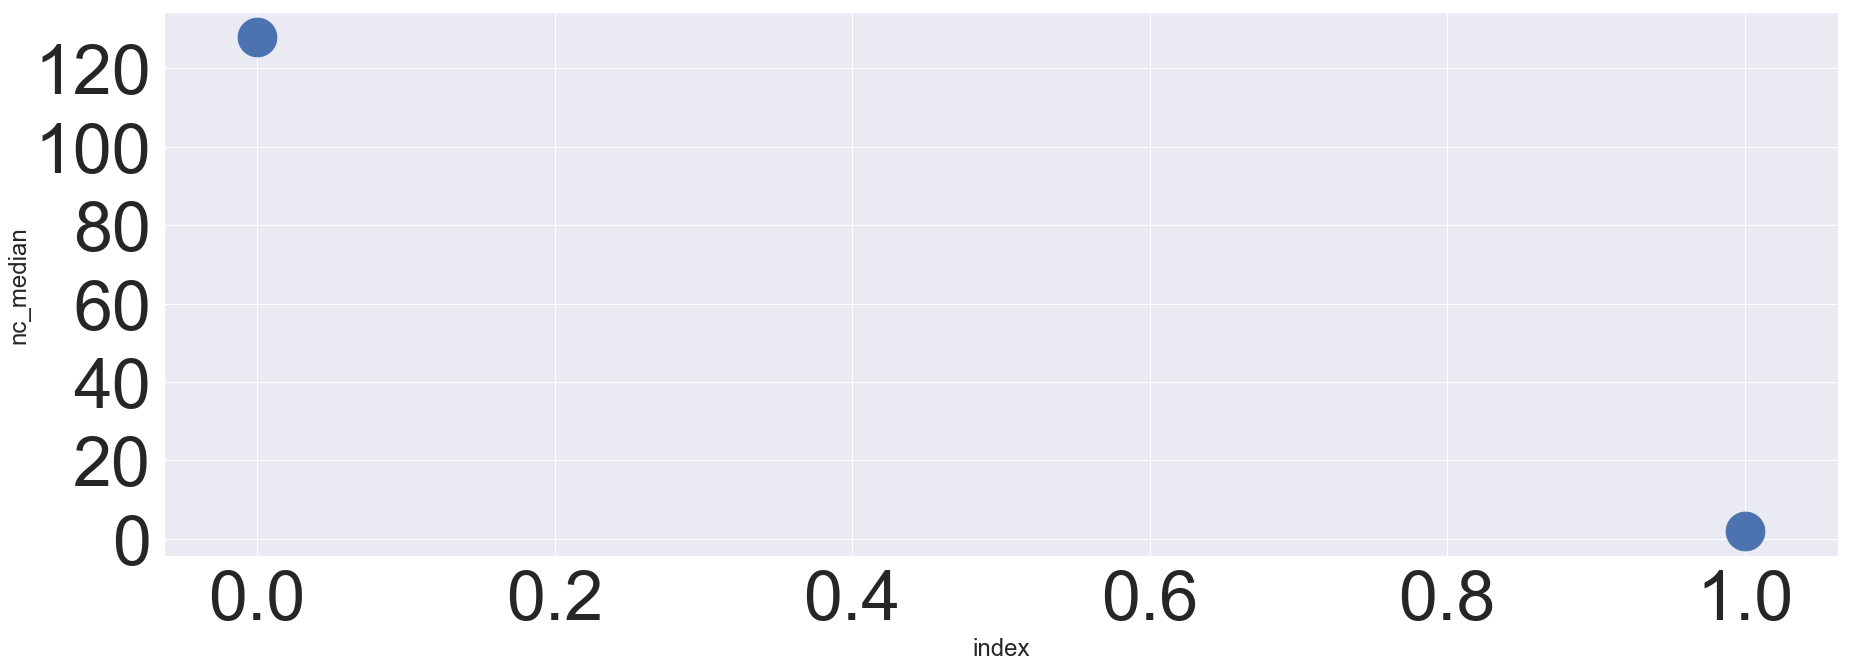

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


---- nc_mean ---


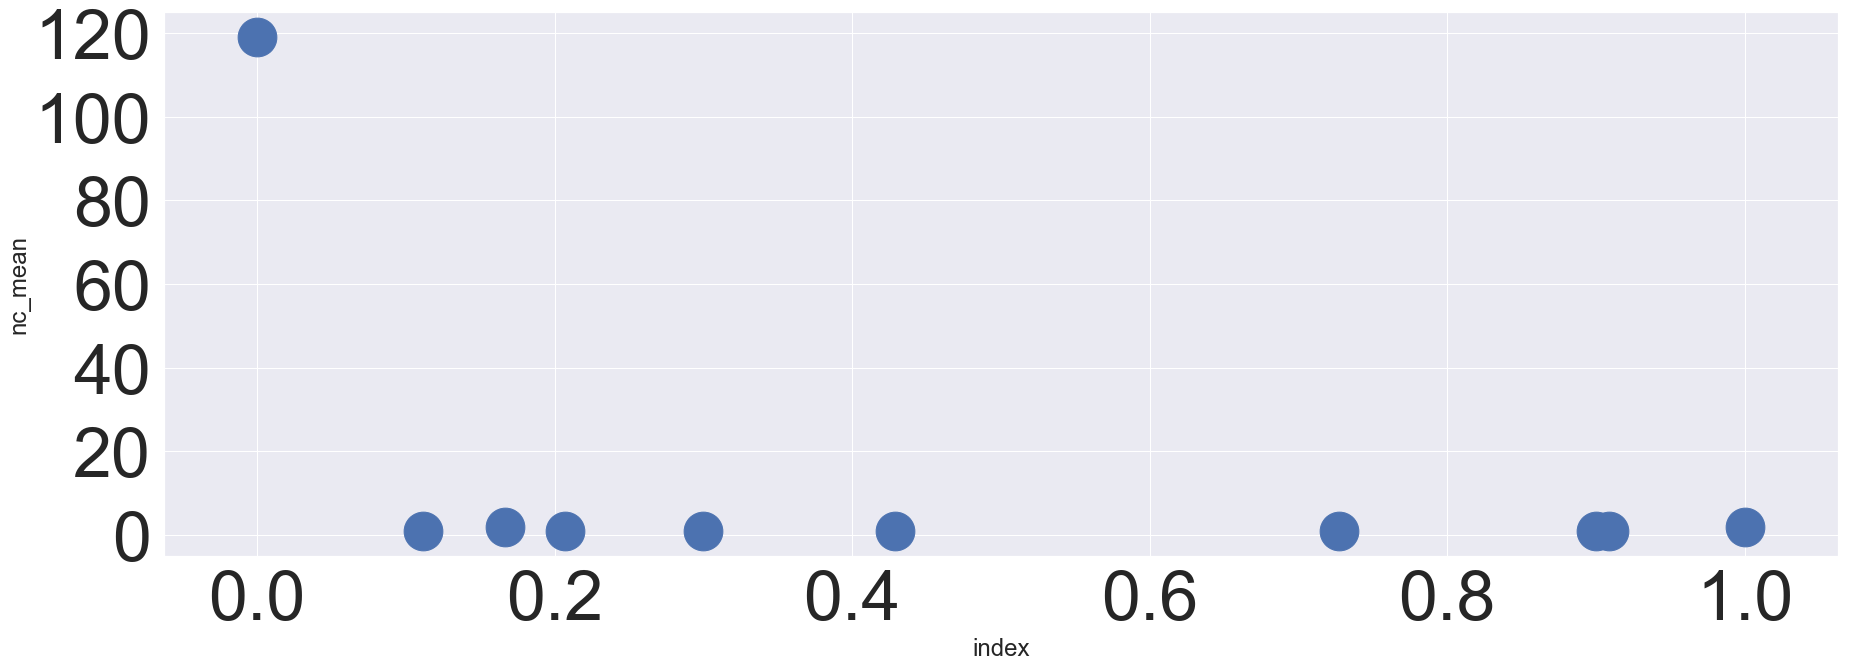

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


---- ni_count ---


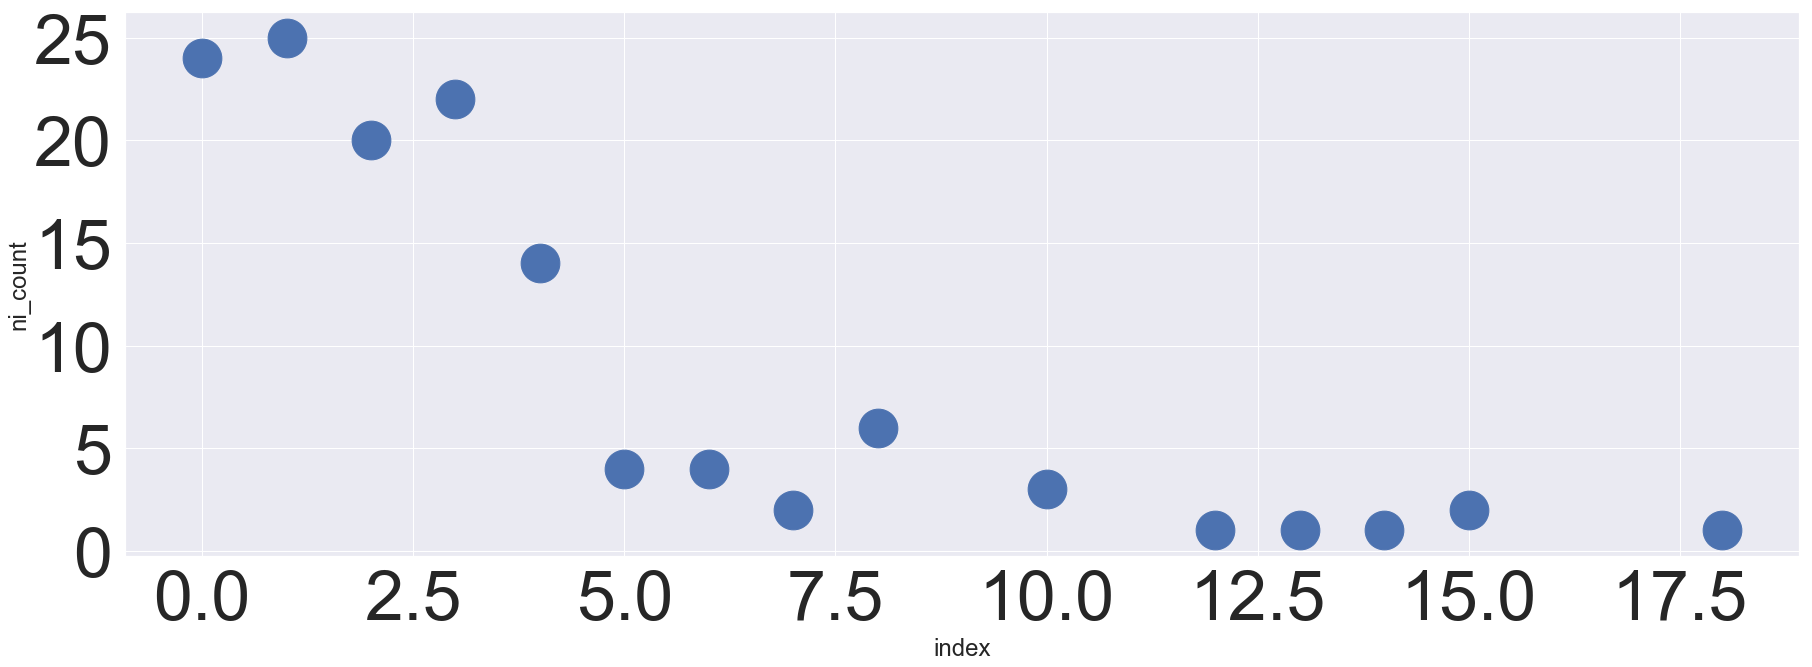

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


---- nif_count ---


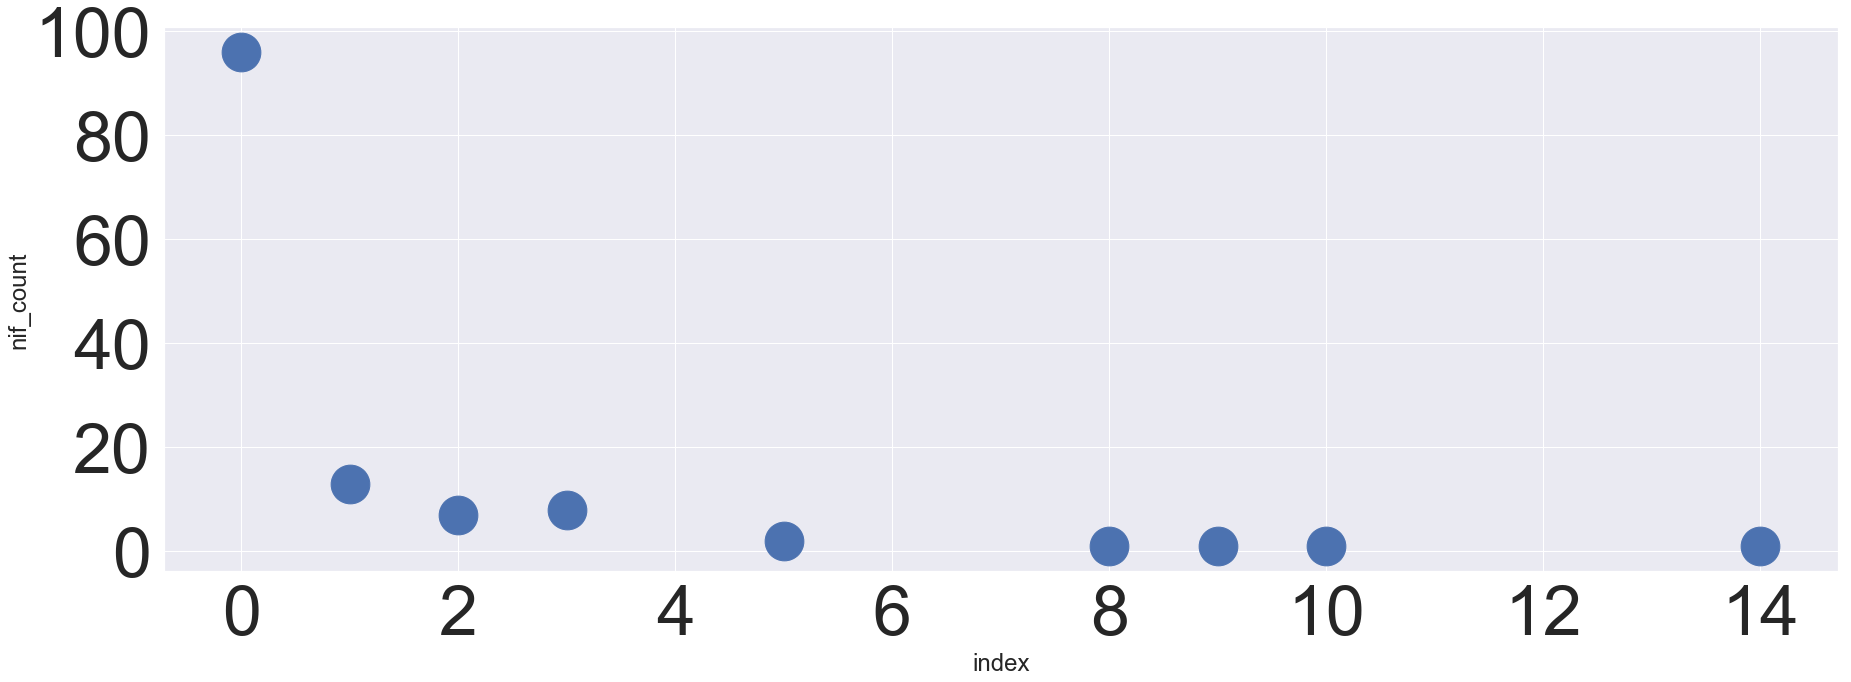

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


---- ninp_count ---


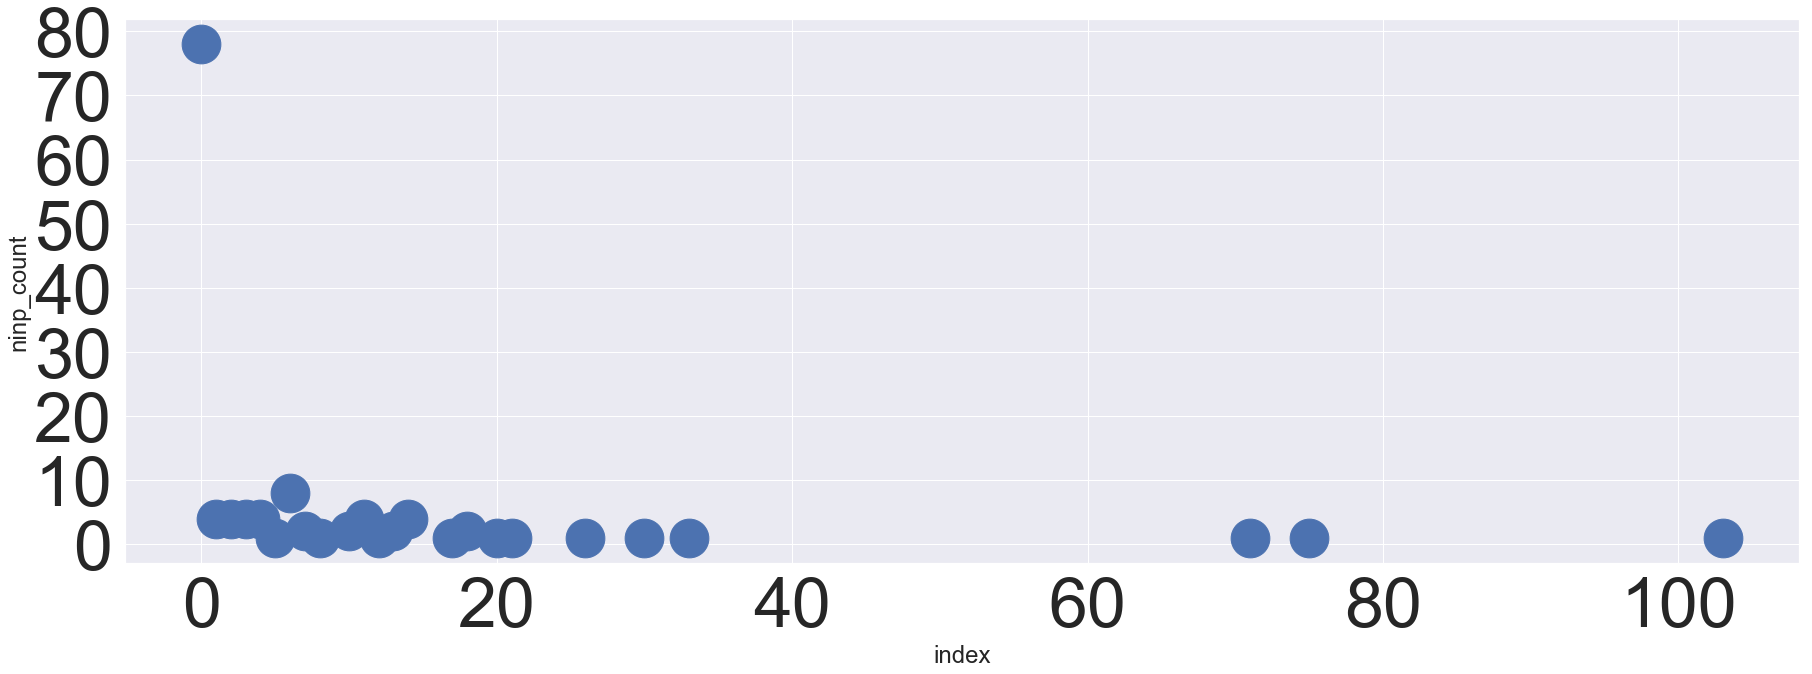

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


---- ninpc_count ---


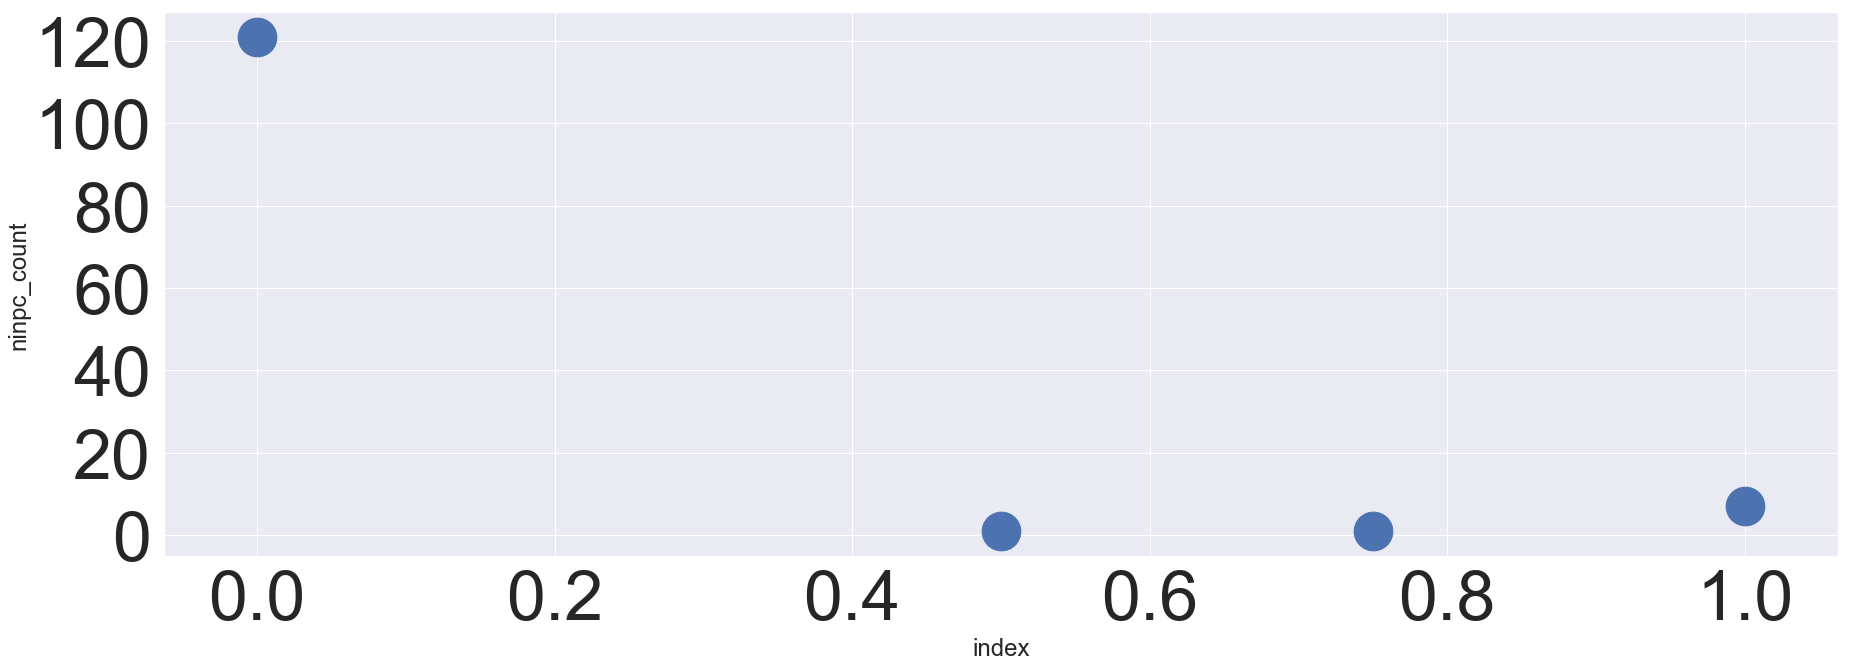

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


---- nn_count ---


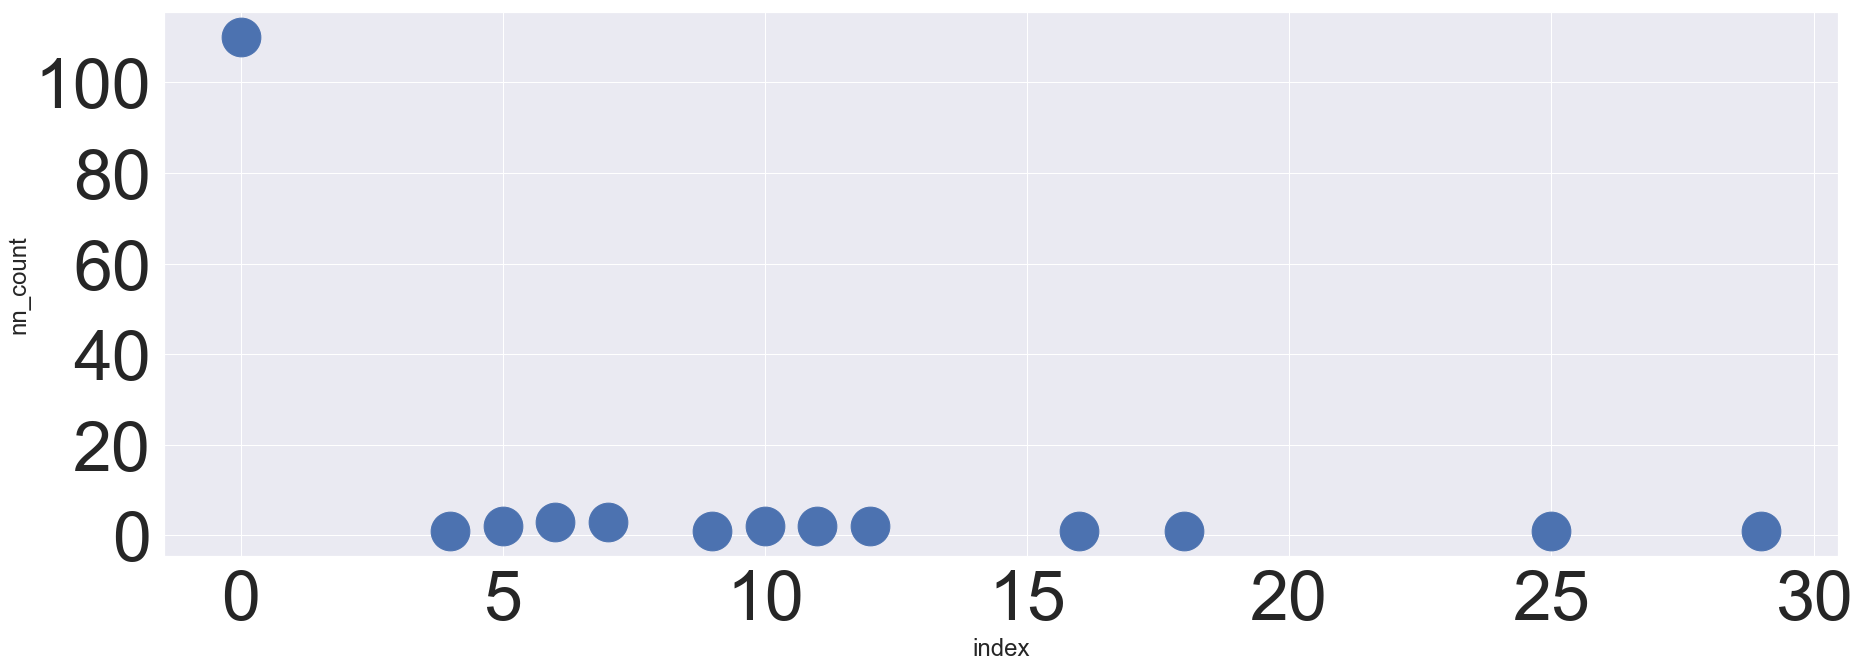

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


---- nnt_count ---


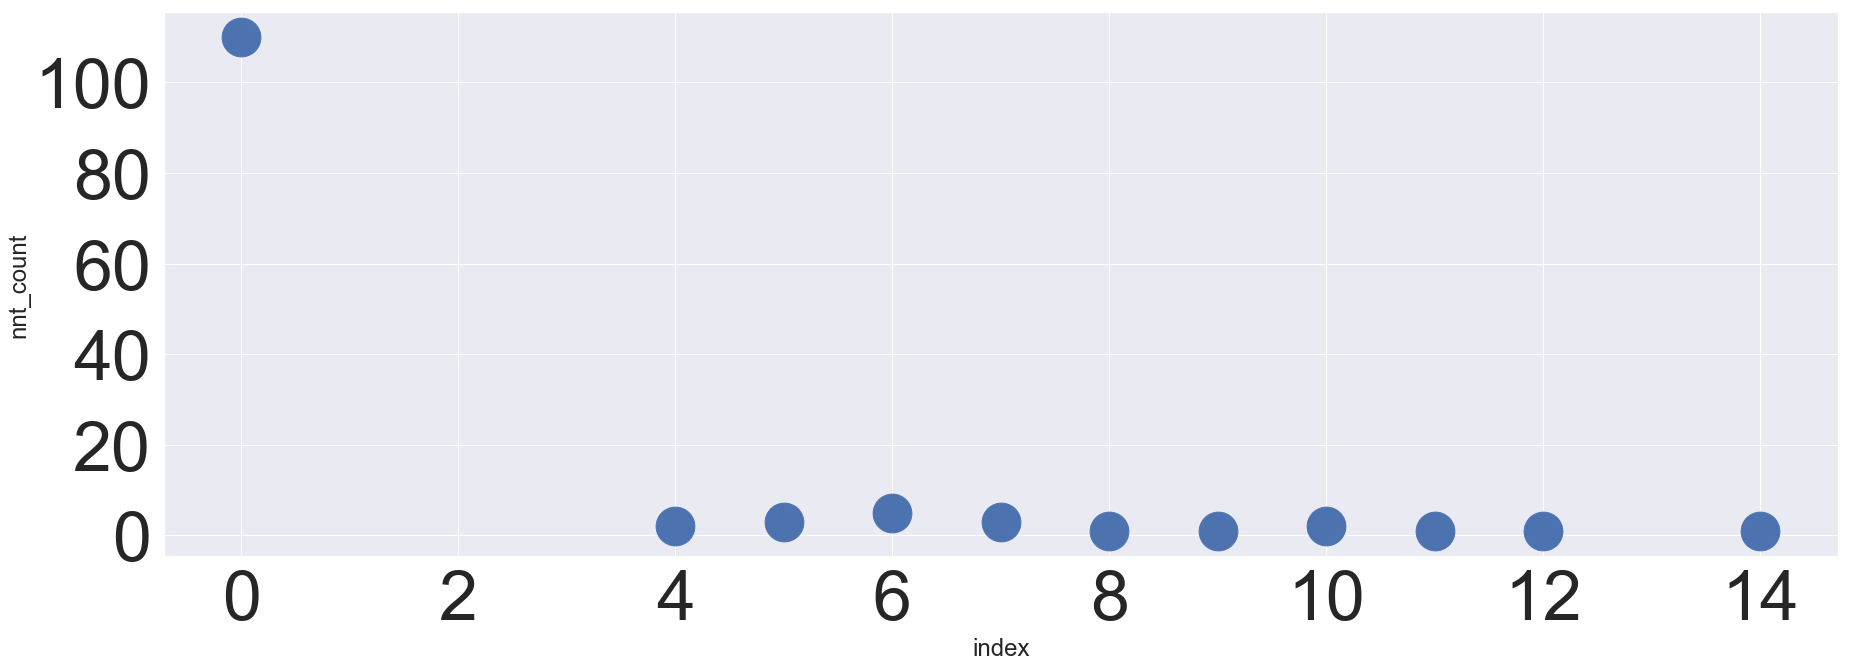

---- nout_count ---


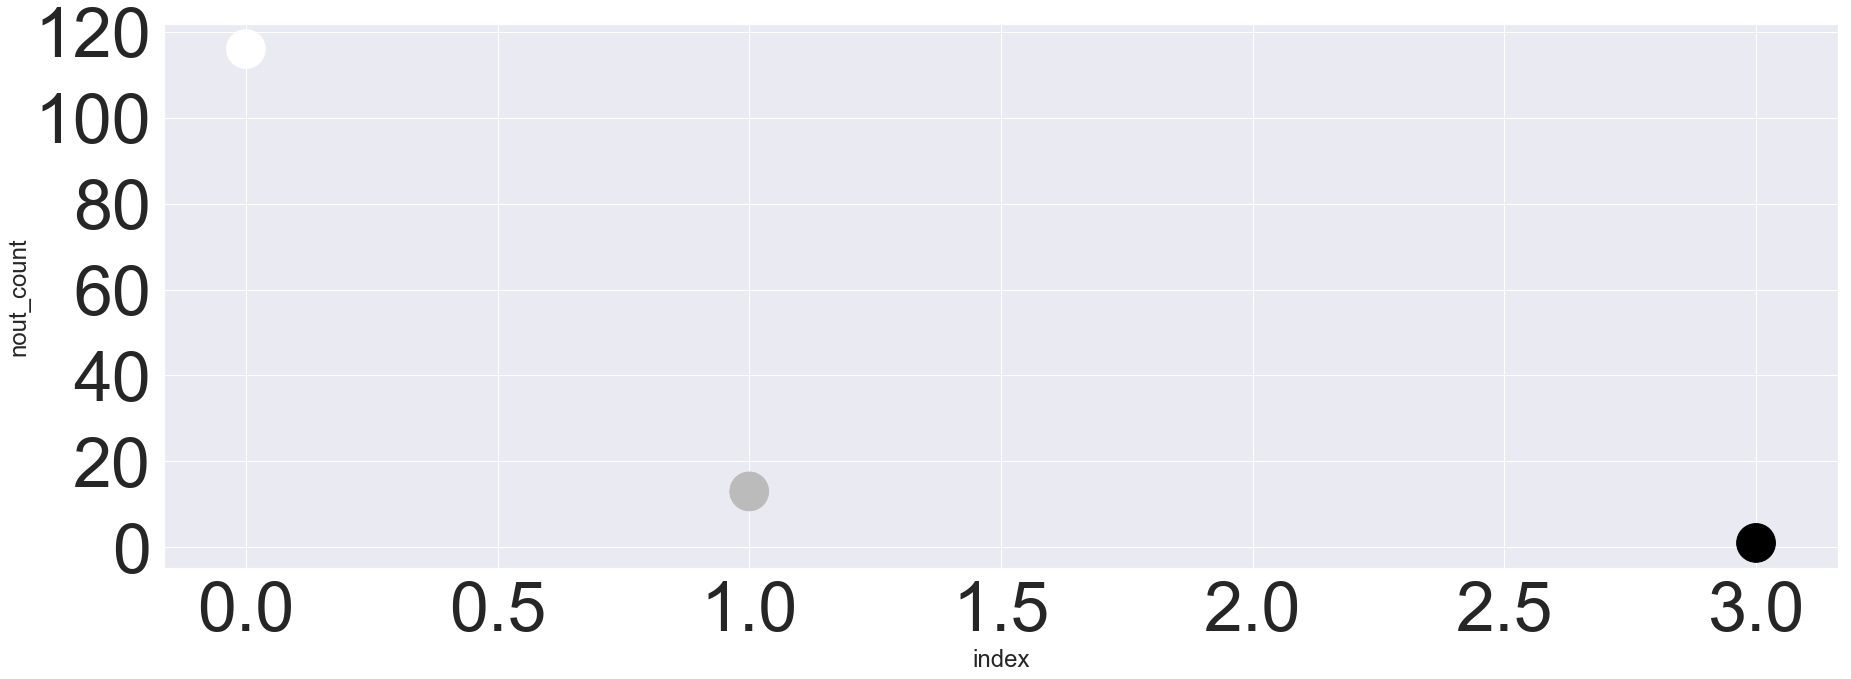

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


---- np_count ---


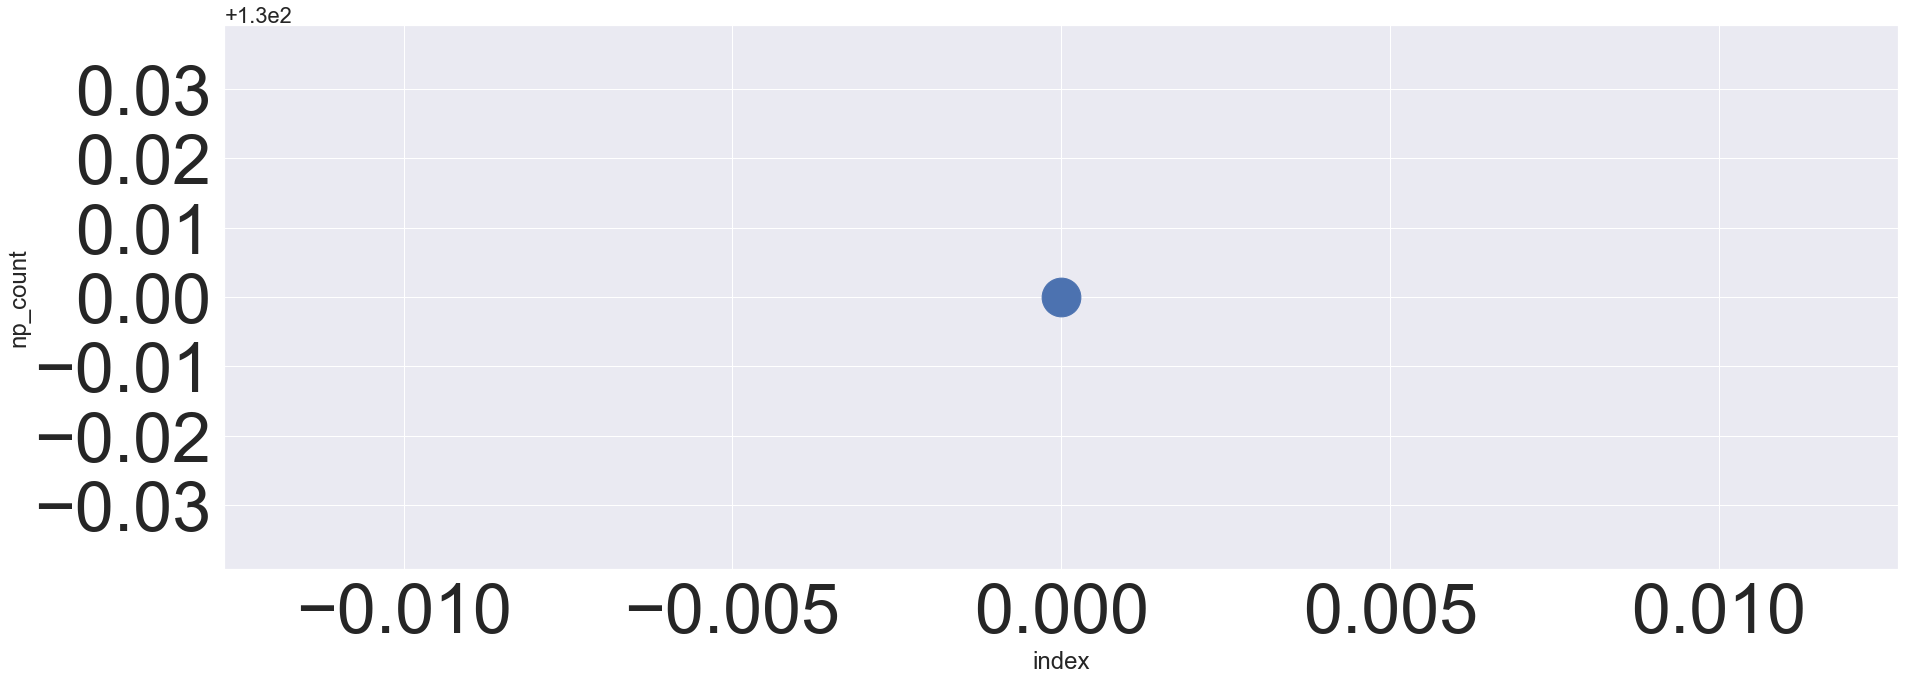

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


---- np_min ---


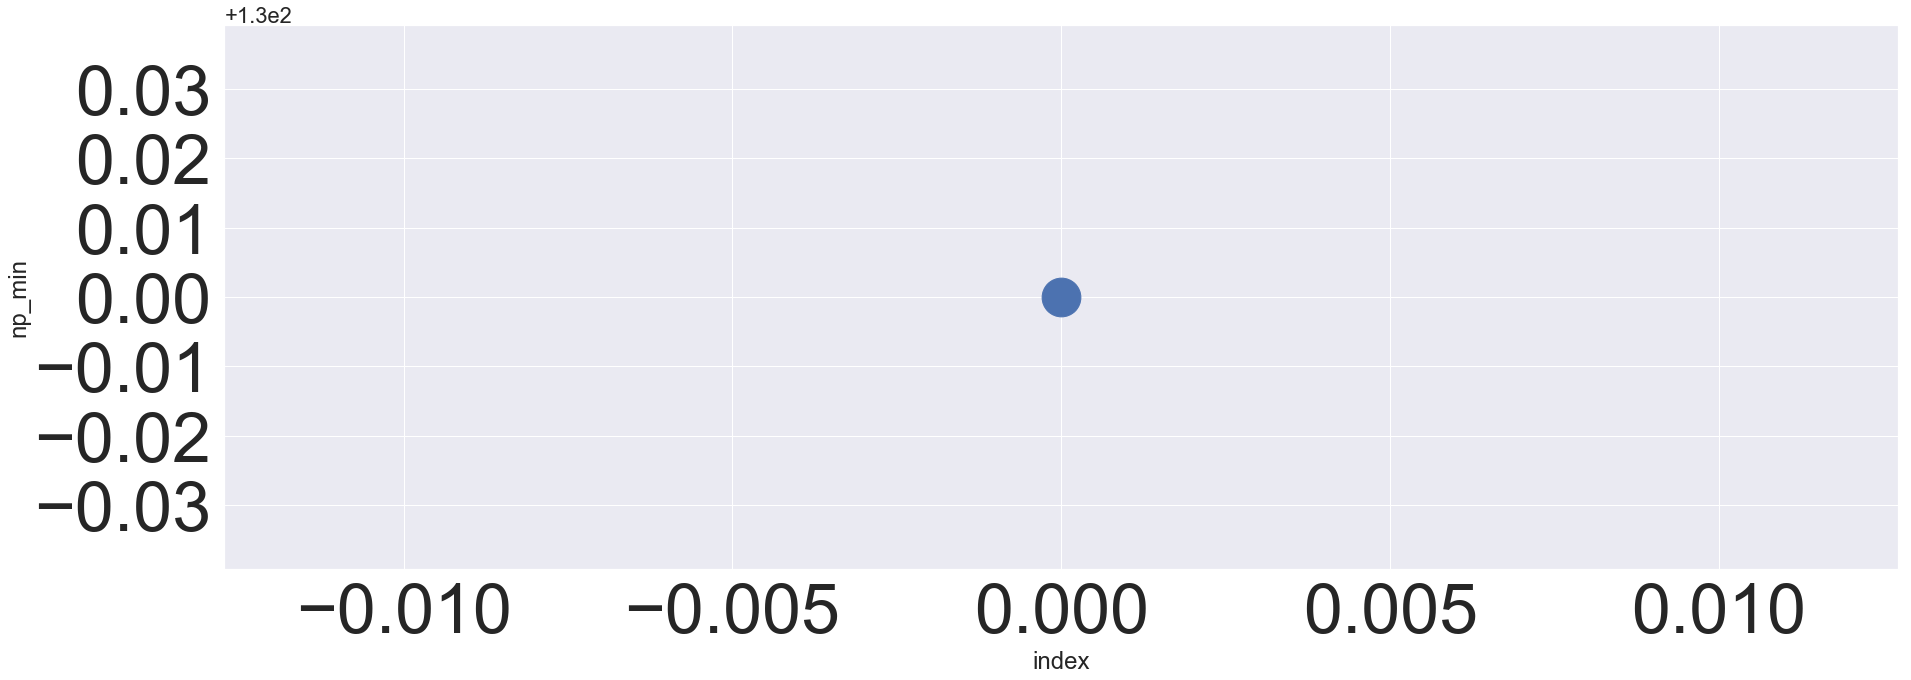

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


---- np_max ---


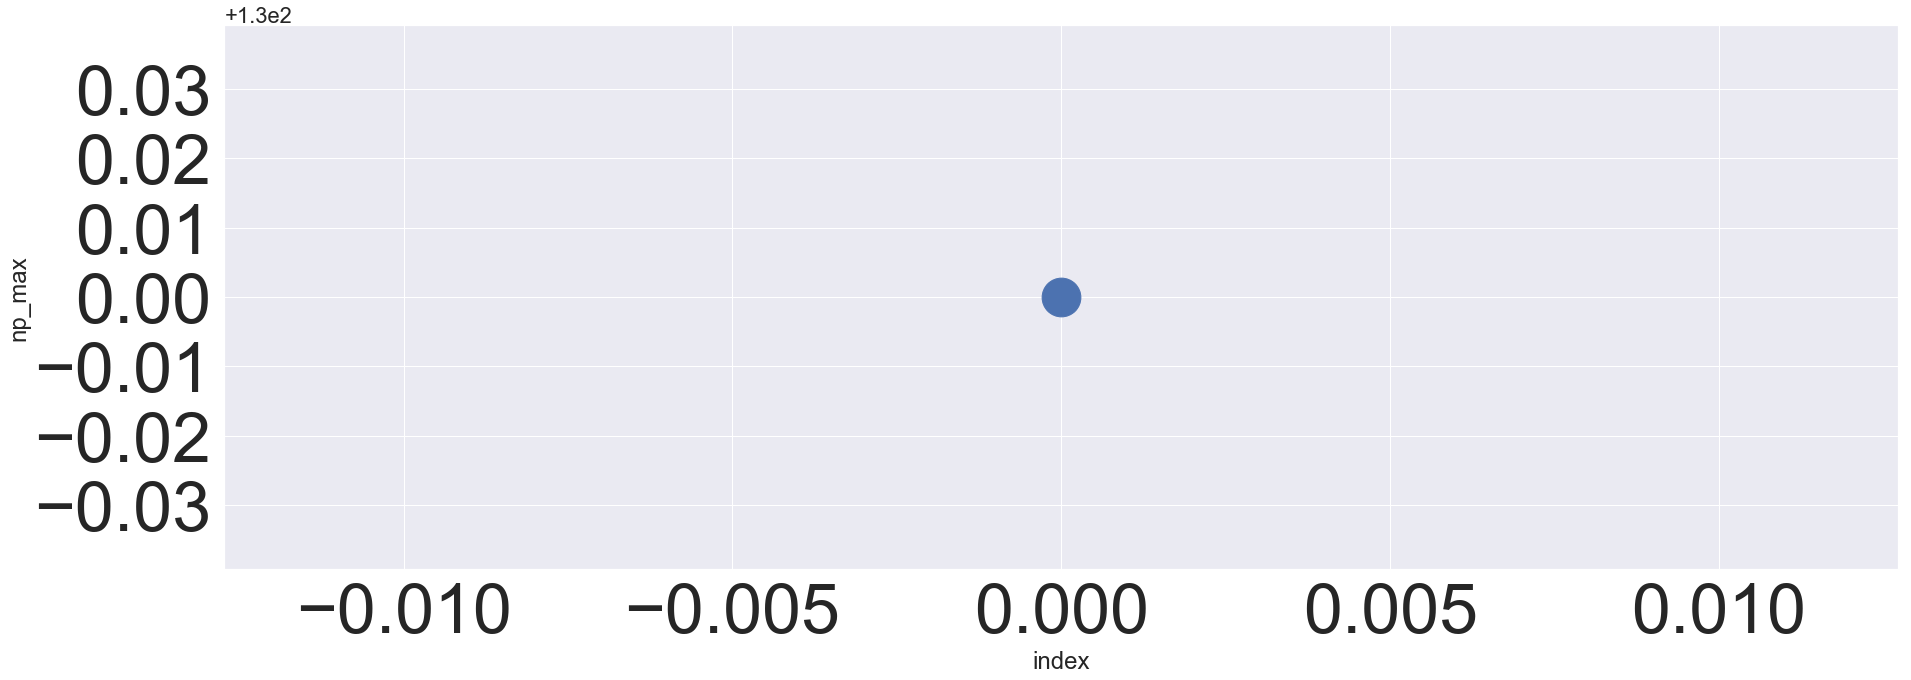

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


---- np_median ---


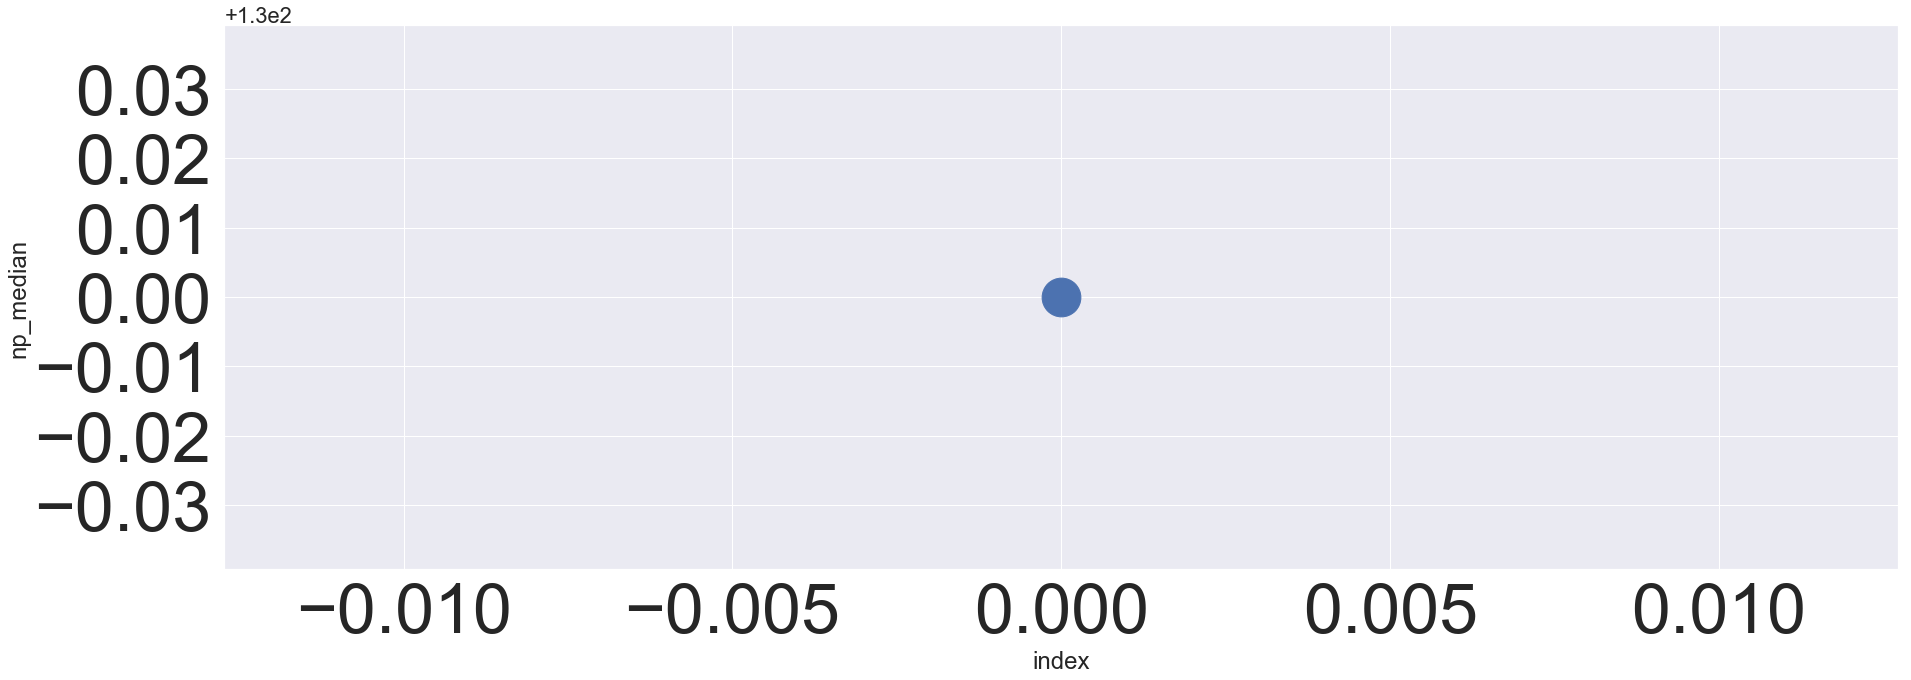

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


---- np_mean ---


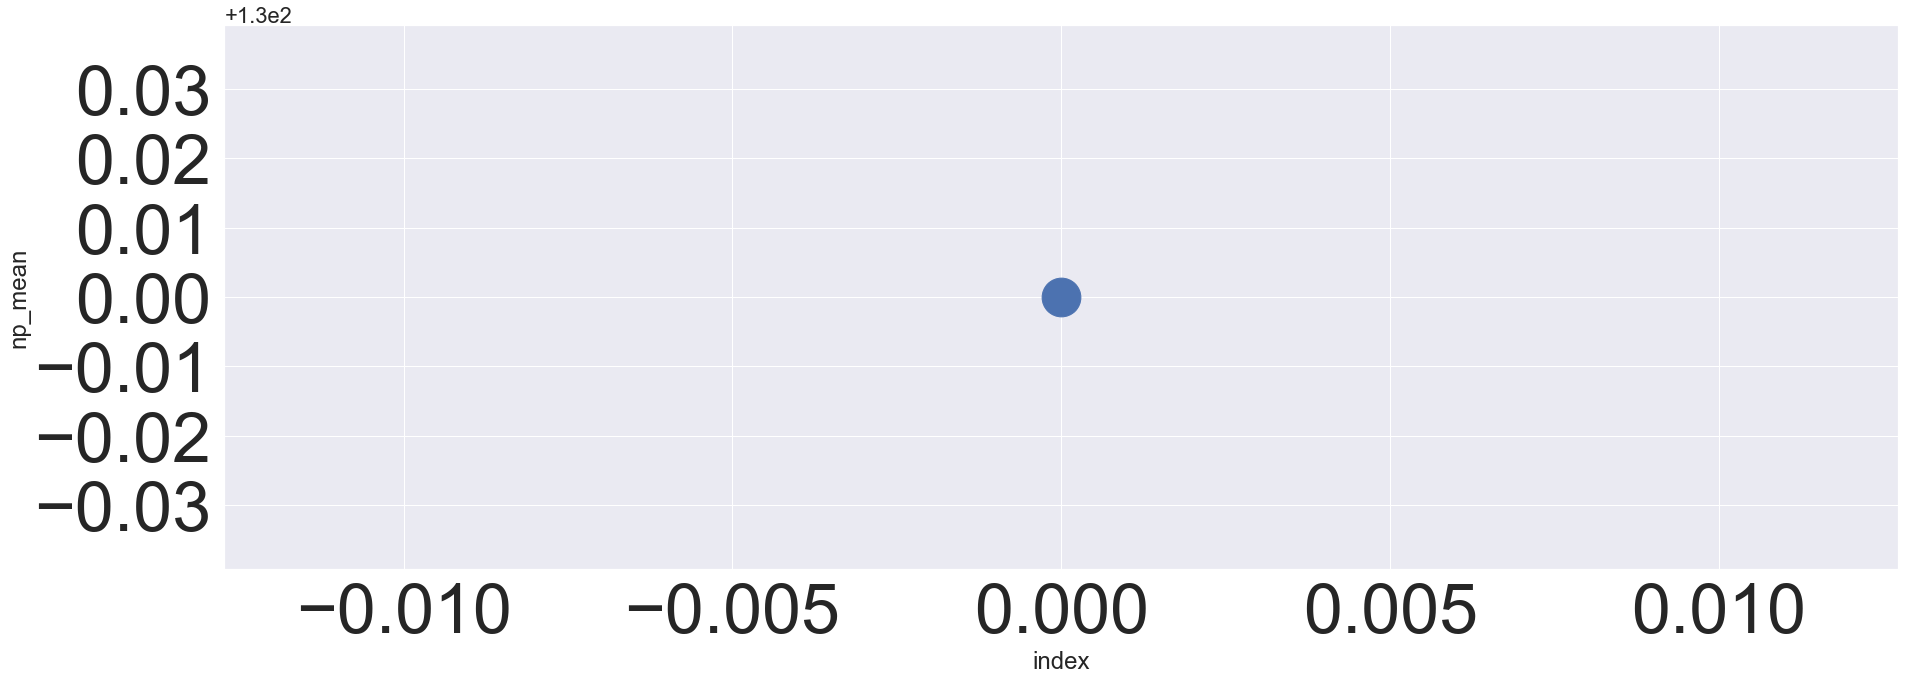

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


---- nr_count ---


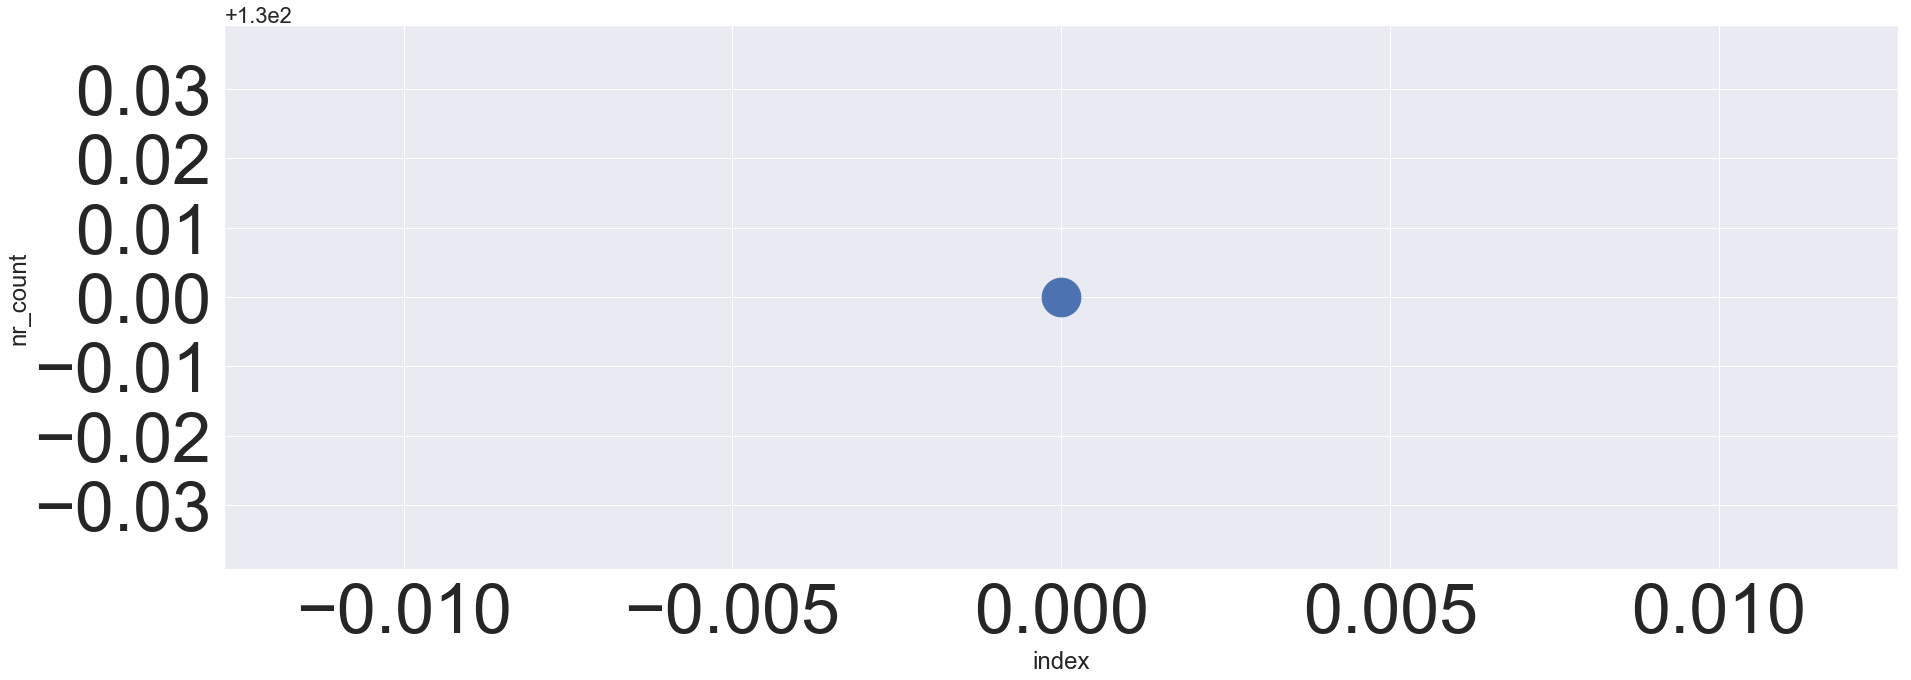

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


---- nrt_count ---


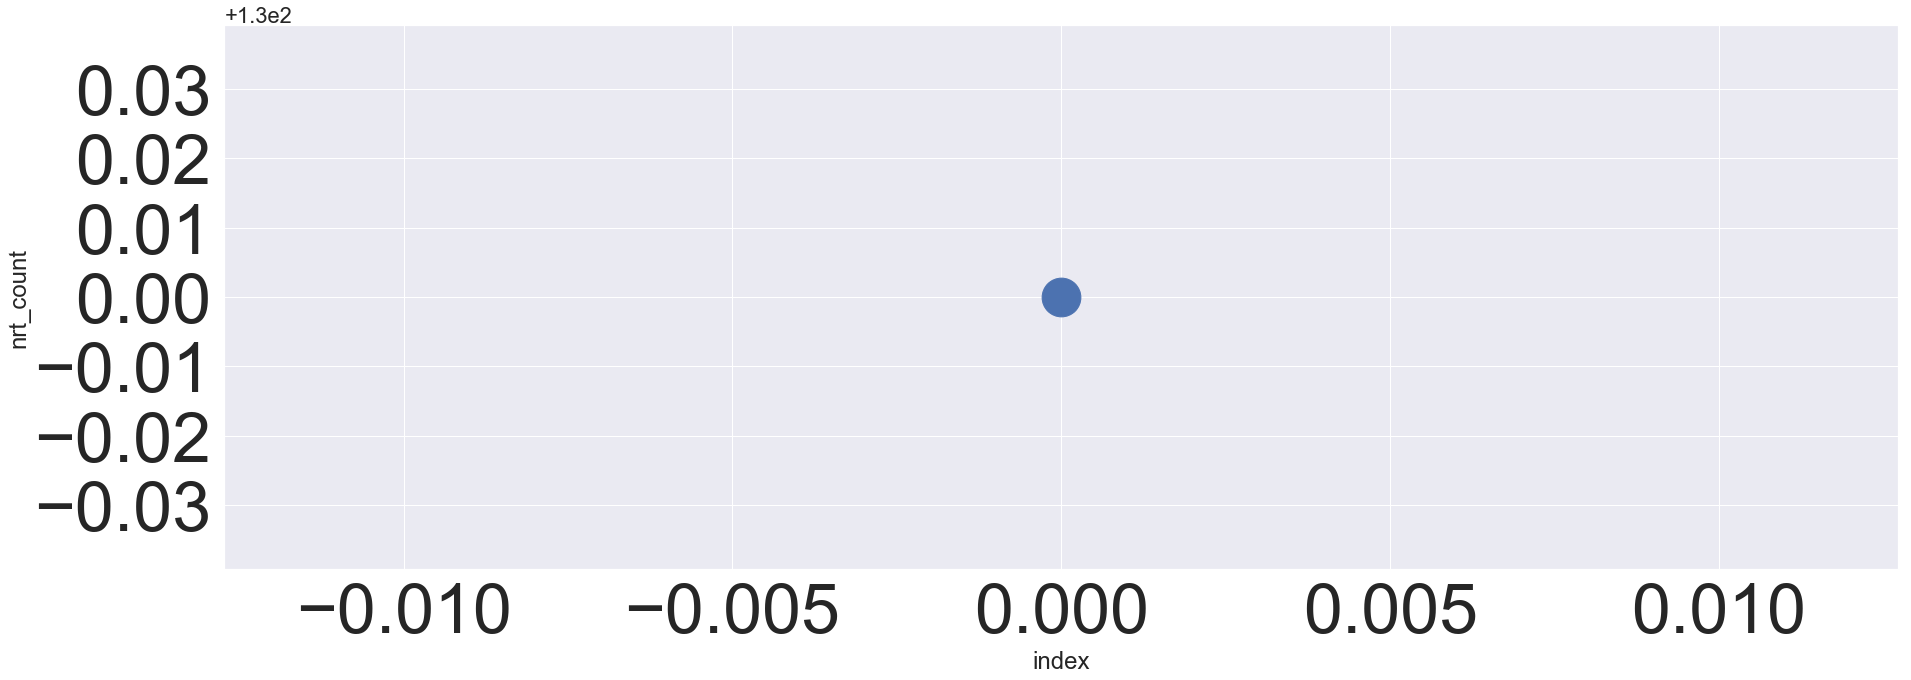

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


---- cdnt_count ---


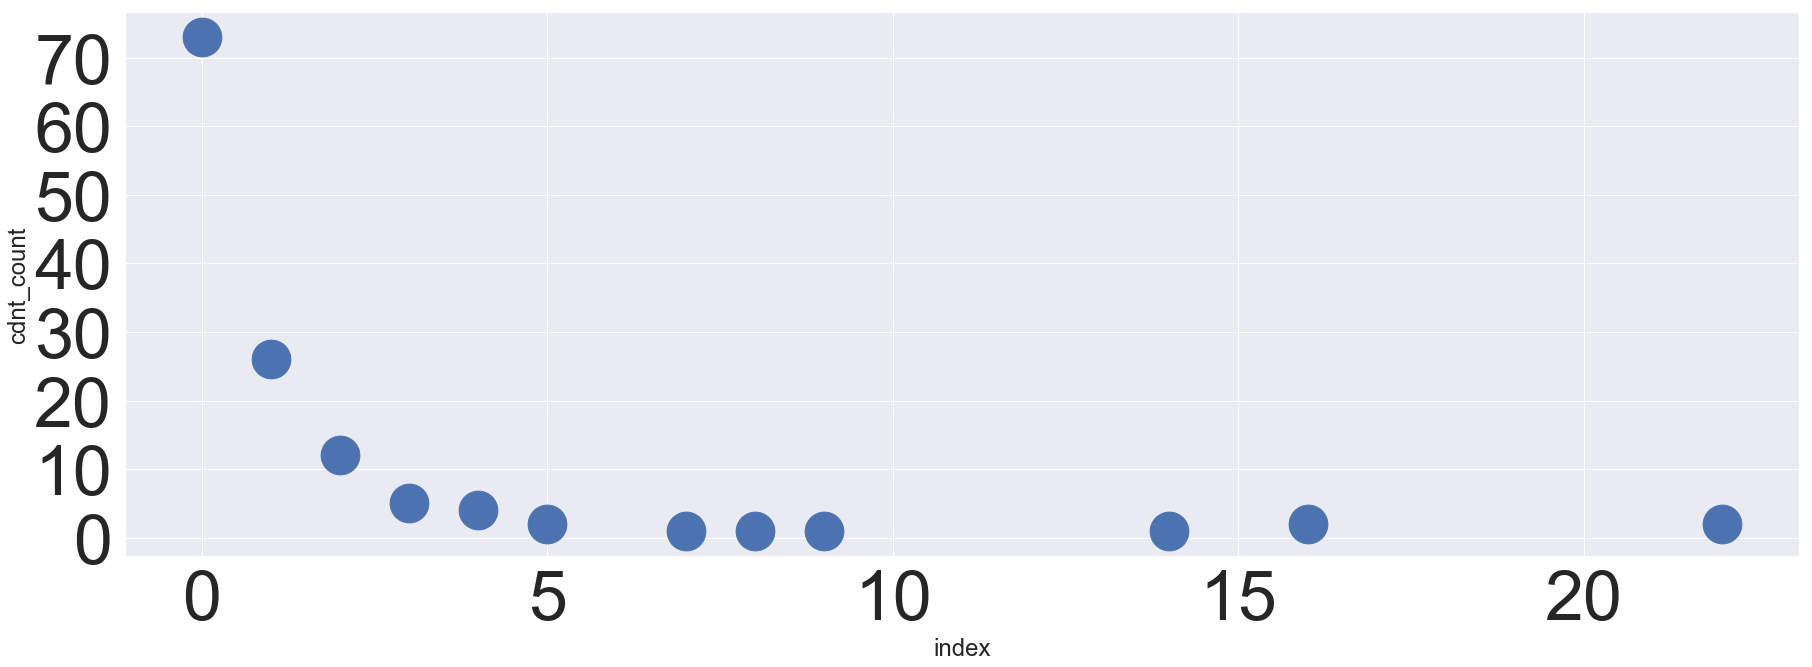

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


---- cdrt_count ---


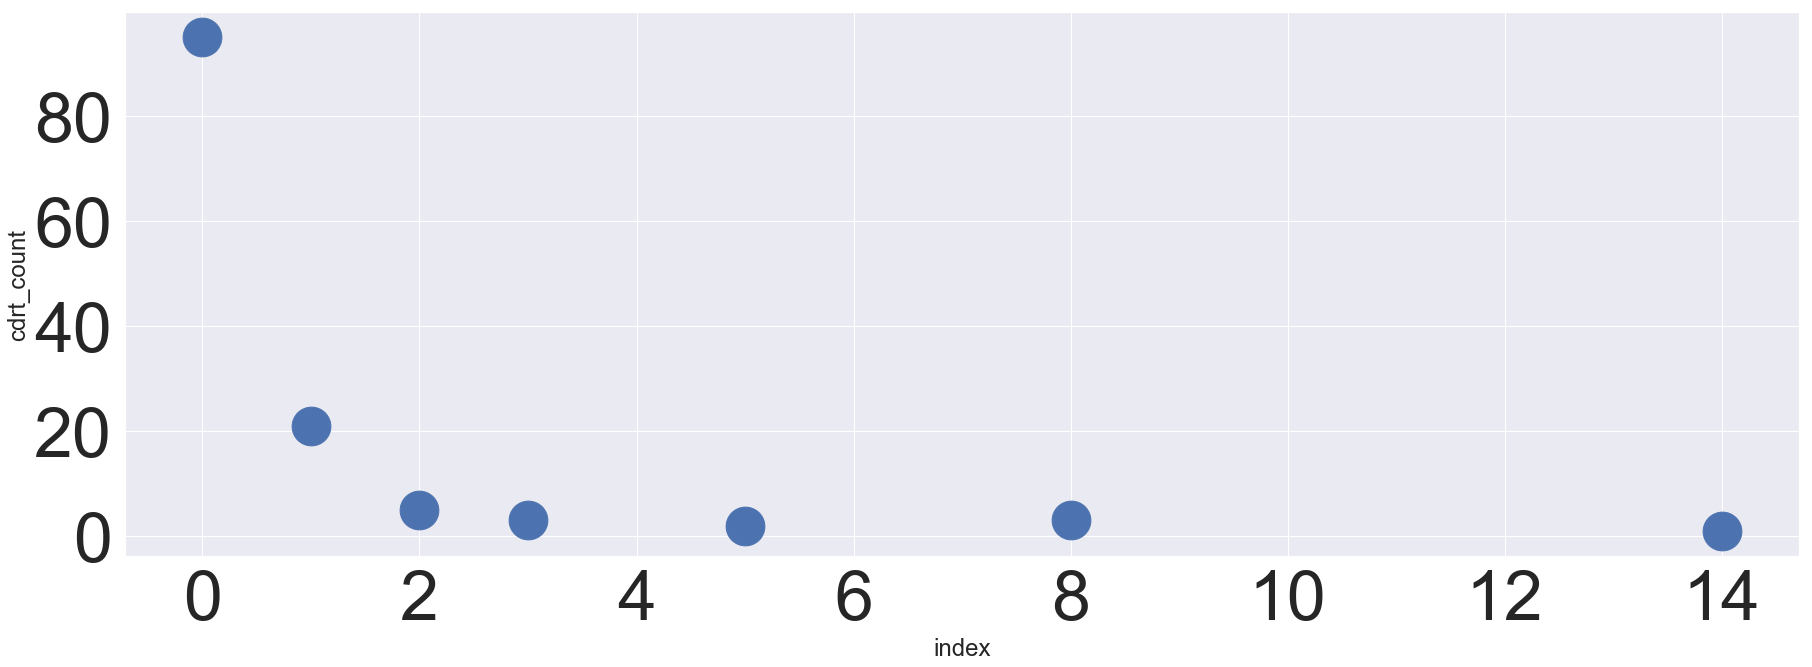

---- cdat_count ---


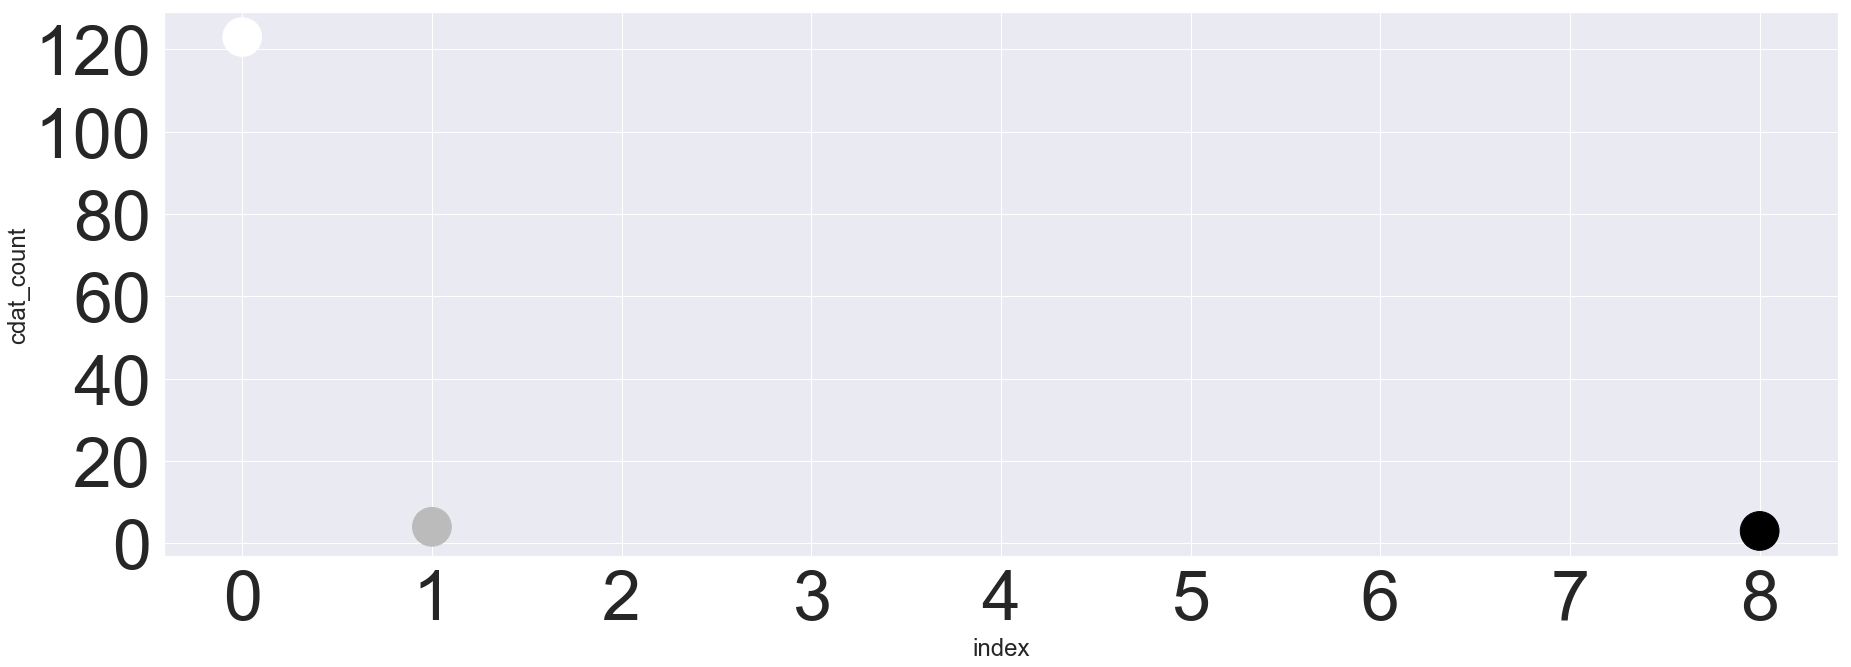

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


---- cdct_count ---


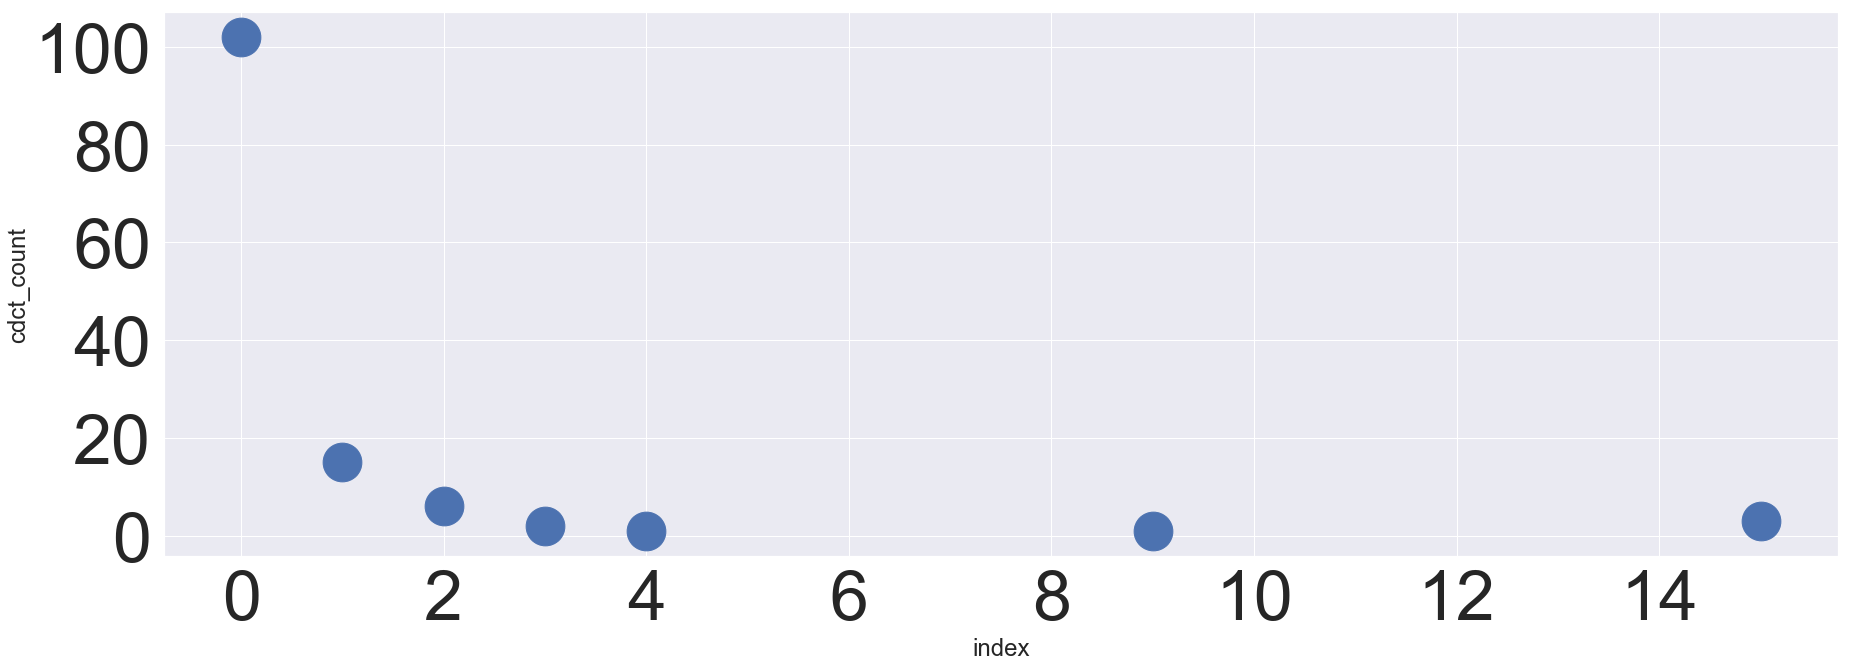

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


---- cddt_count ---


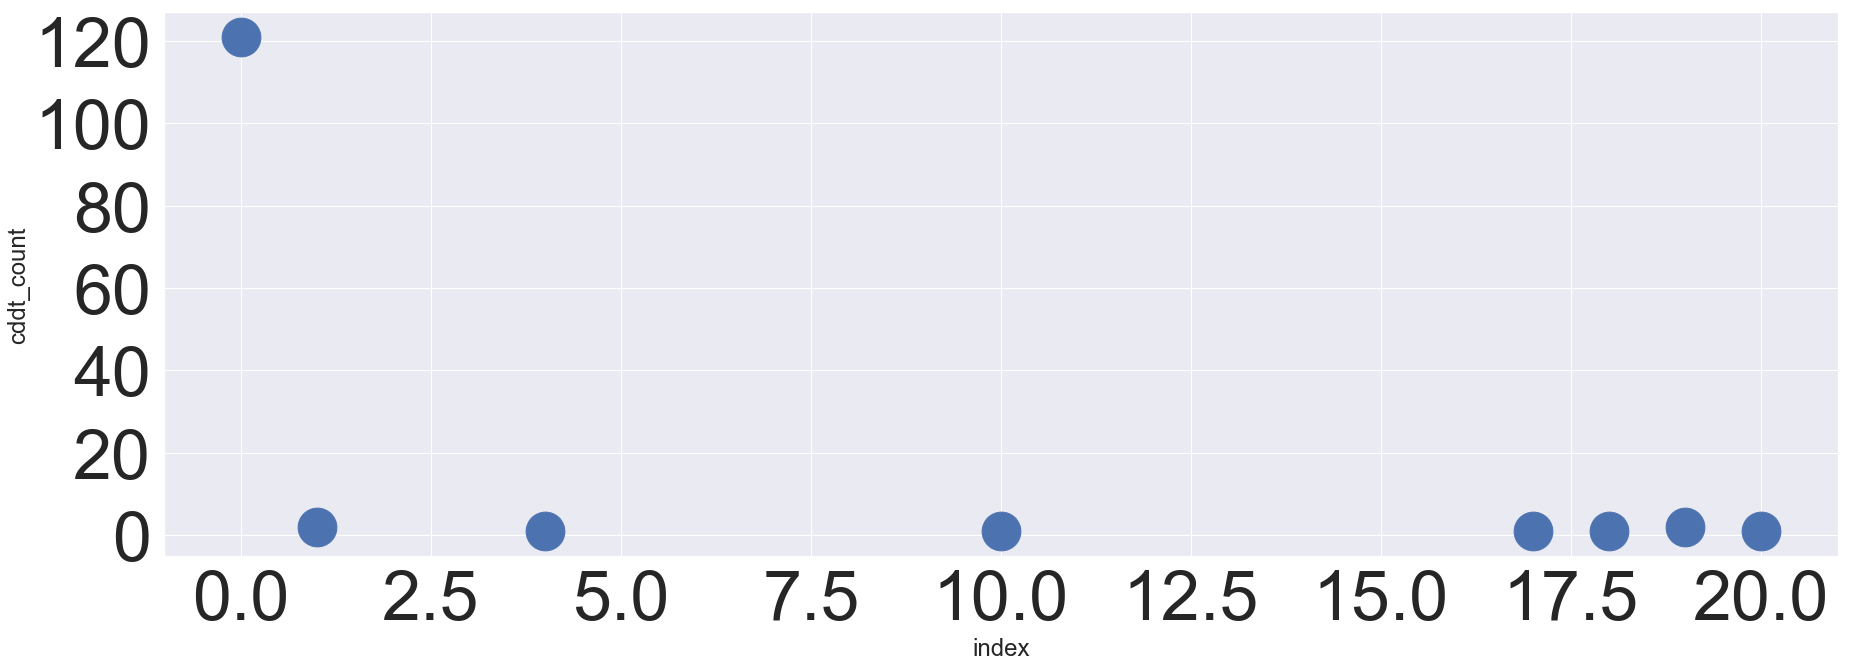

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


---- cdgt_count ---


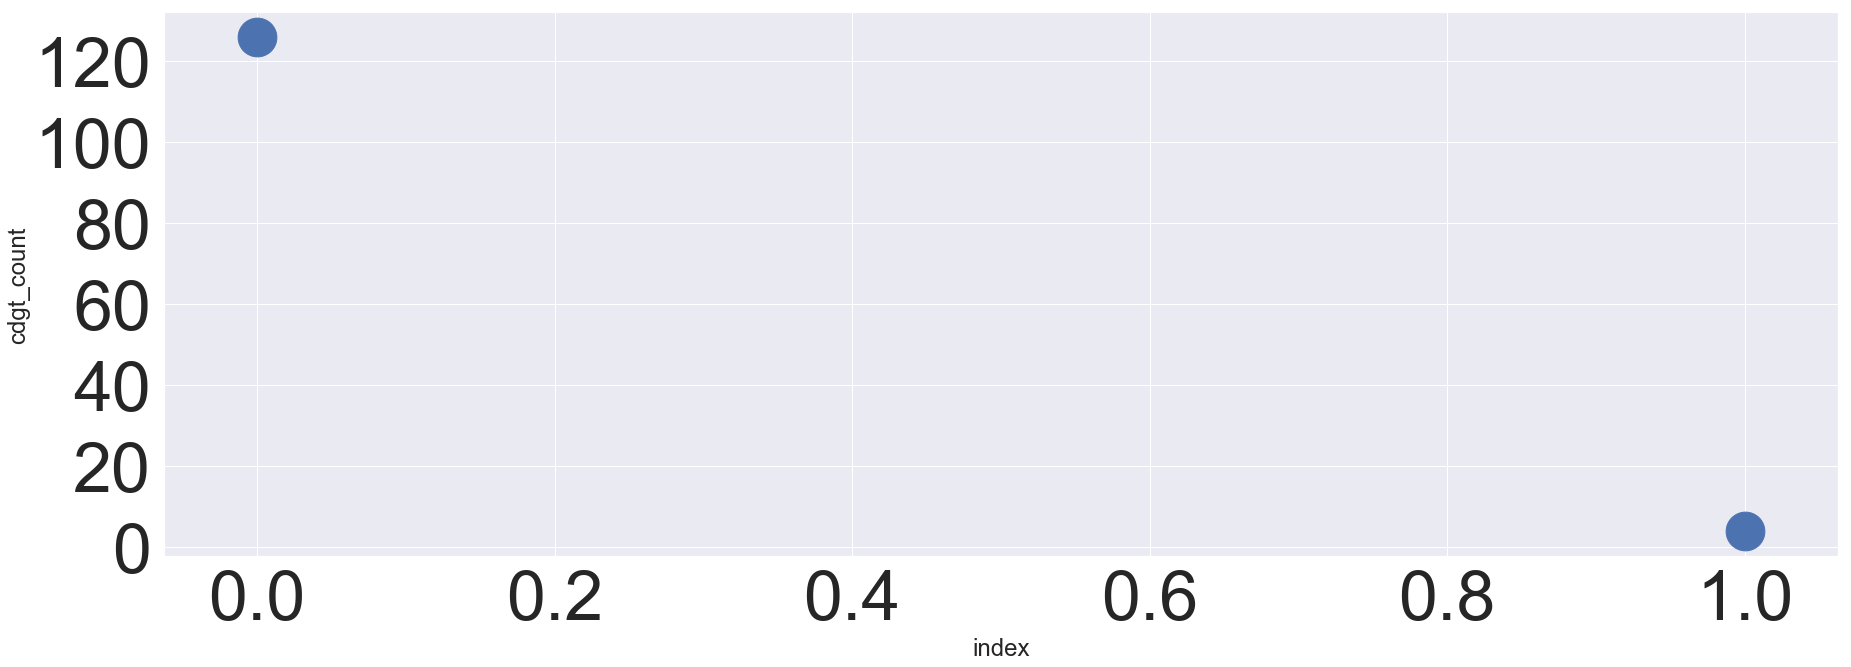

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


---- cdit_count ---


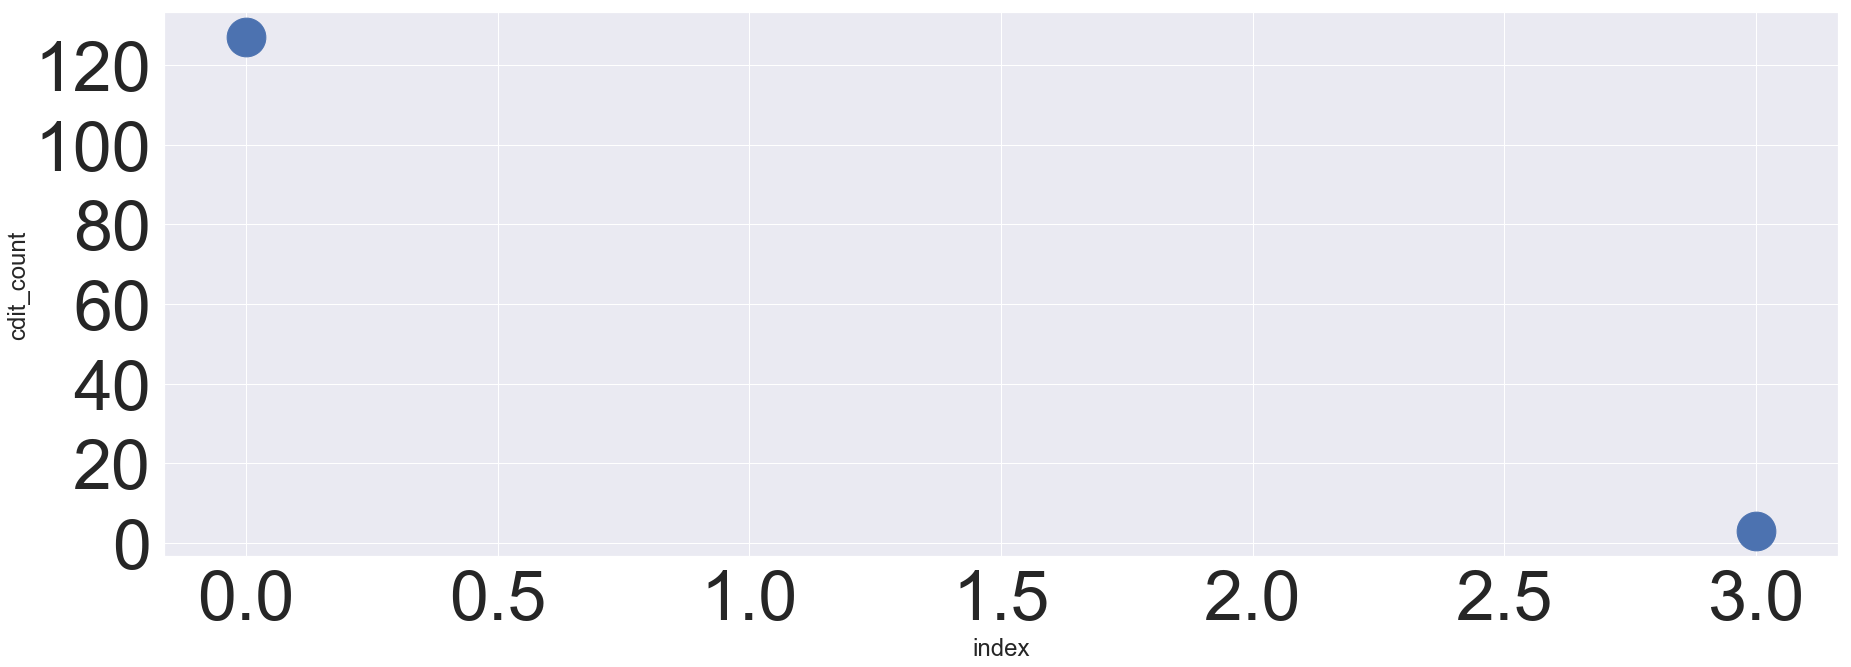

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


---- cdpt_count ---


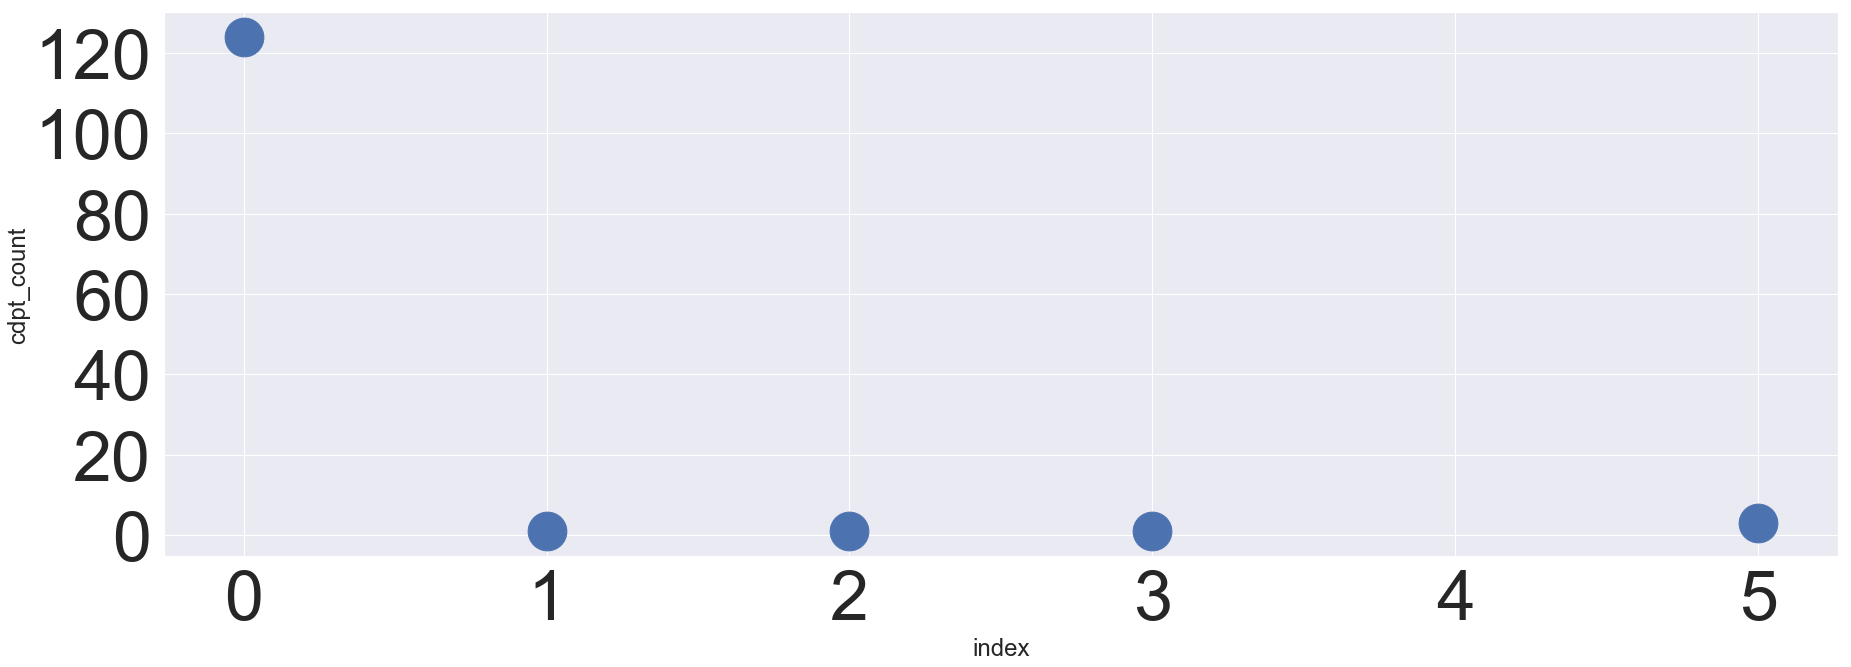

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


---- nw_count ---


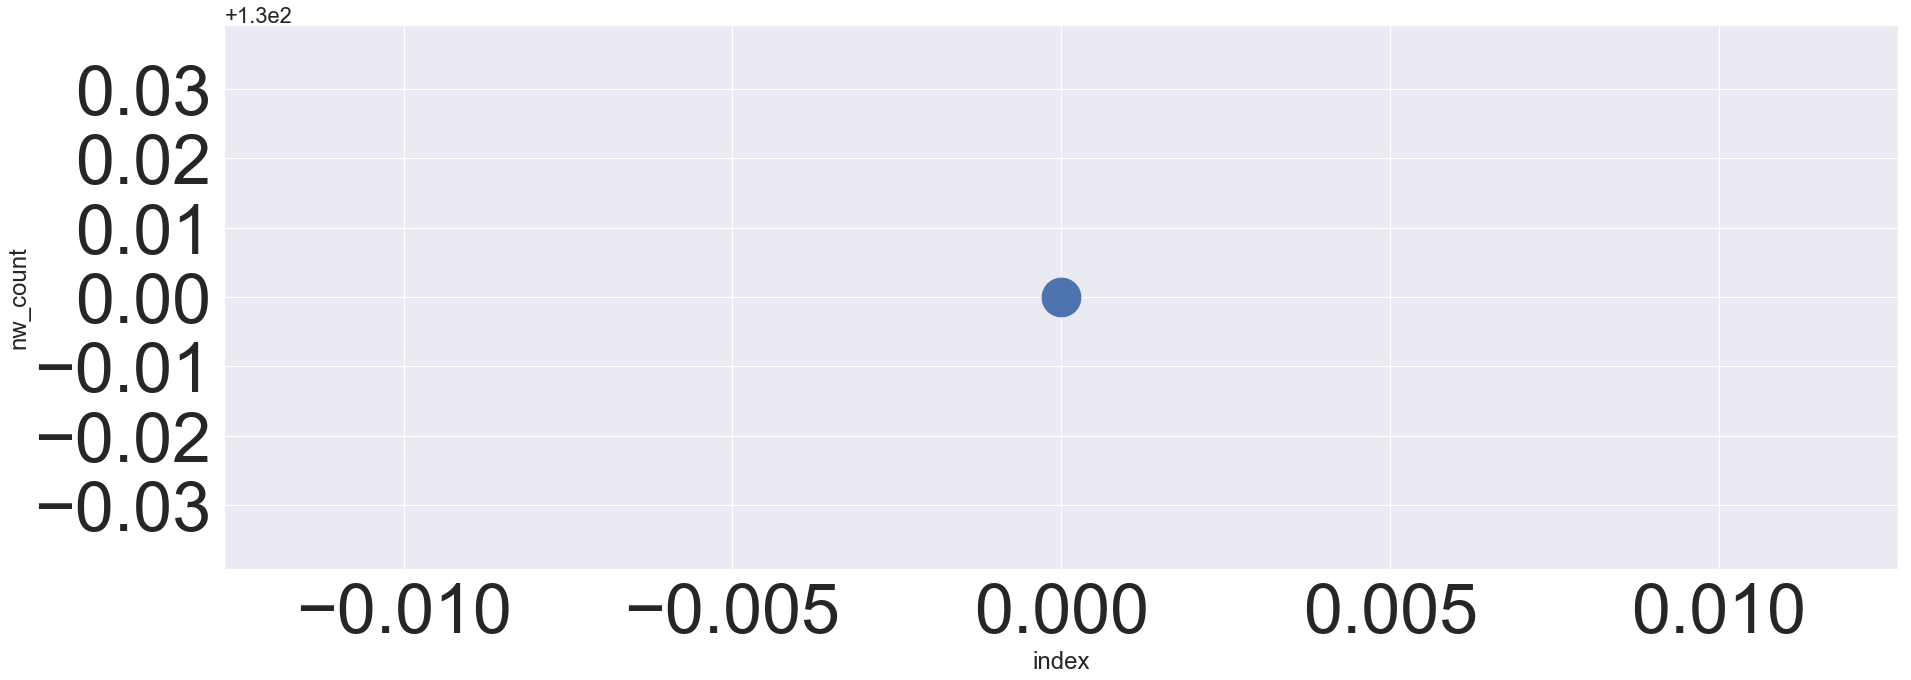

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


---- nrq_count ---


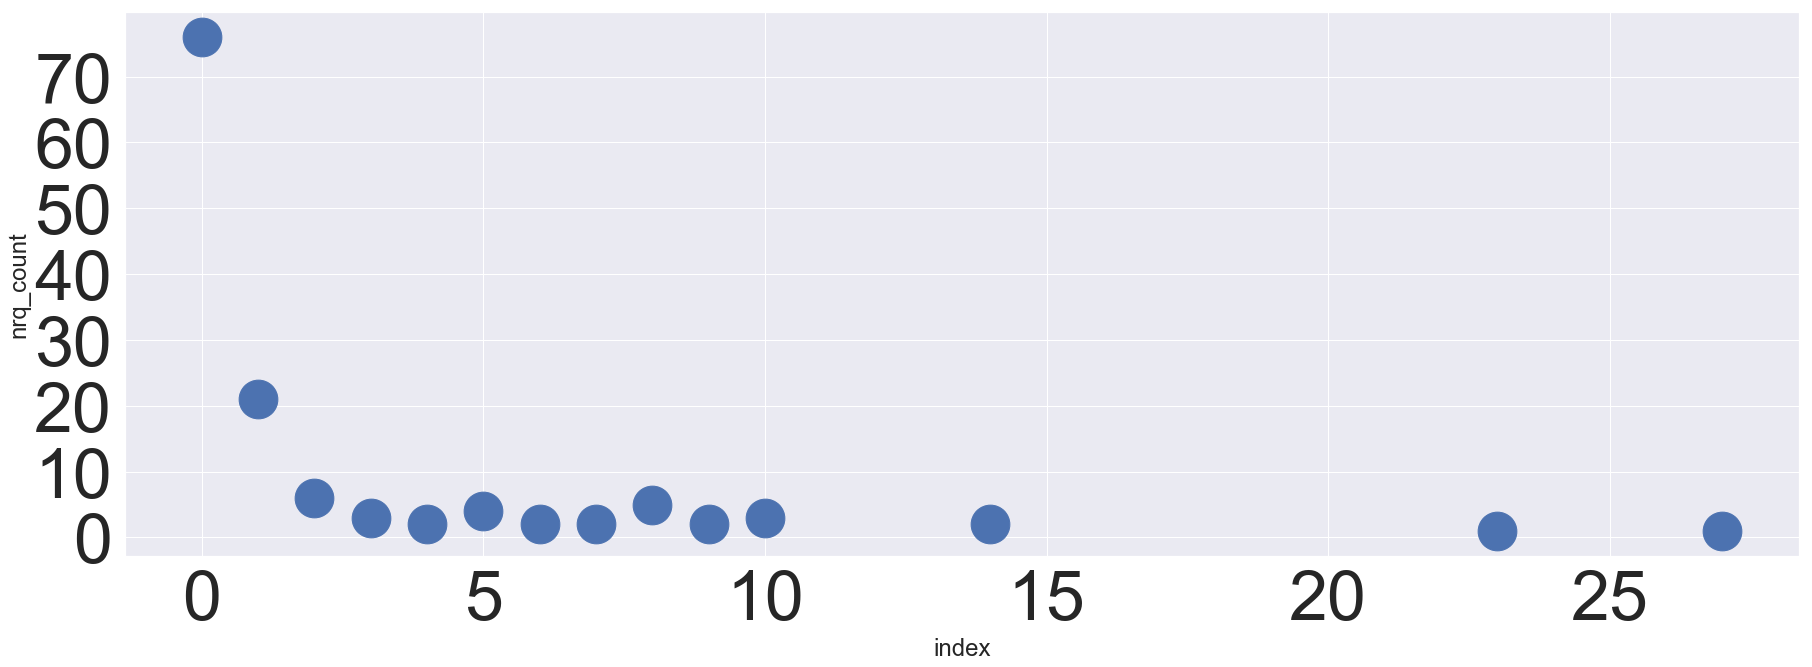

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


---- nsh_count ---


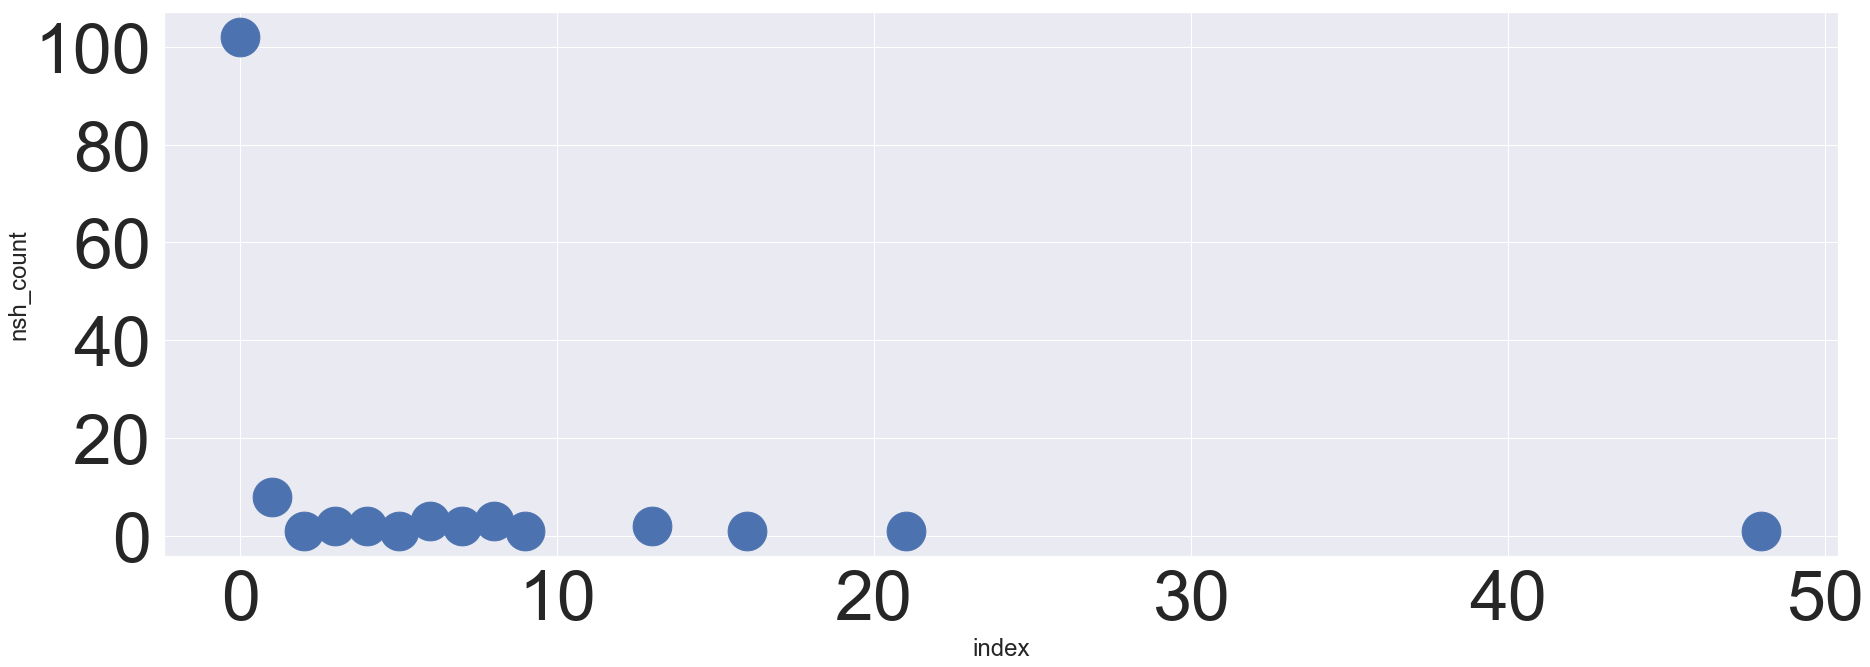

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


---- ncys_count ---


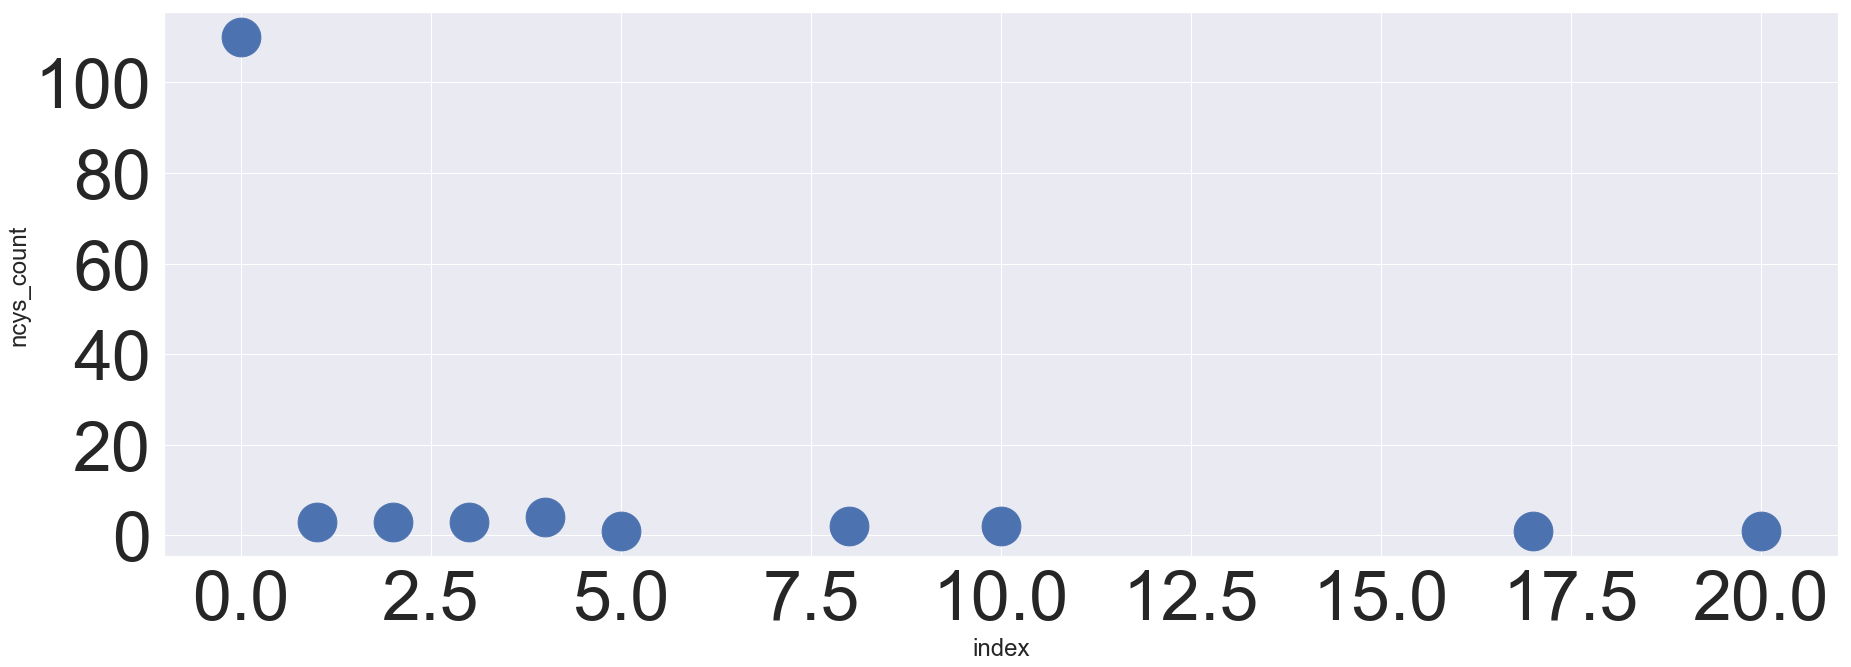

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


---- ngc_count ---


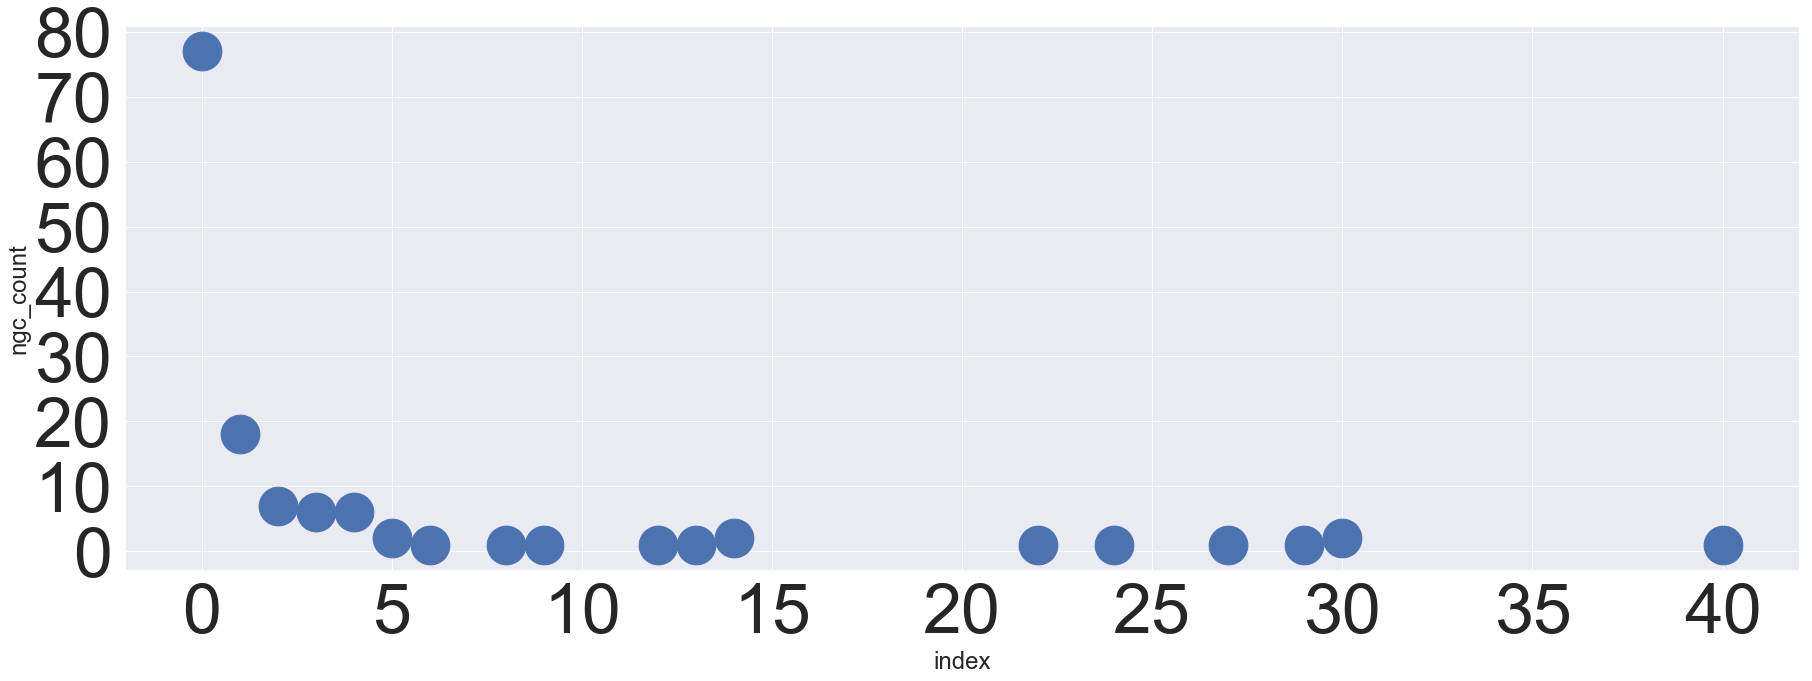

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


---- ngp_count ---


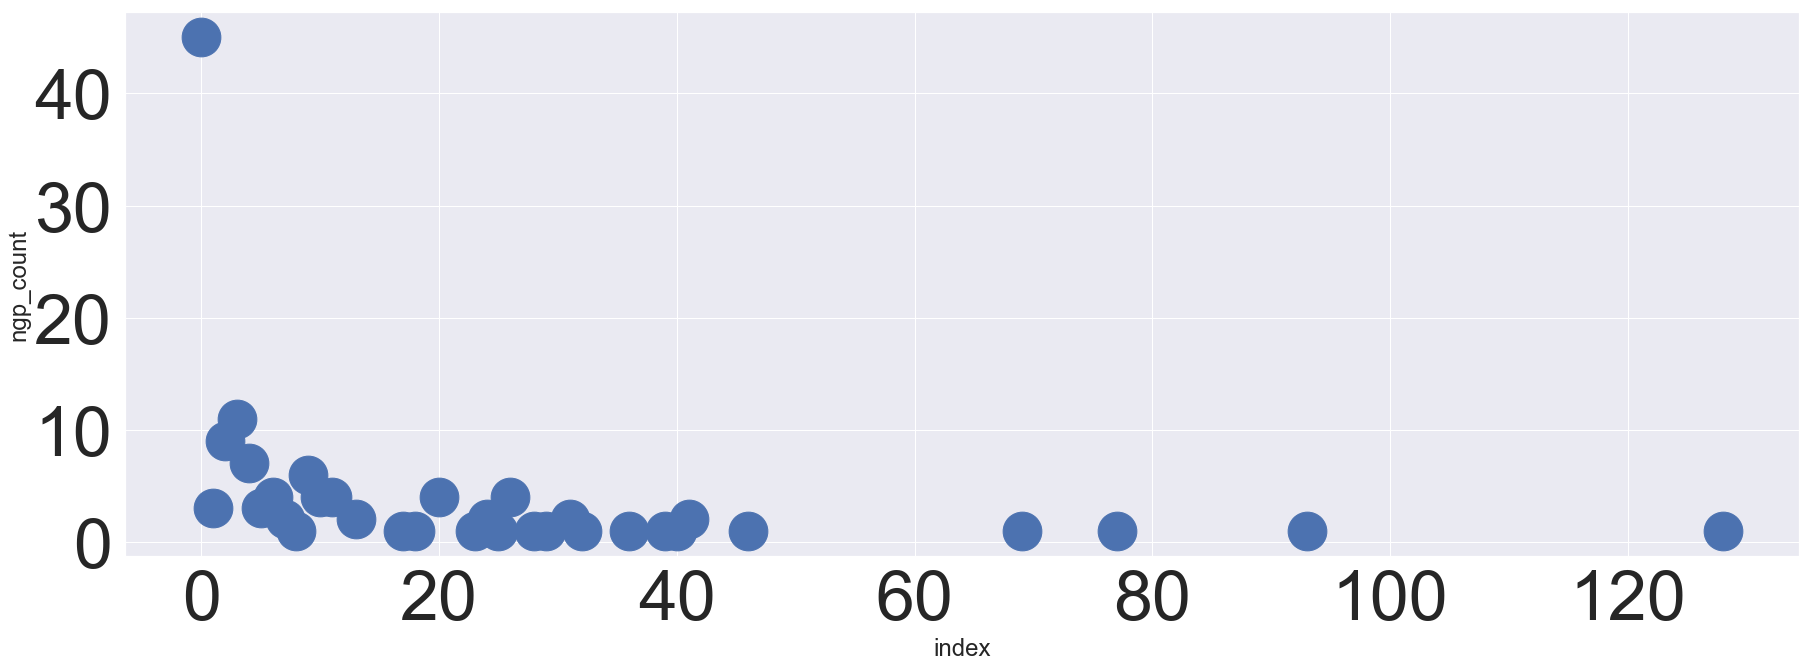

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


---- ngro_count ---


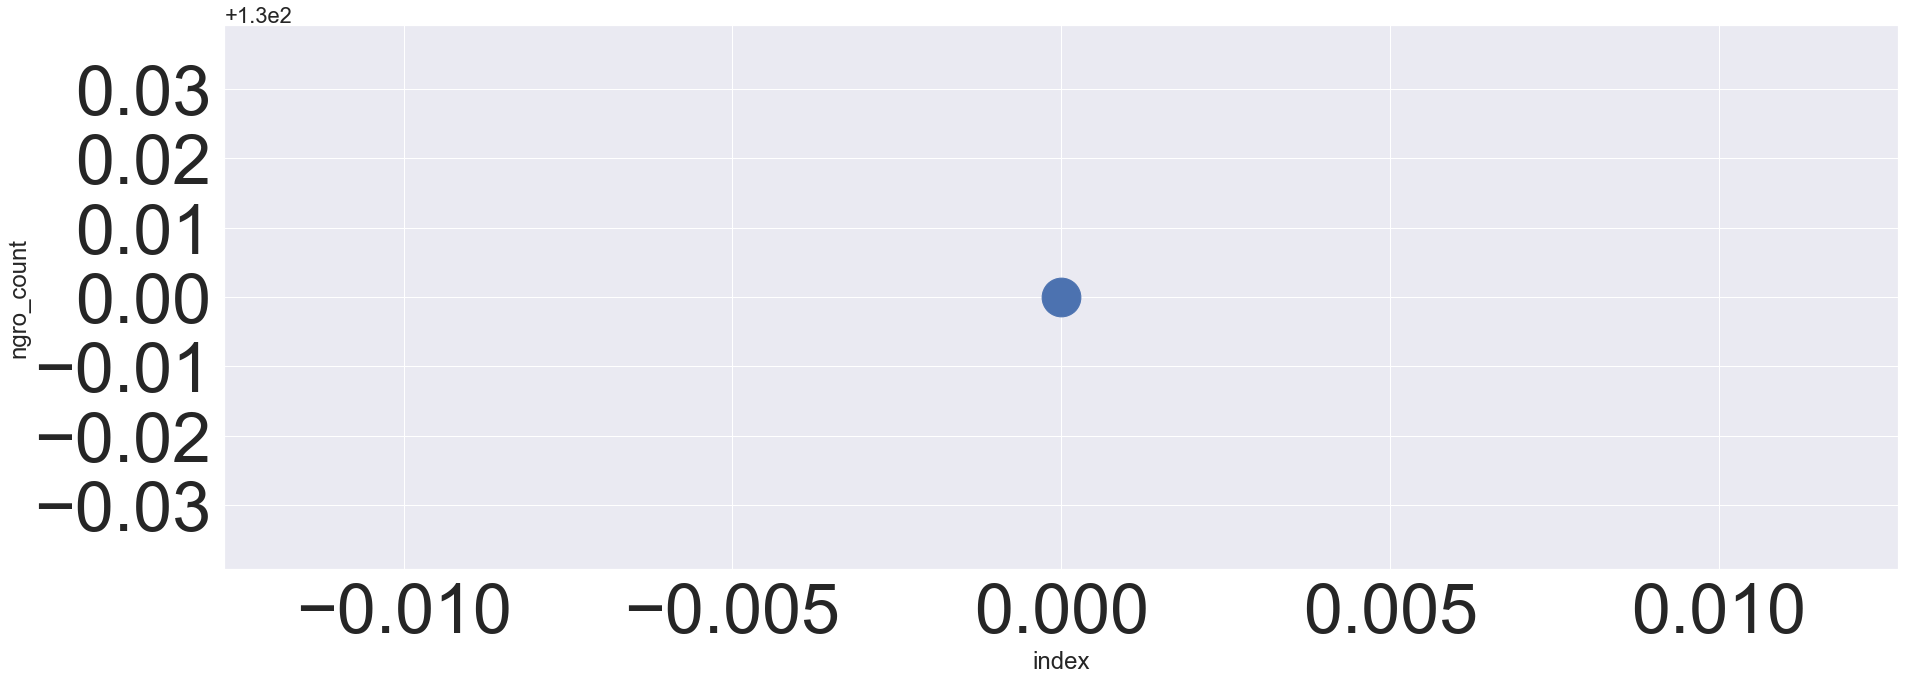

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


---- npol_count ---


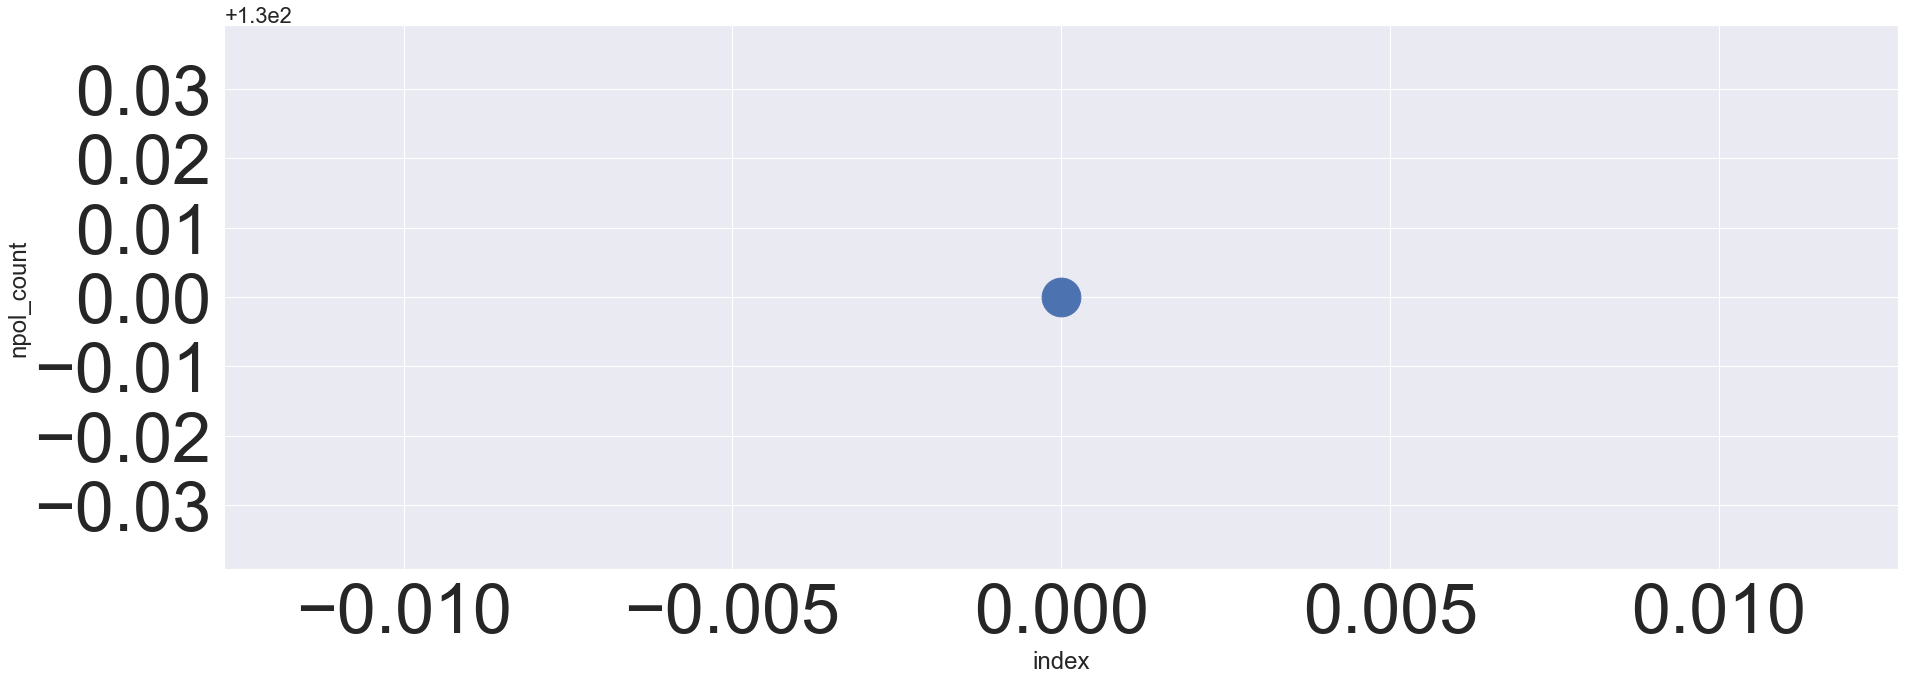

---- nf_count ---


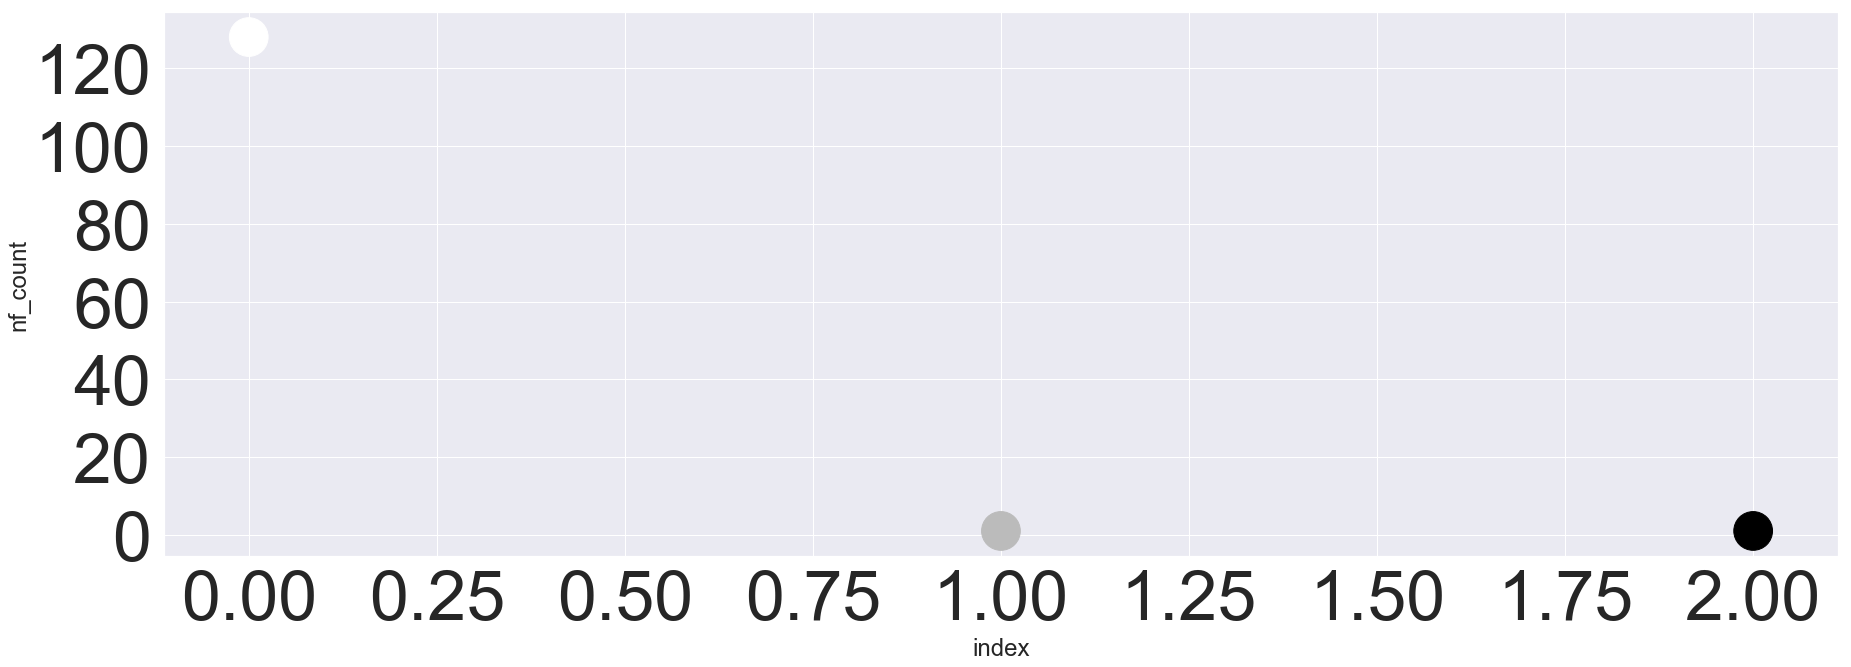

In [15]:
#Index staat raar hier bij een aantal?
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    print("---- {} ---".format(column))
    df_count = df[column].value_counts().sort_index()
    df_count = df_count.to_frame()
    df_count['index'] = df_count.index
    df_count.plot(x='index', y=column, kind='scatter', subplots=False, figsize=(30,10), fontsize=70, marker='o', s=1500)
    plt.show()
    

### Bar value count per metric 

---- loc_count ---


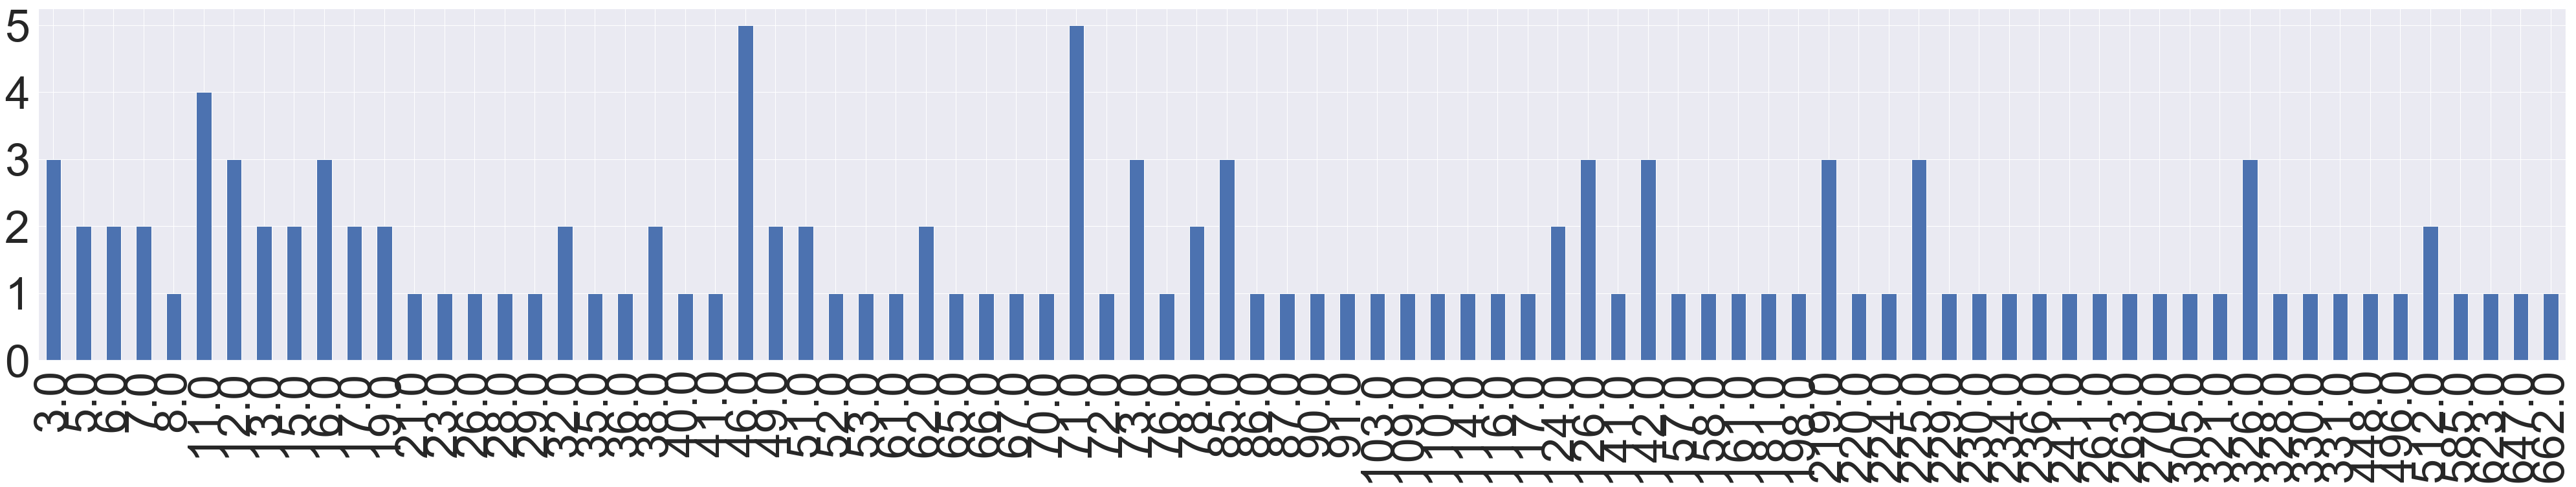

---- bloc_count ---


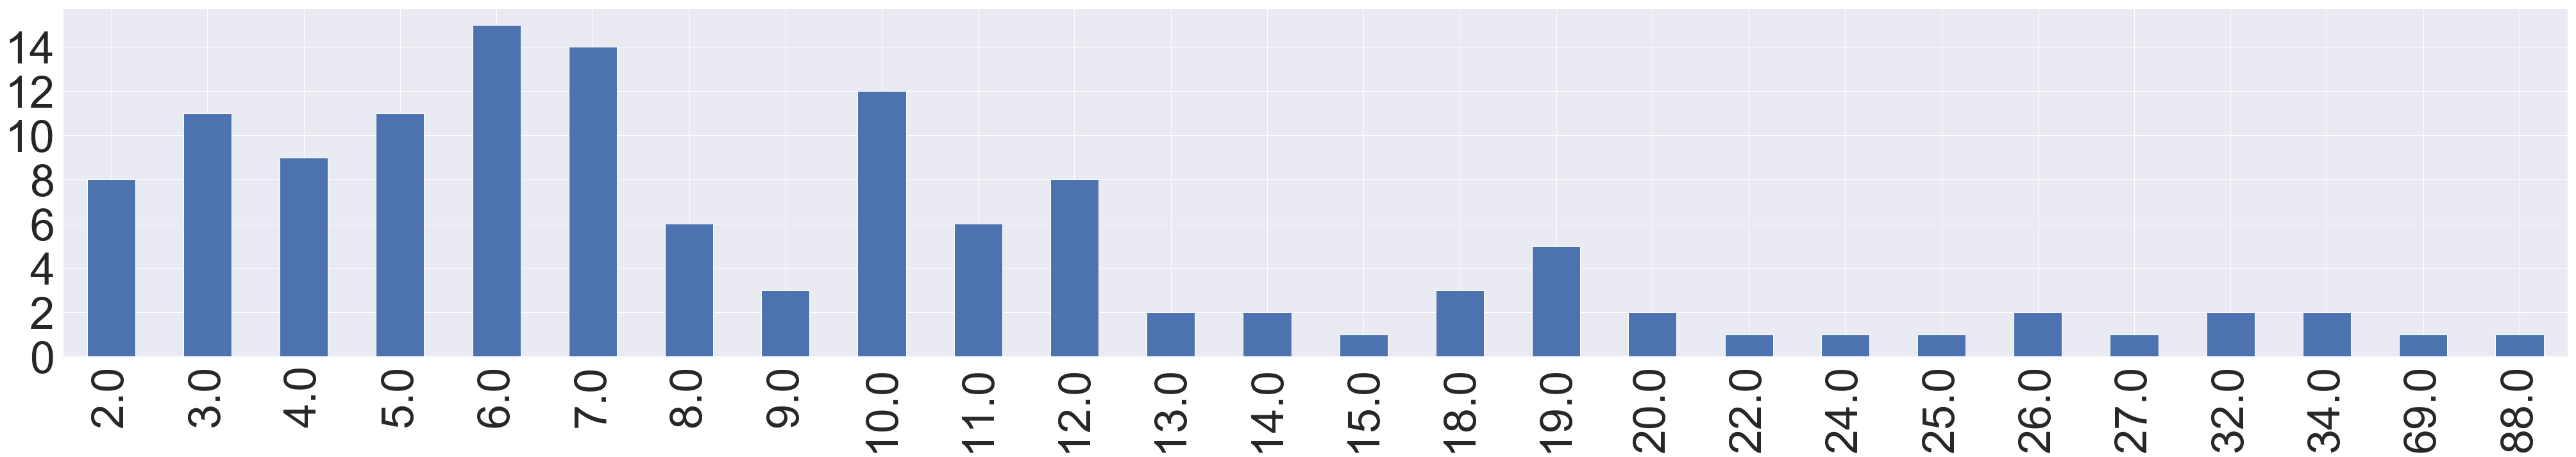

---- cloc_count ---


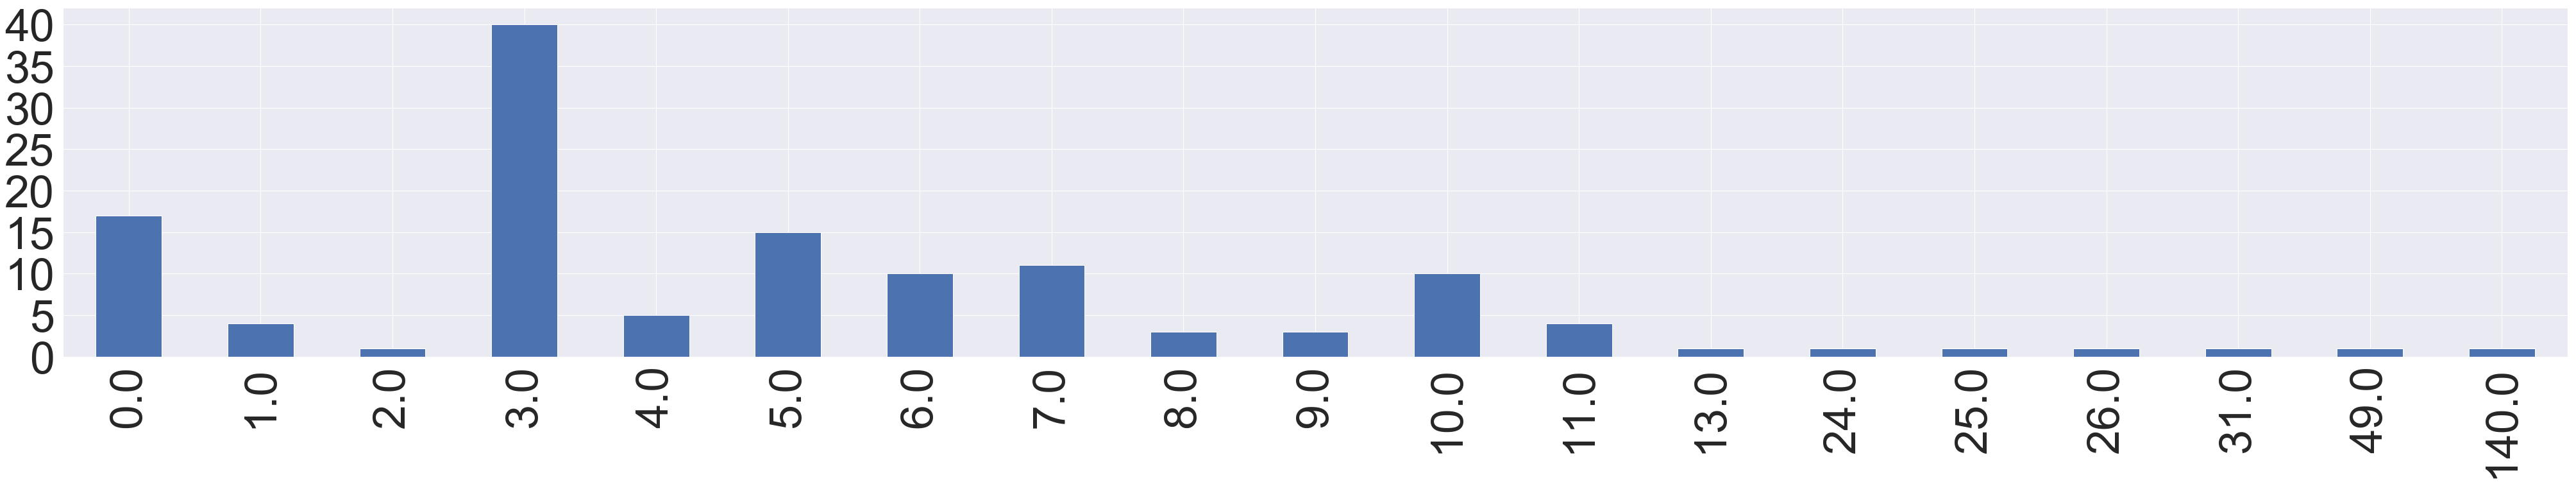

---- dpt_count ---


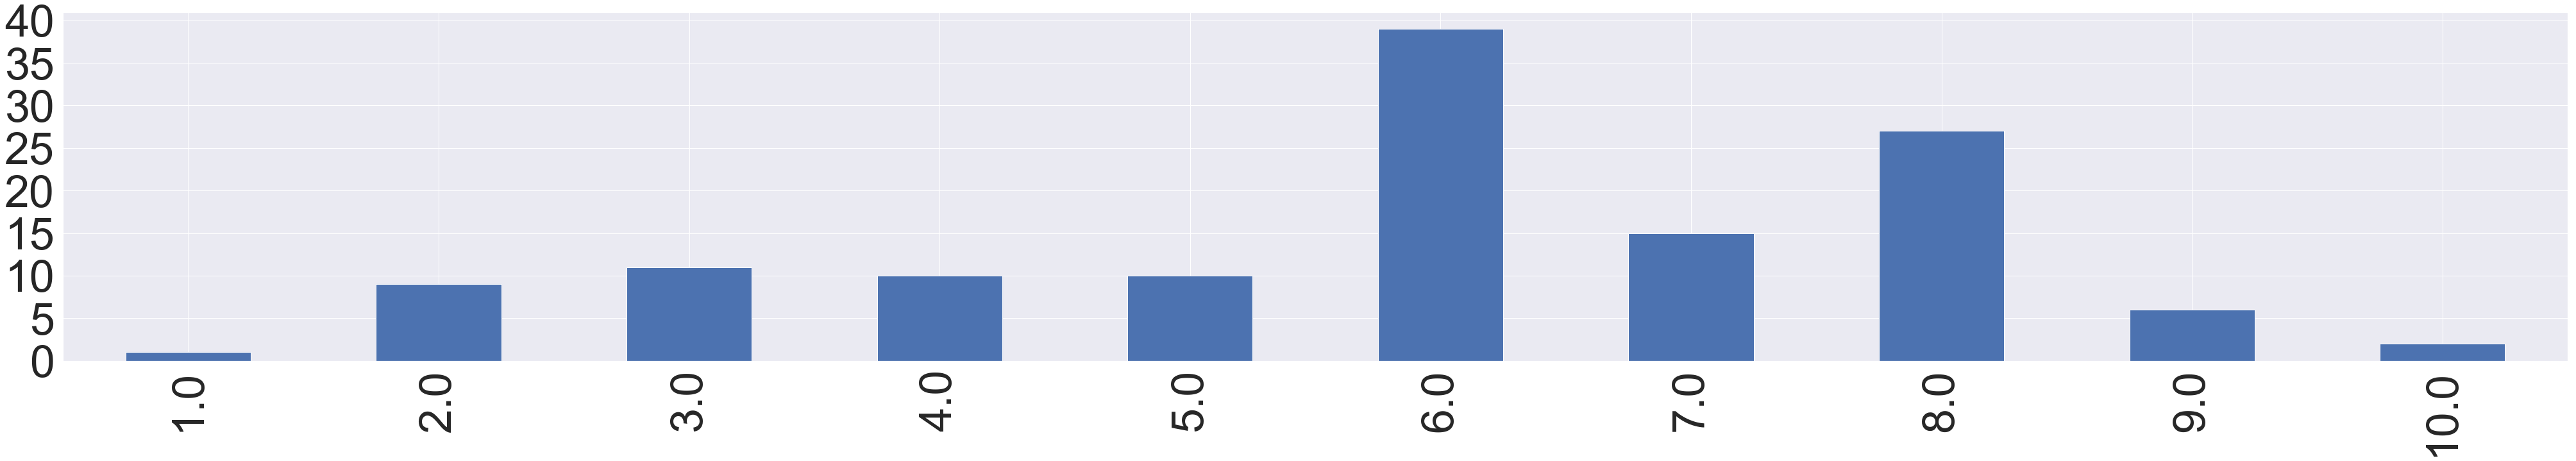

---- etp_count ---


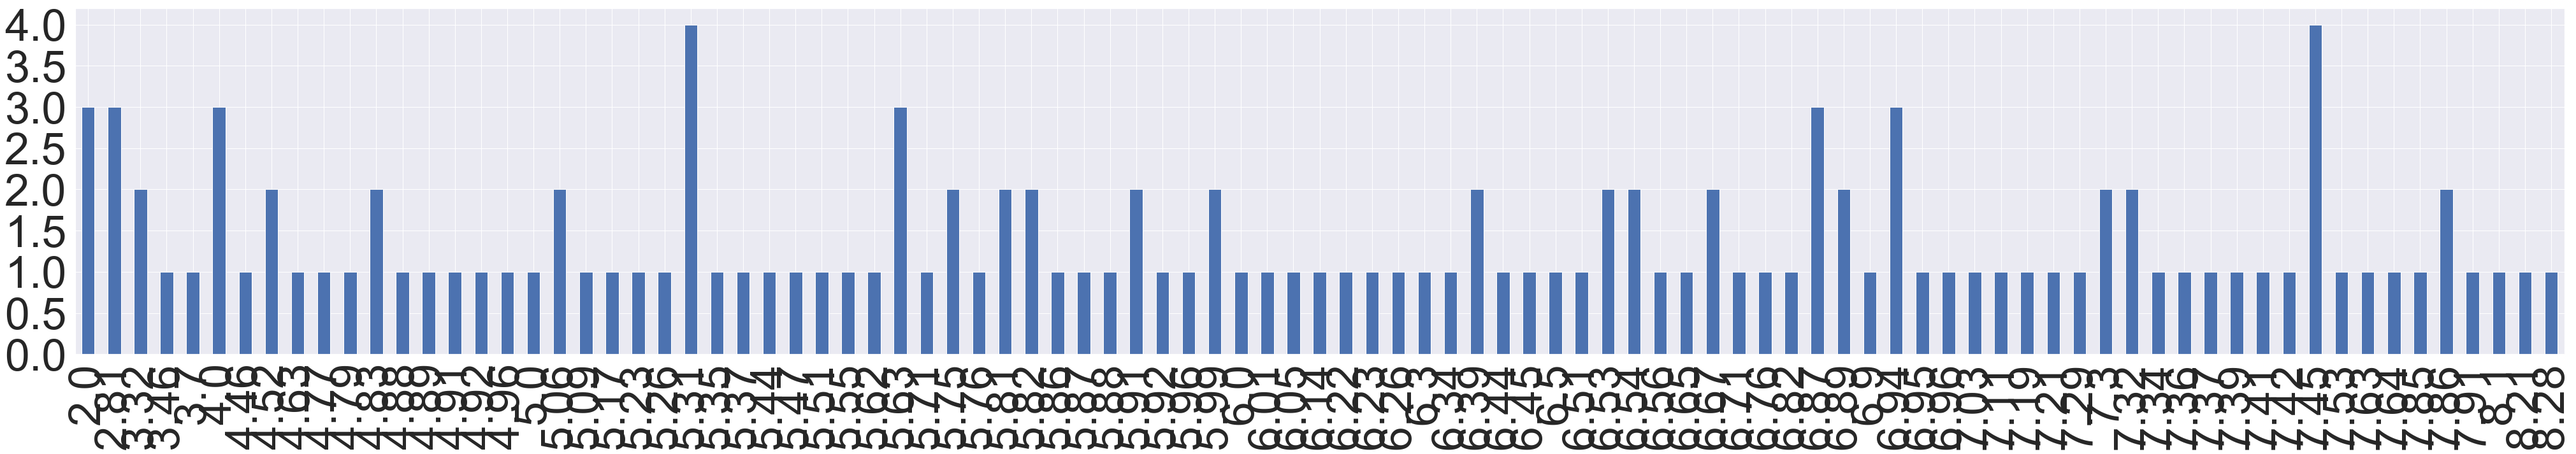

---- nco_count ---


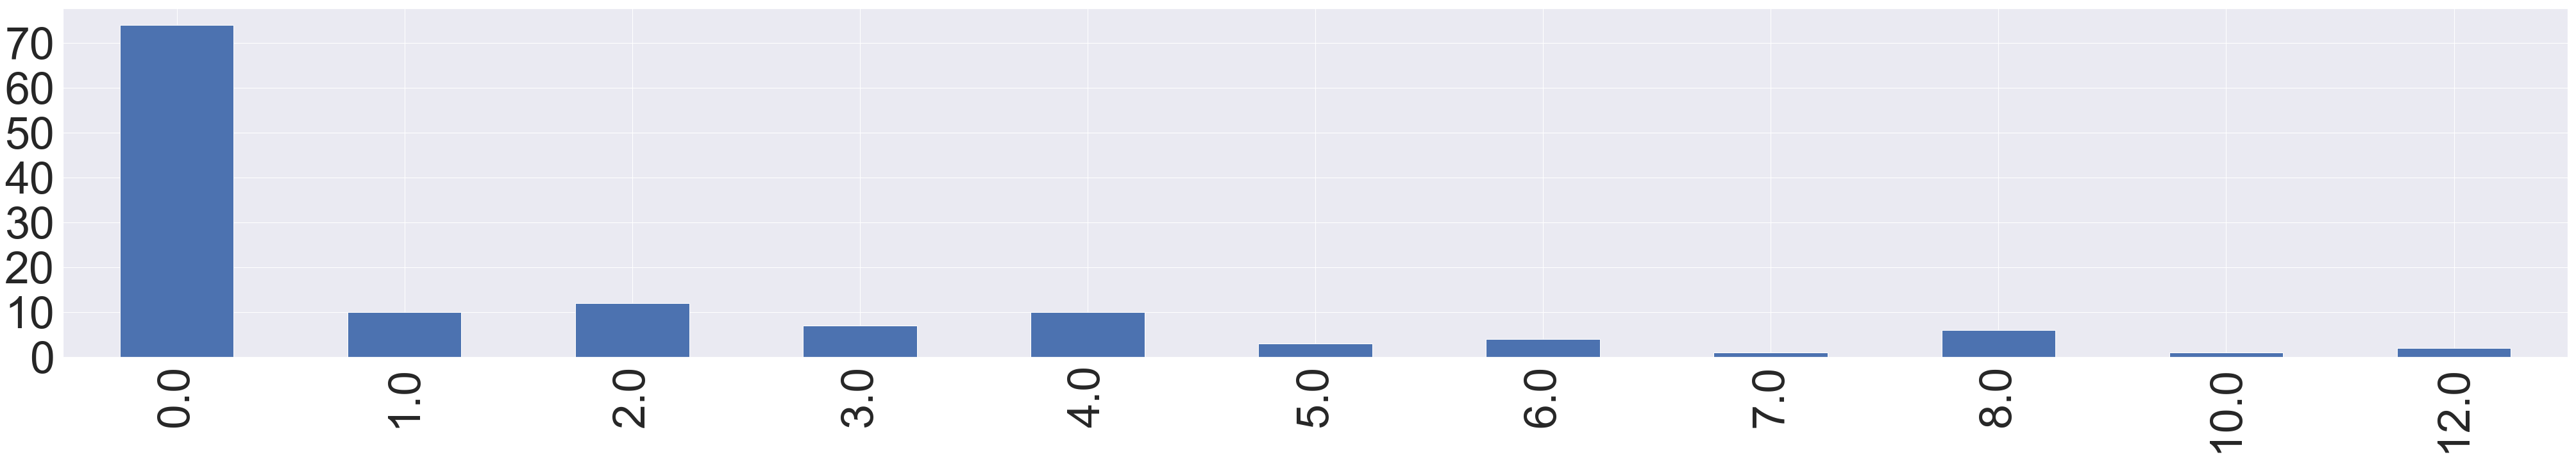

---- nkeys_count ---


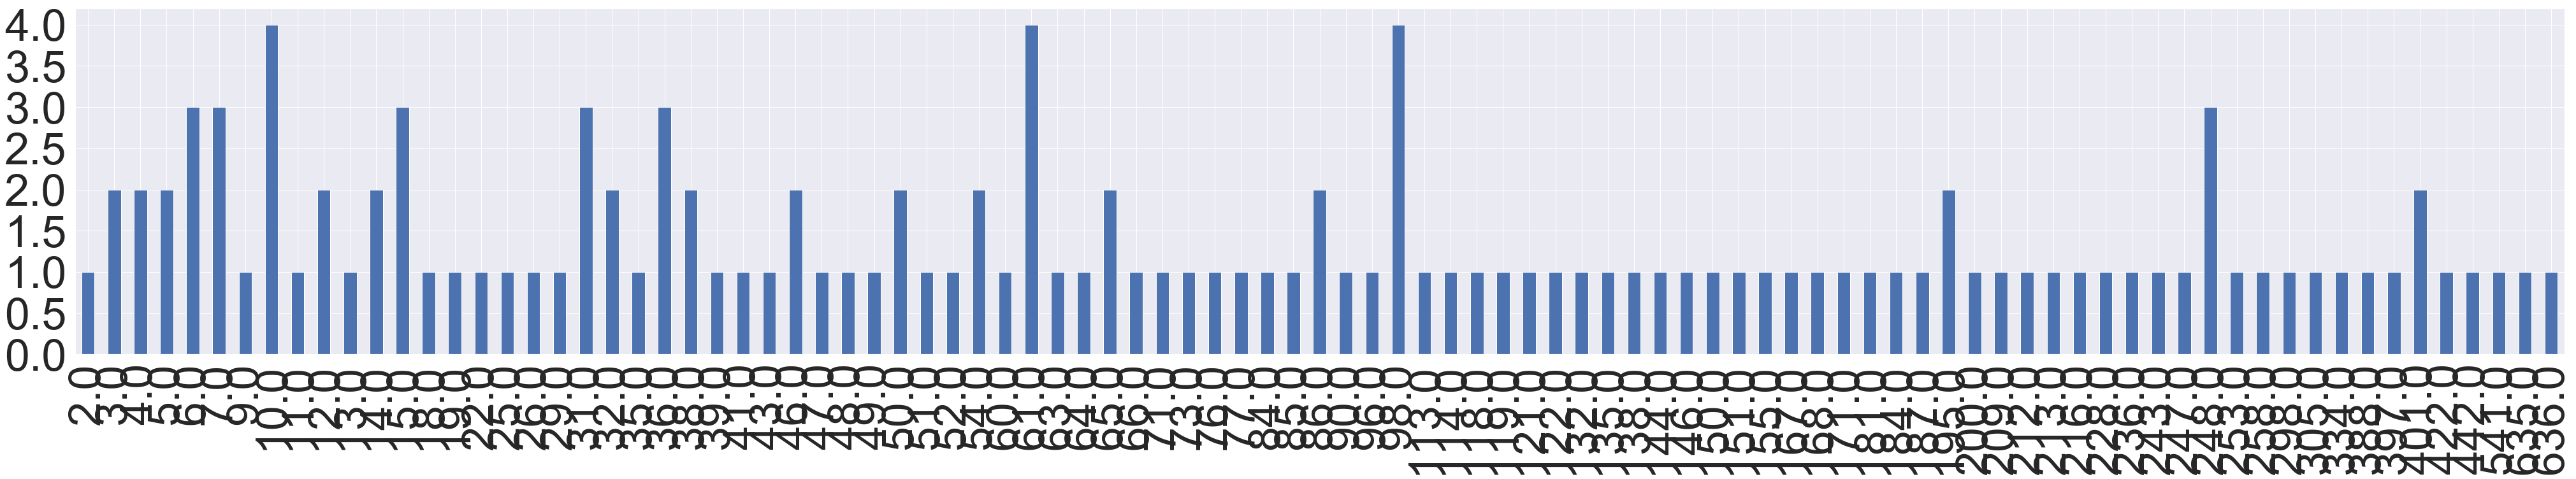

---- ntkn_count ---


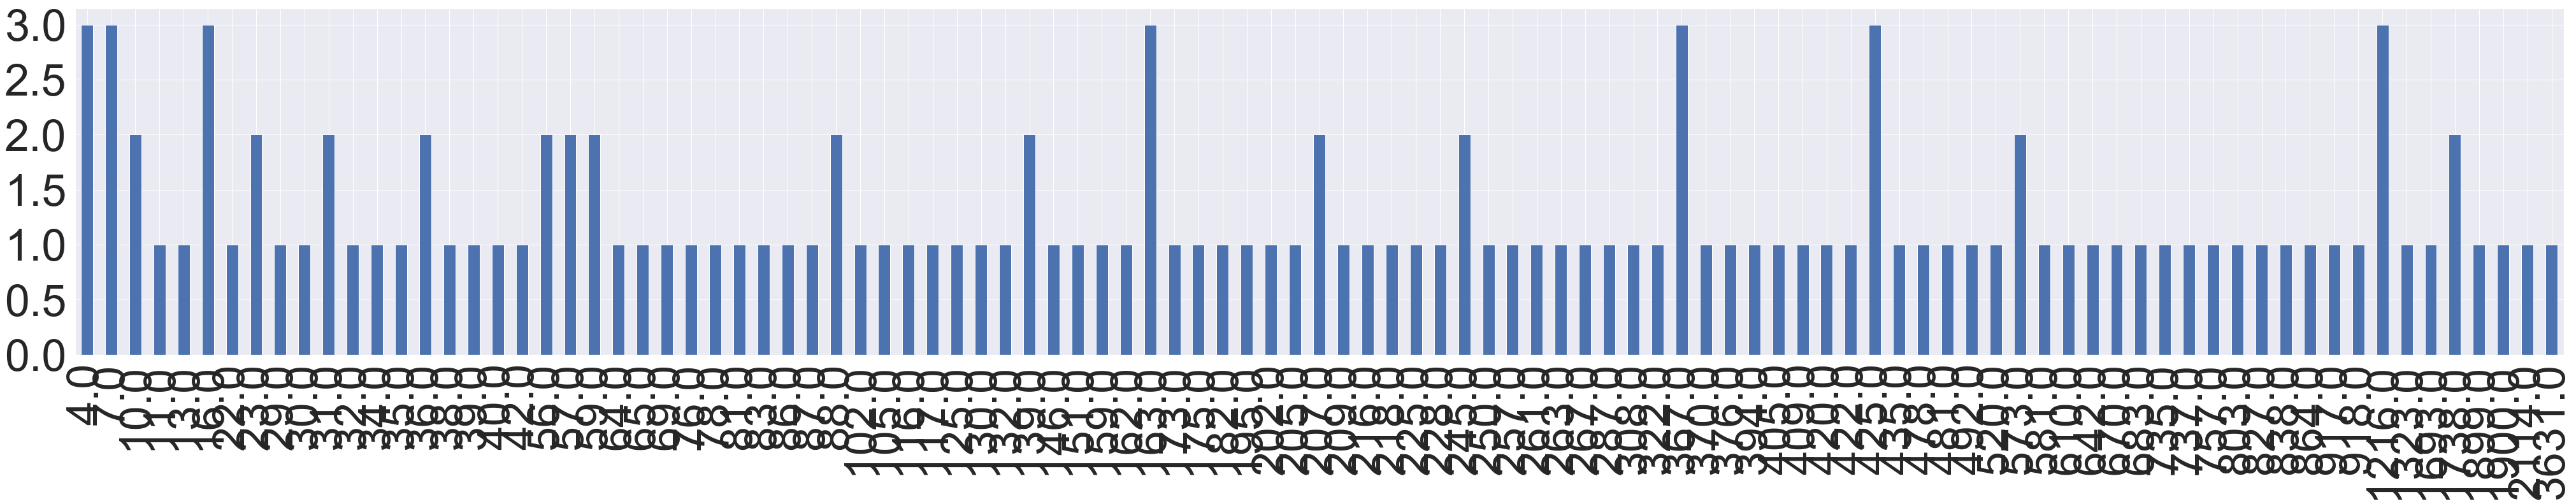

---- nscm_count ---


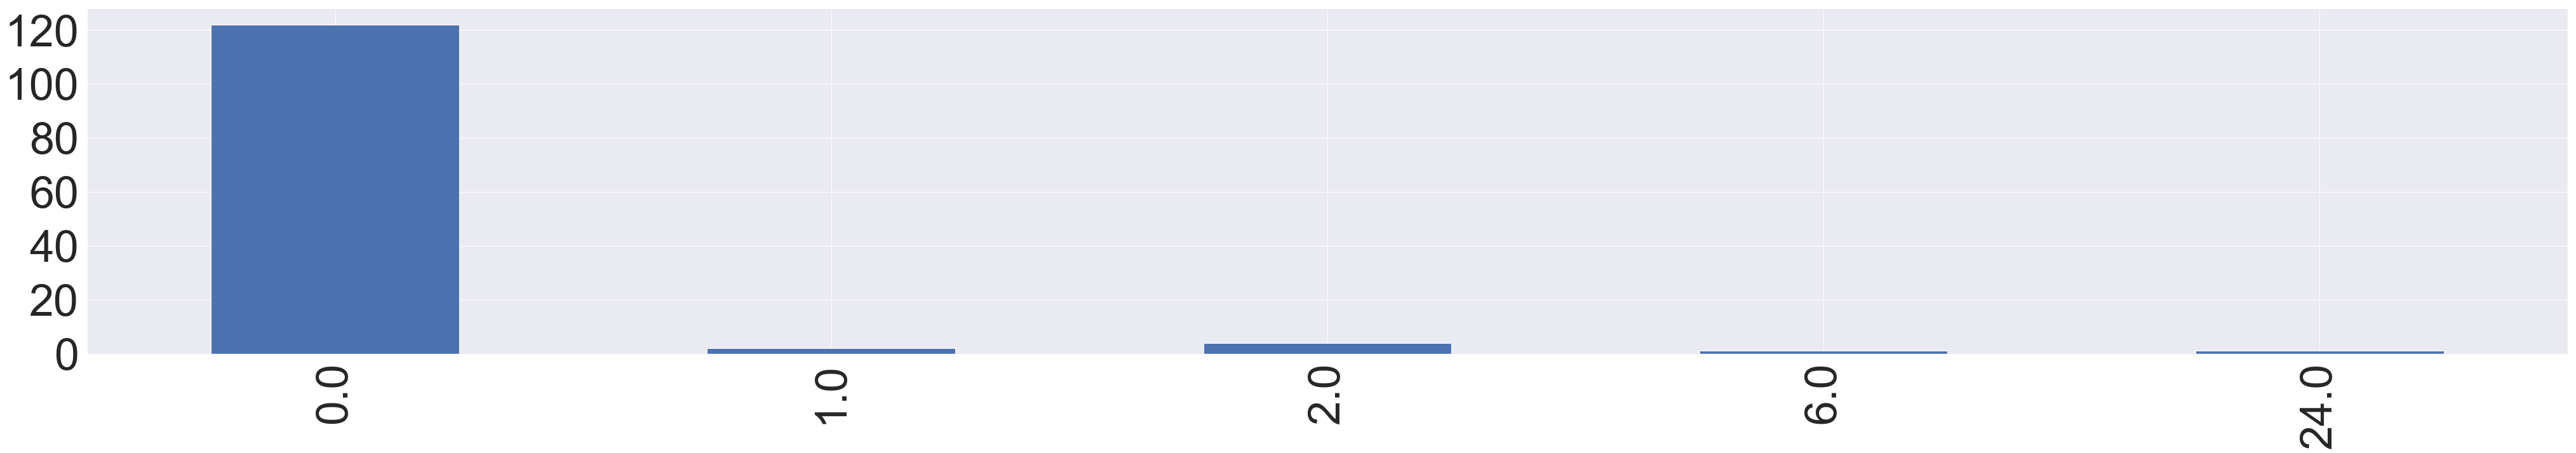

---- na_count ---


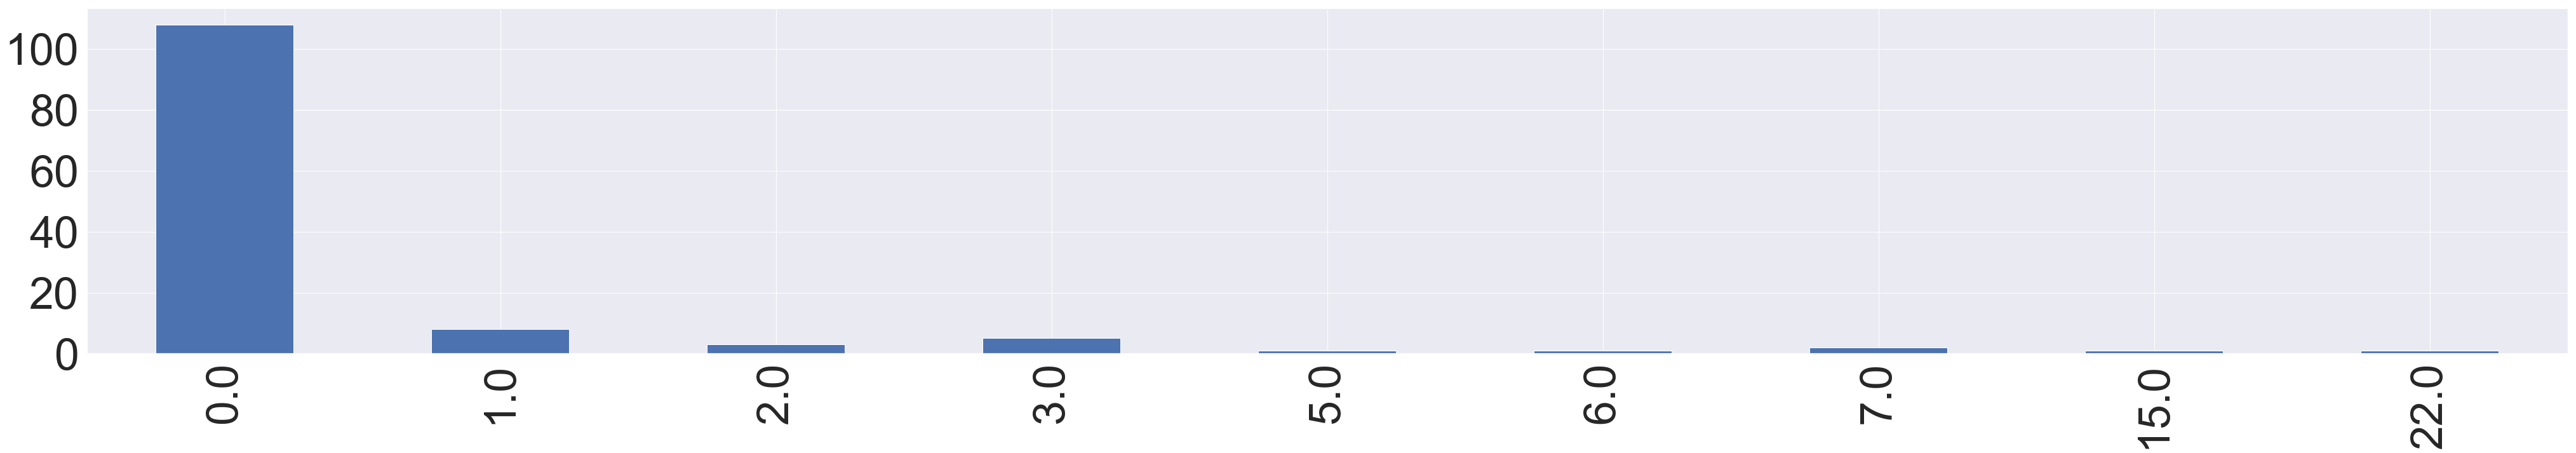

---- nc_count ---


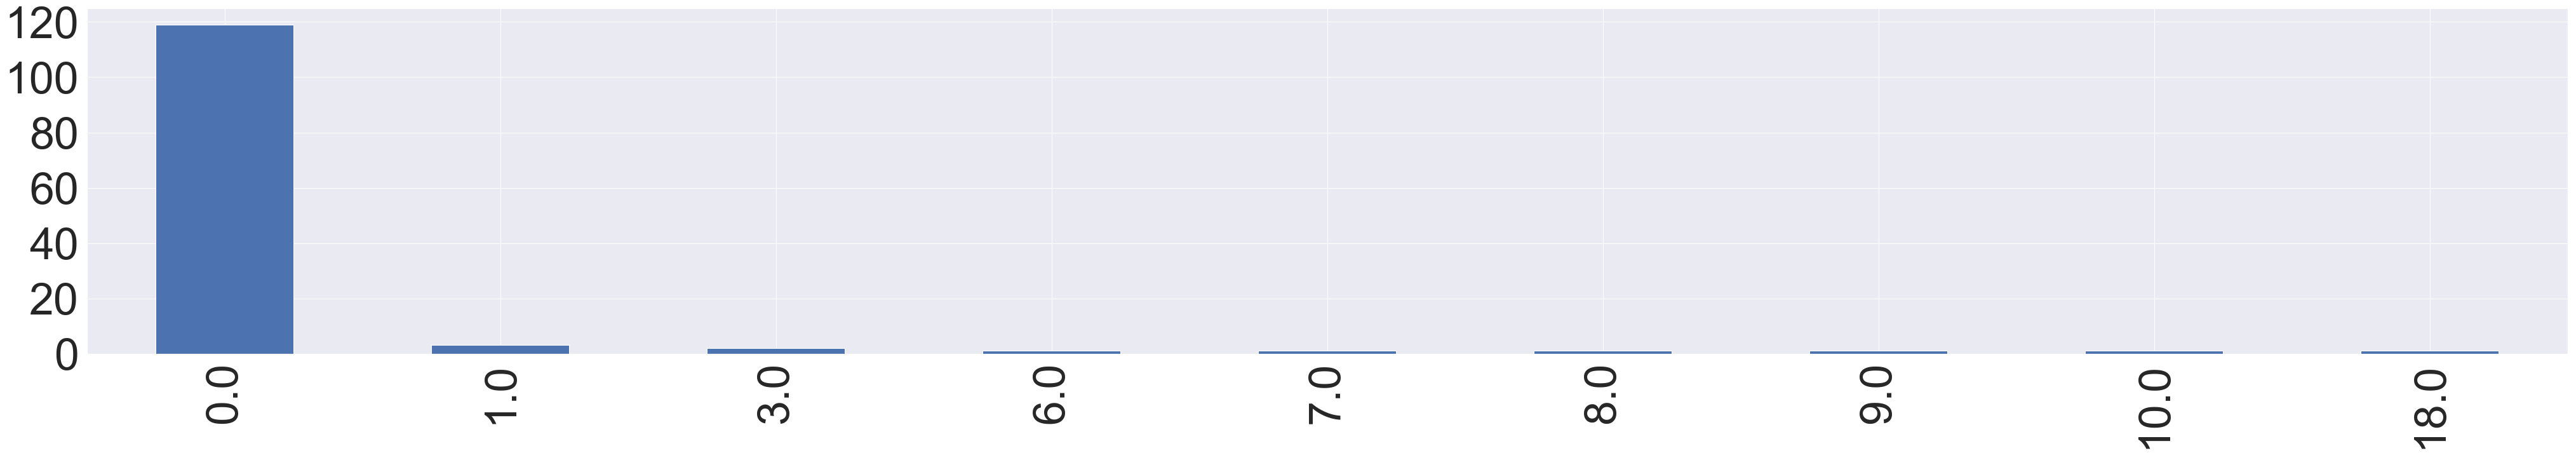

---- nc_min ---


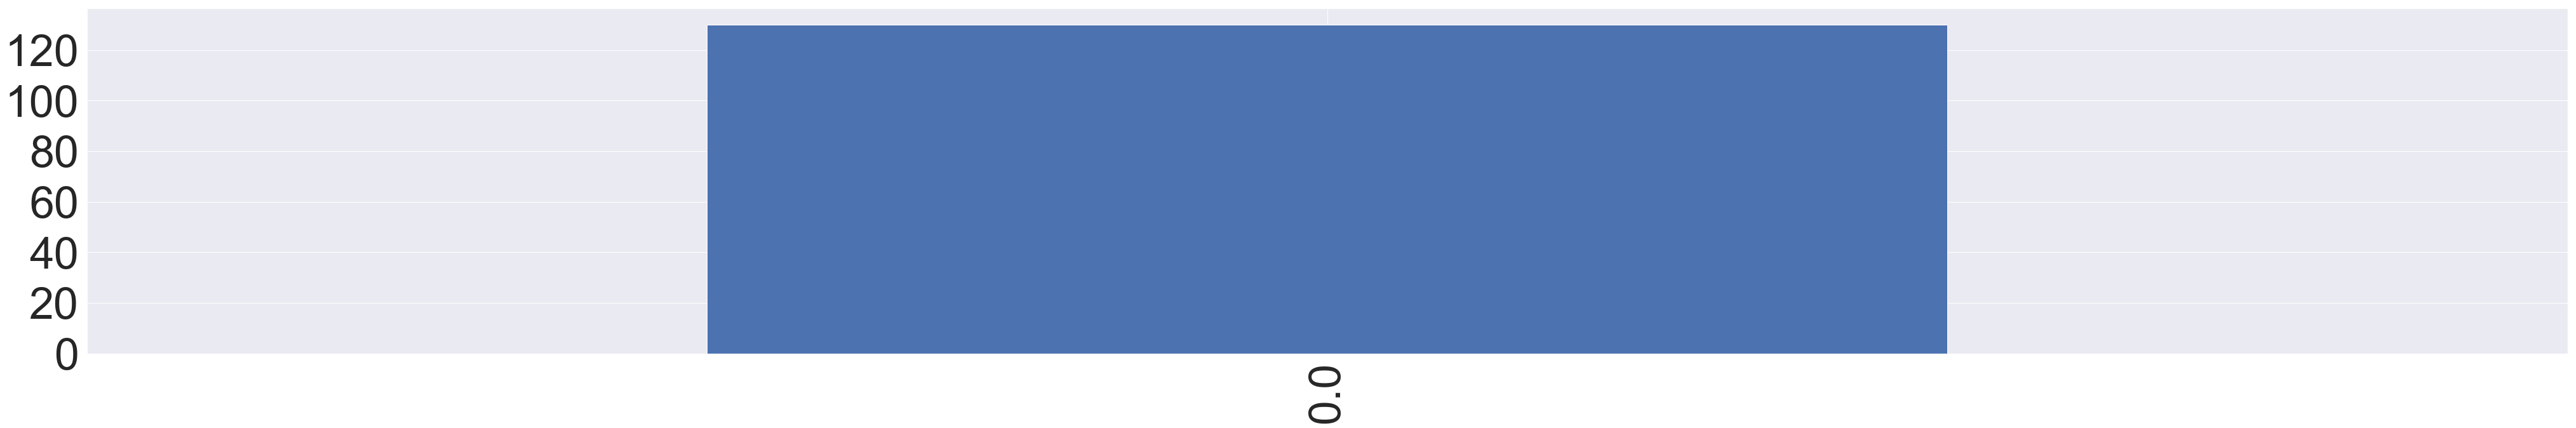

---- nc_max ---


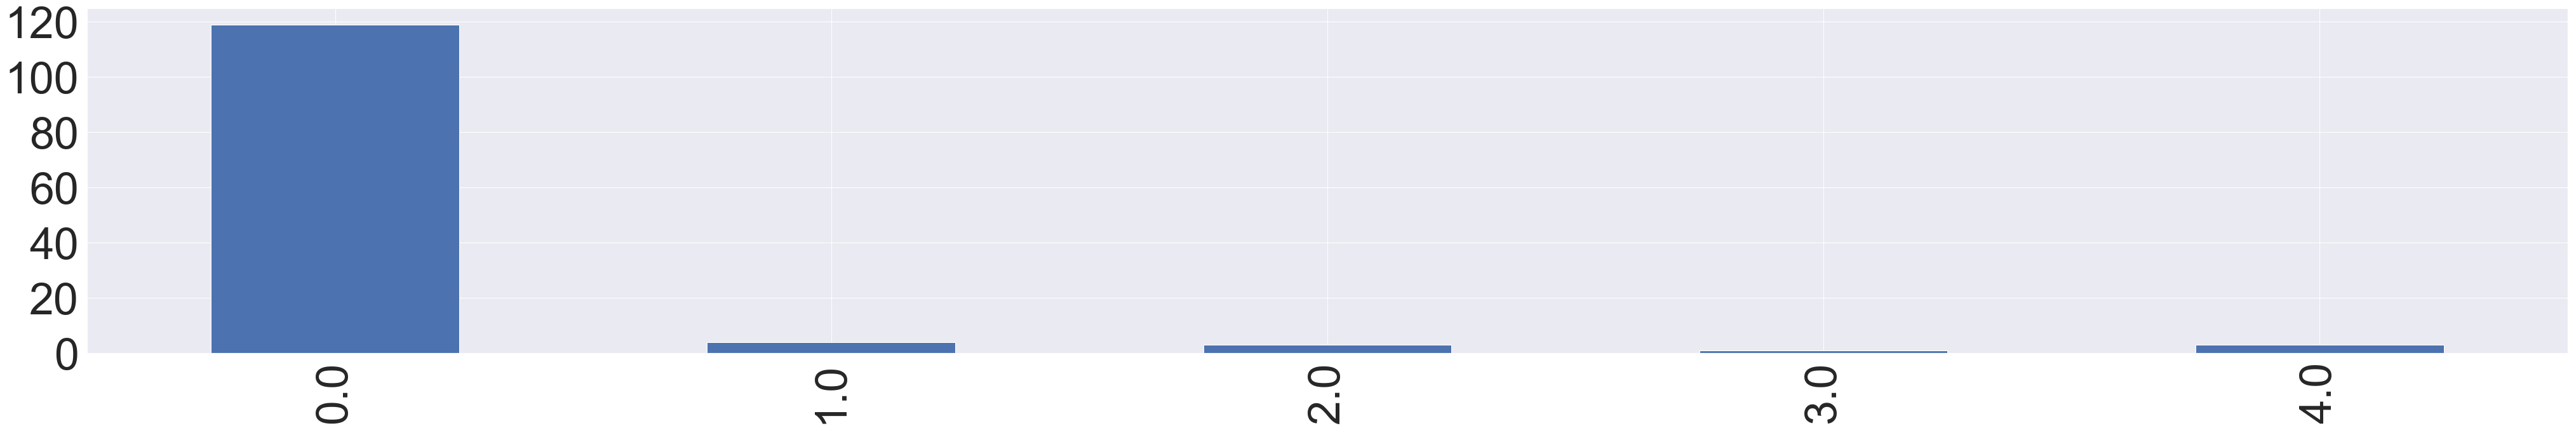

---- nc_median ---


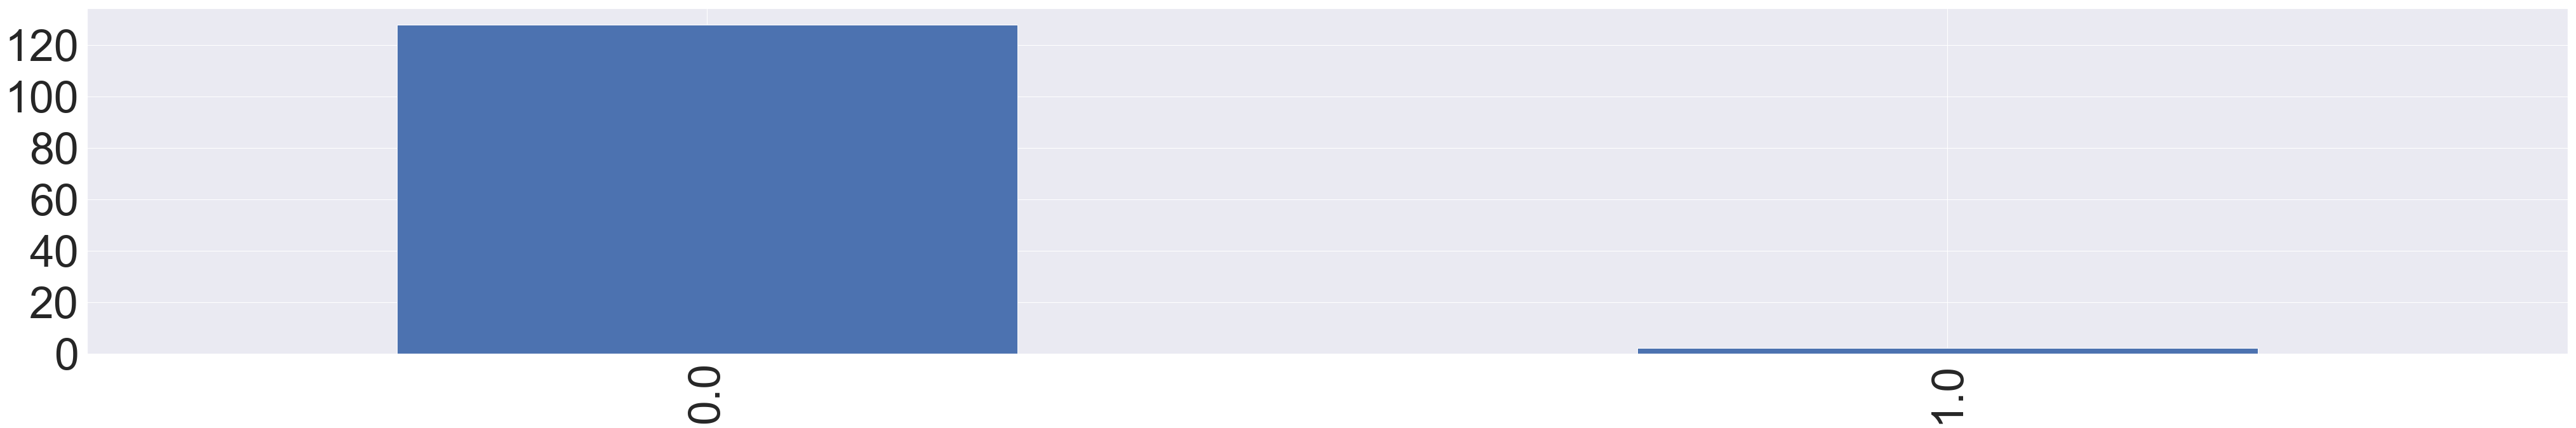

---- nc_mean ---


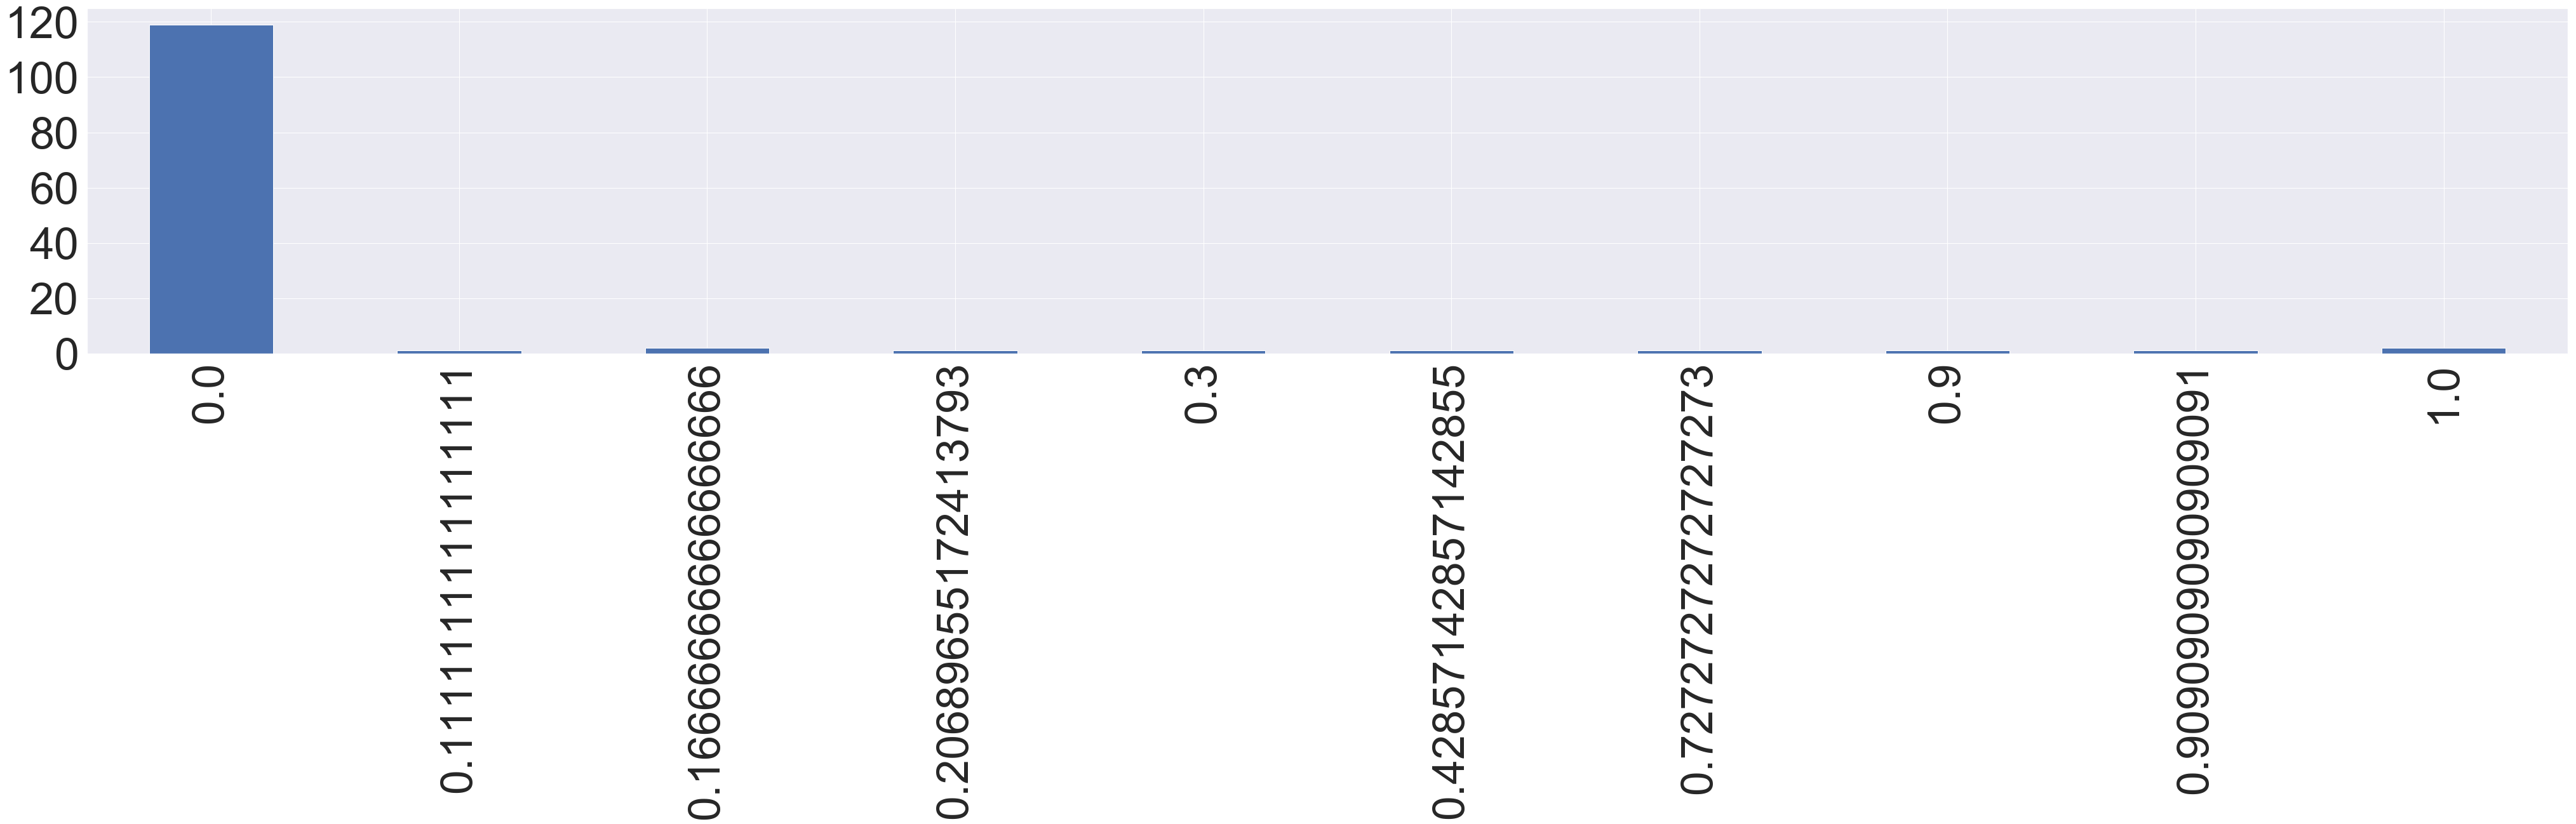

---- ni_count ---


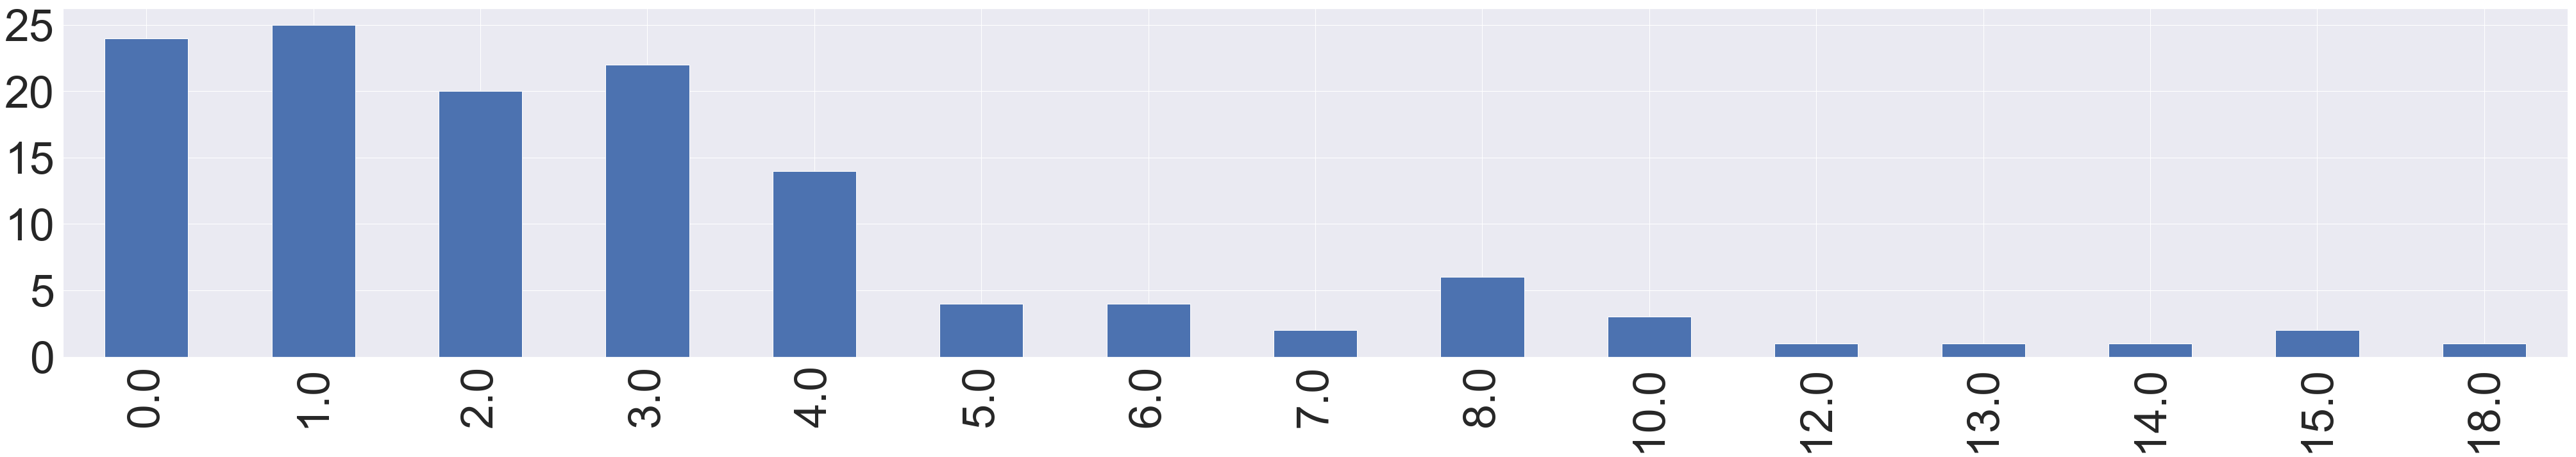

---- nif_count ---


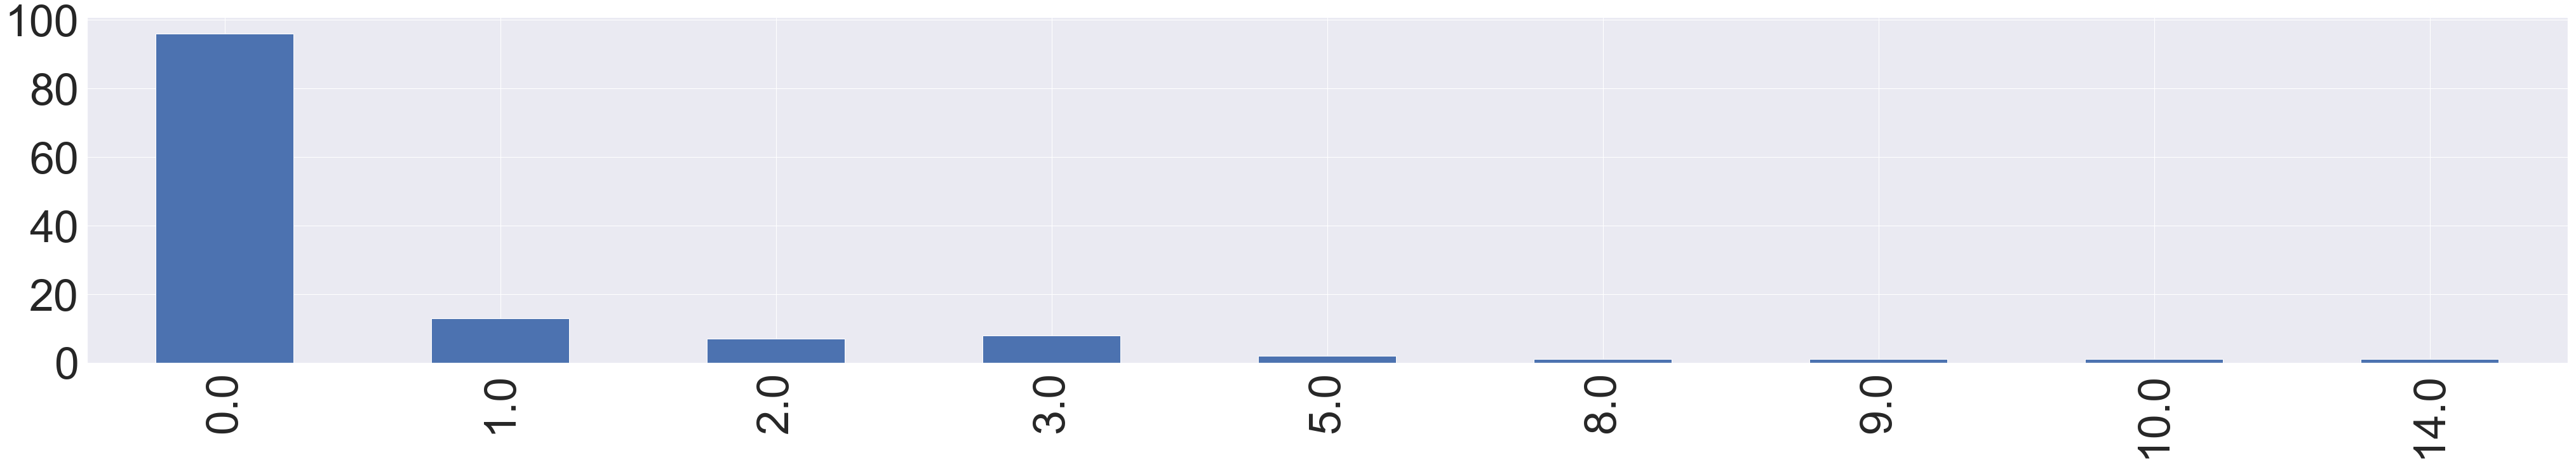

---- ninp_count ---


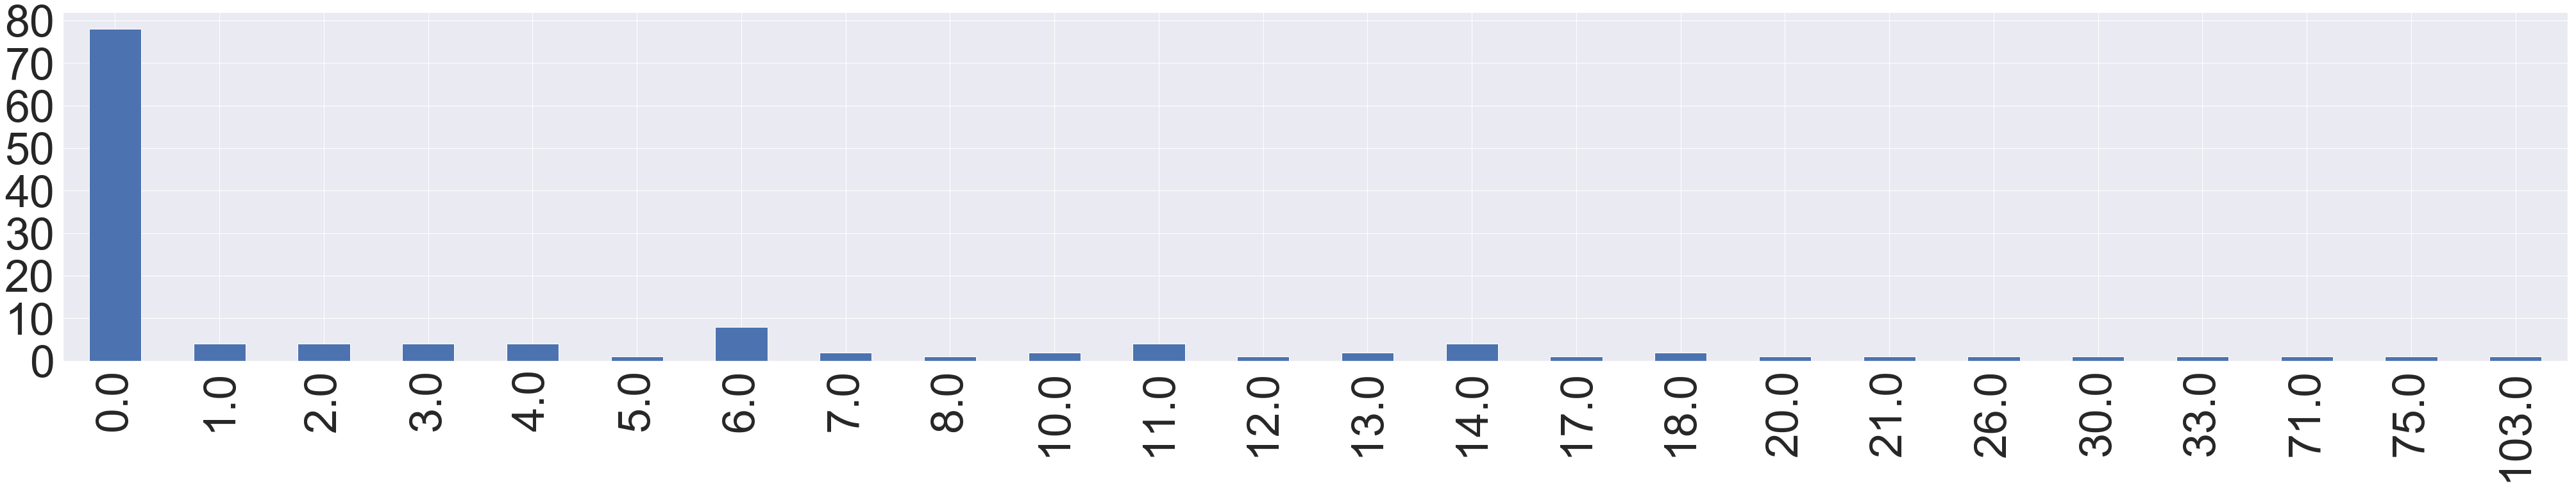

---- ninpc_count ---


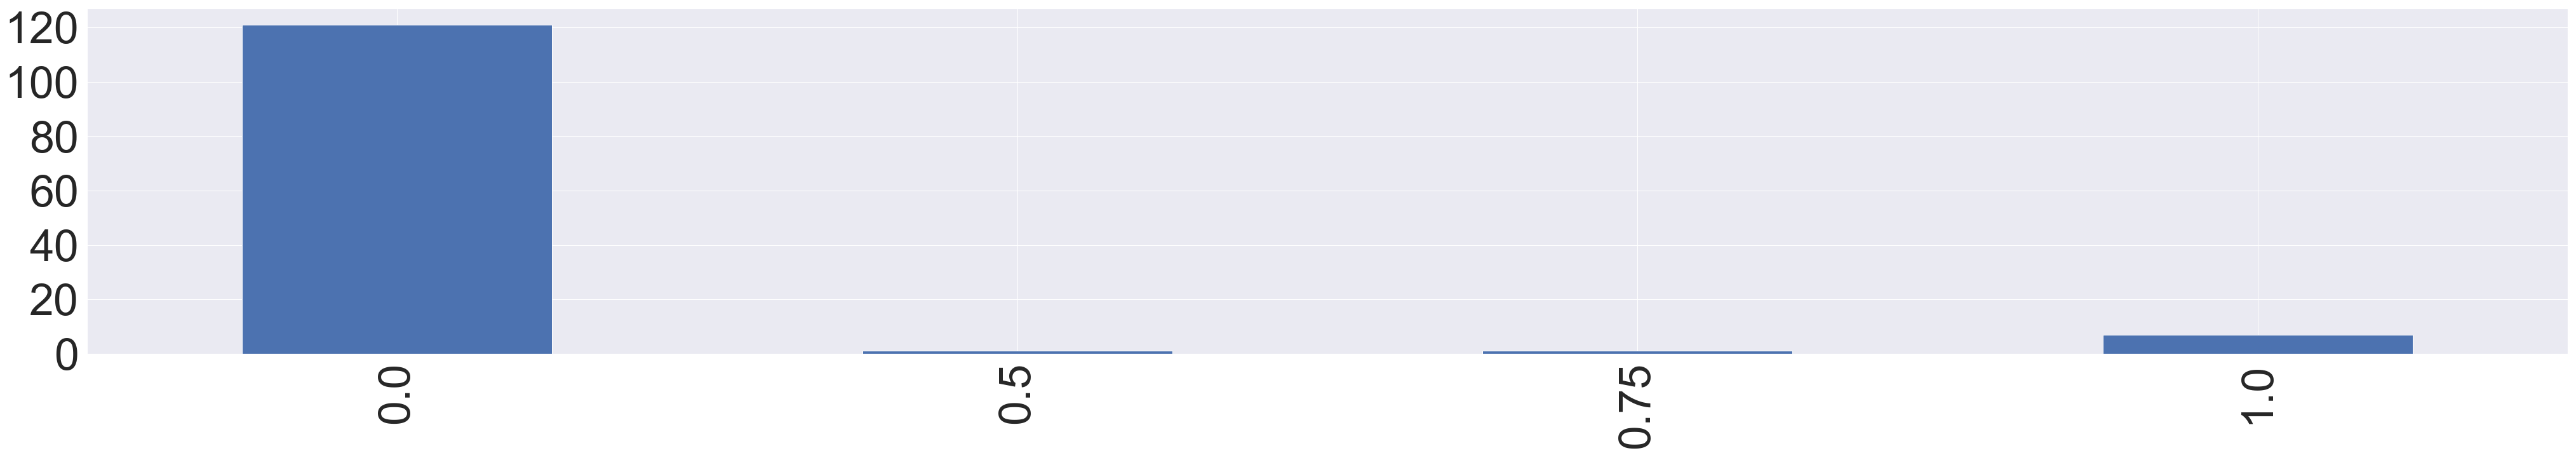

---- nn_count ---


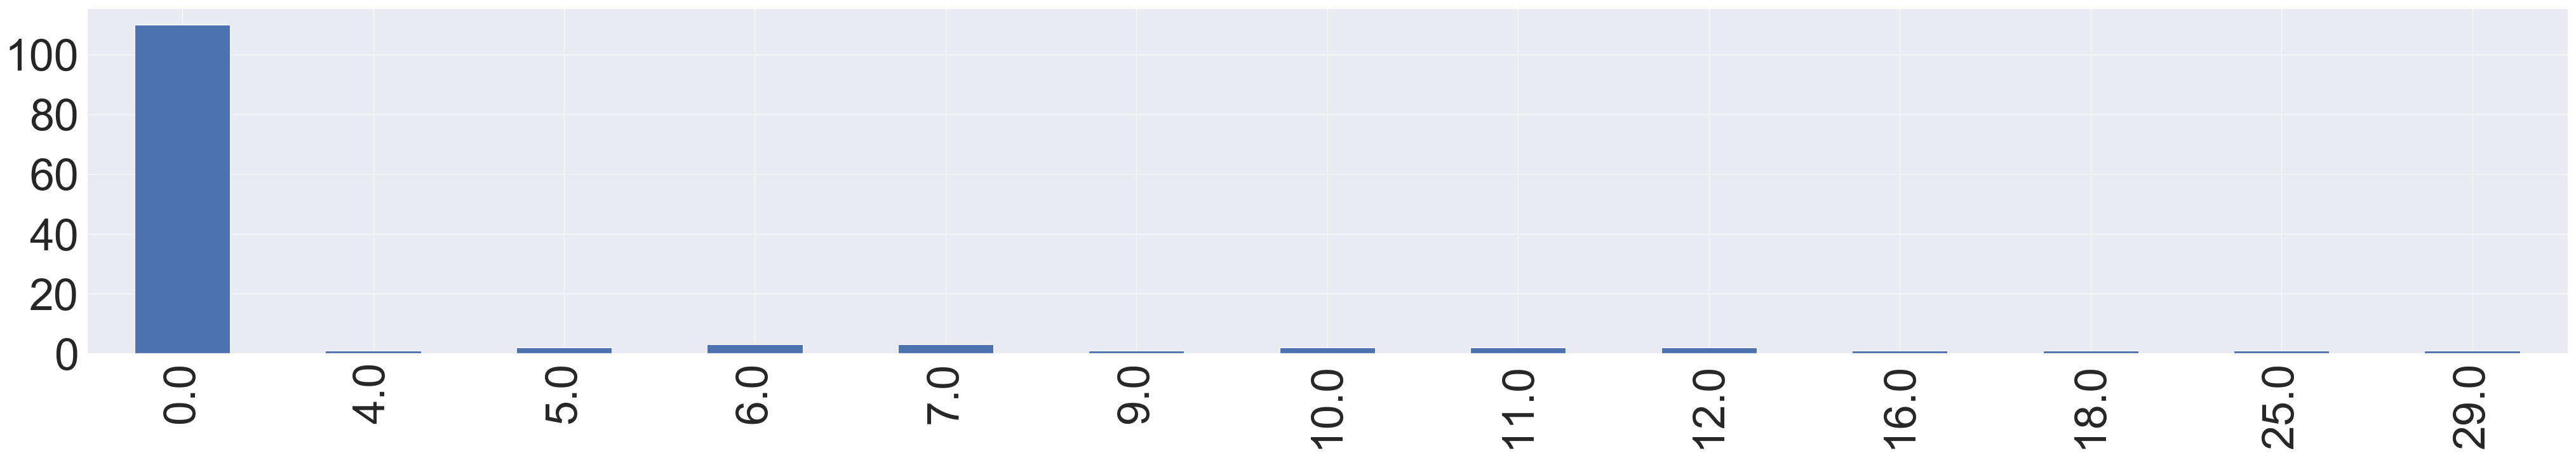

---- nnt_count ---


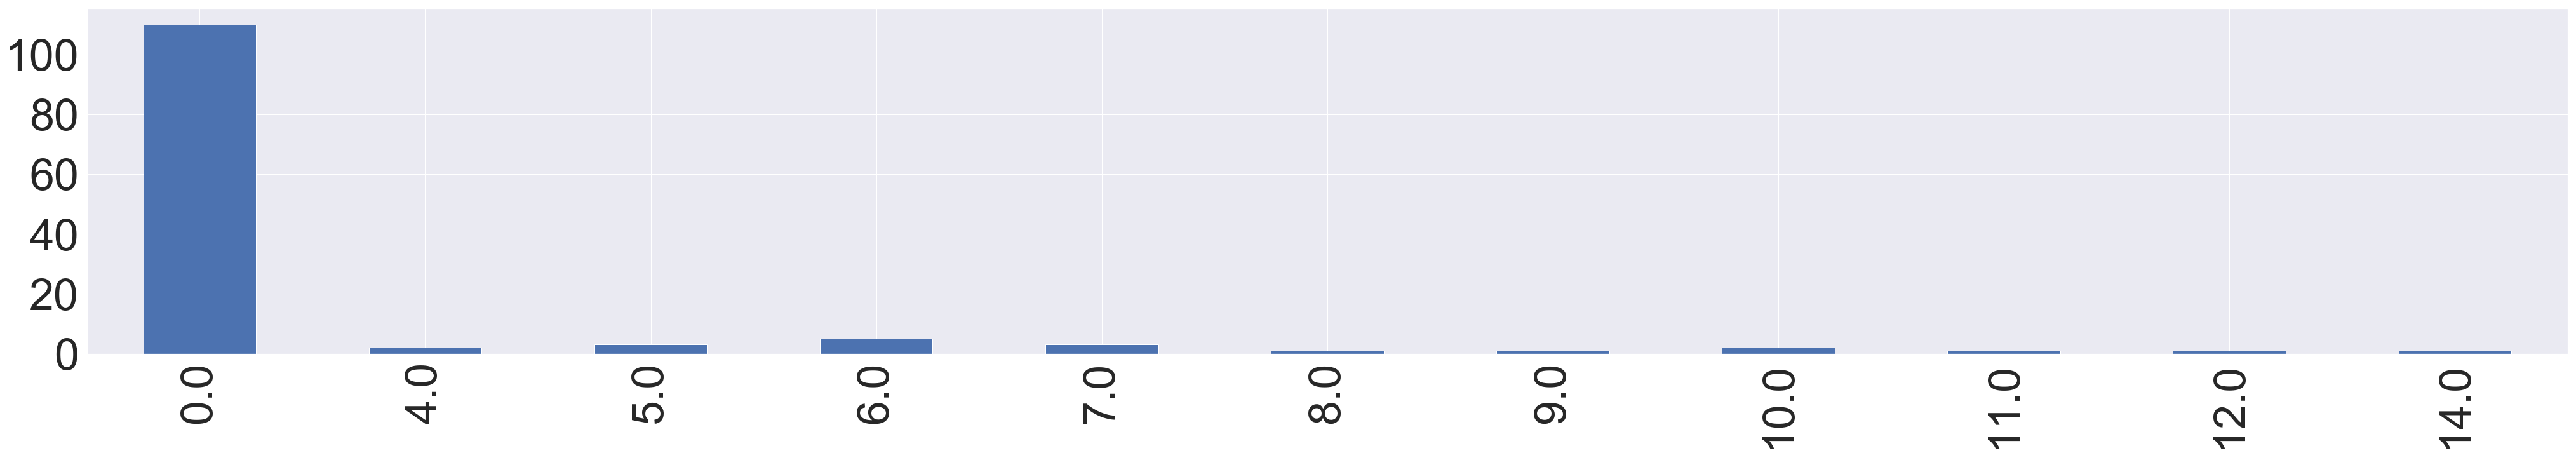

---- nout_count ---


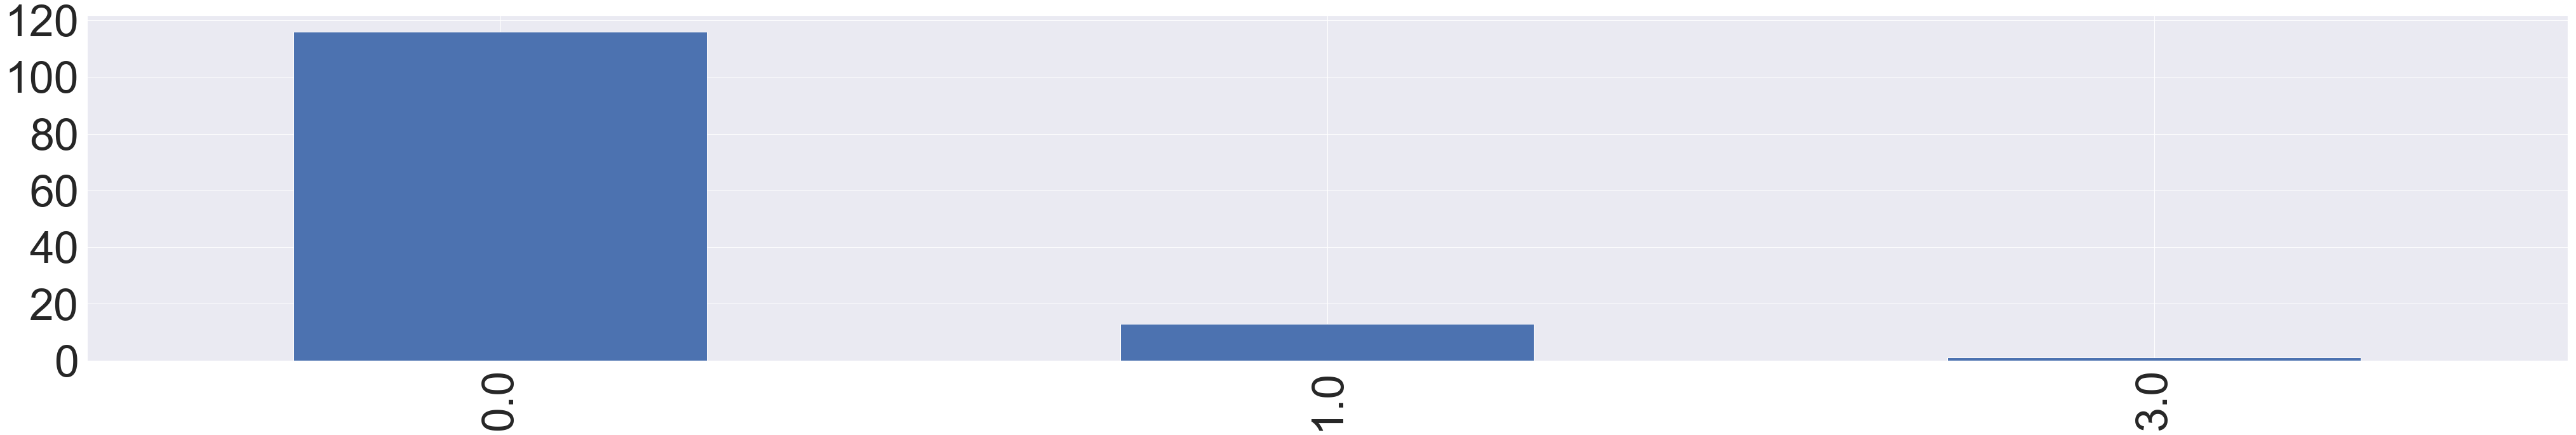

---- np_count ---


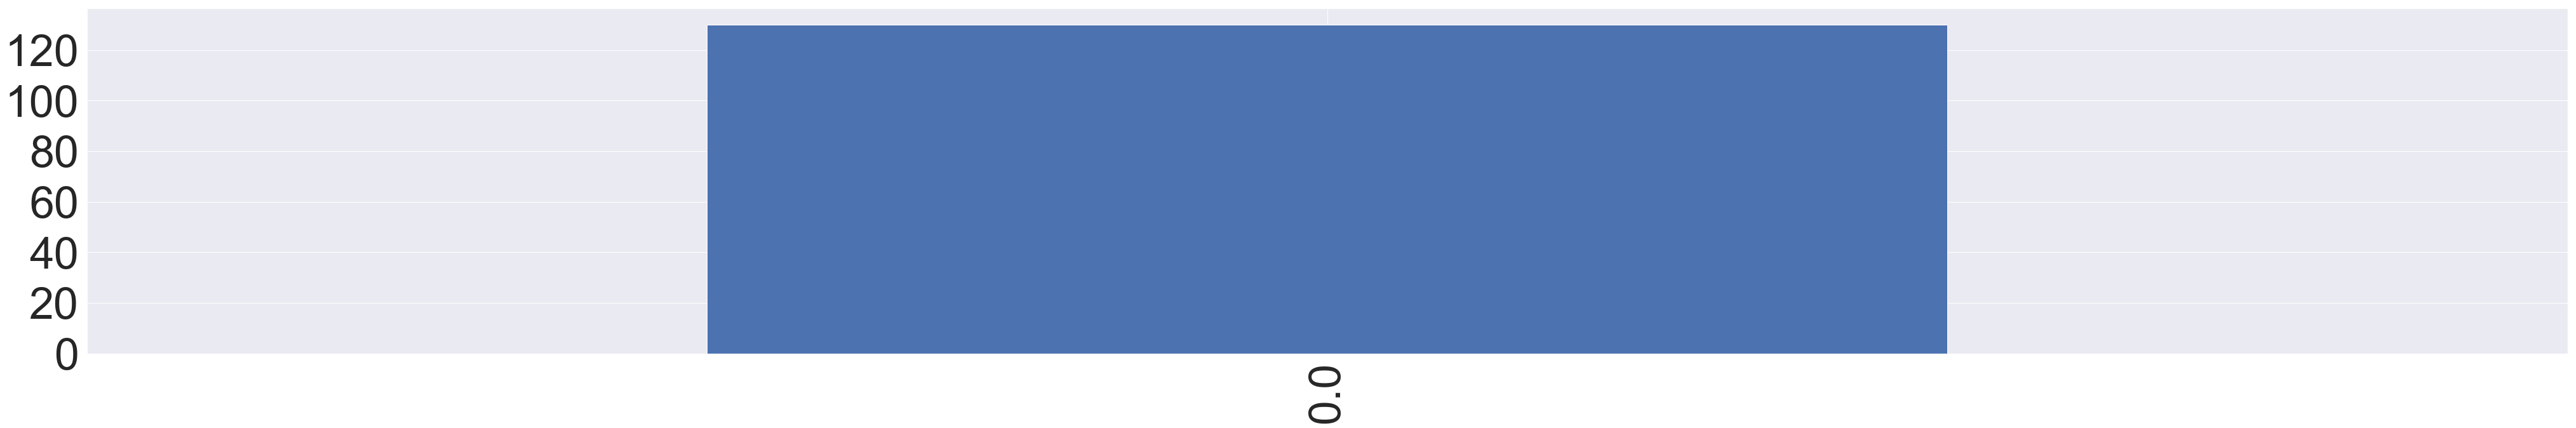

---- np_min ---


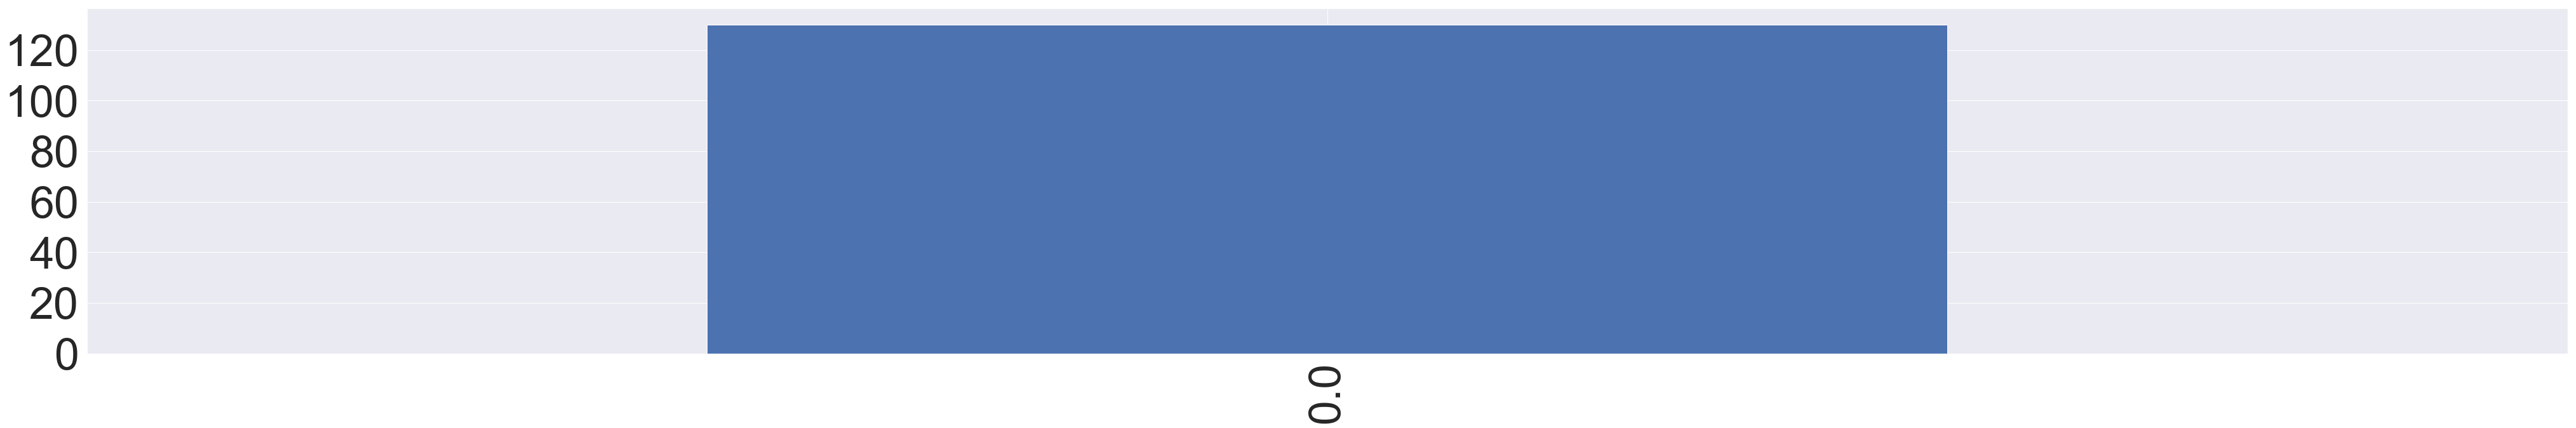

---- np_max ---


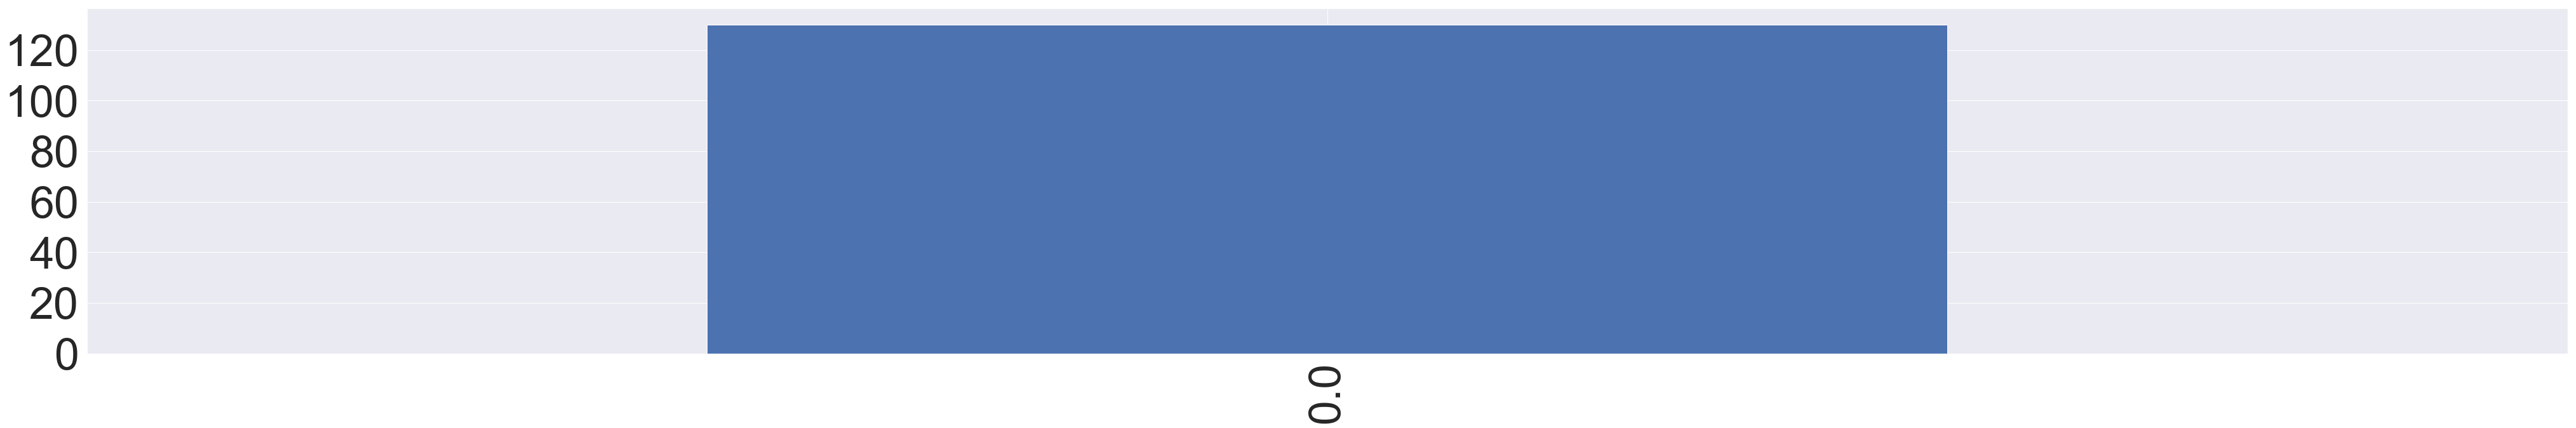

---- np_median ---


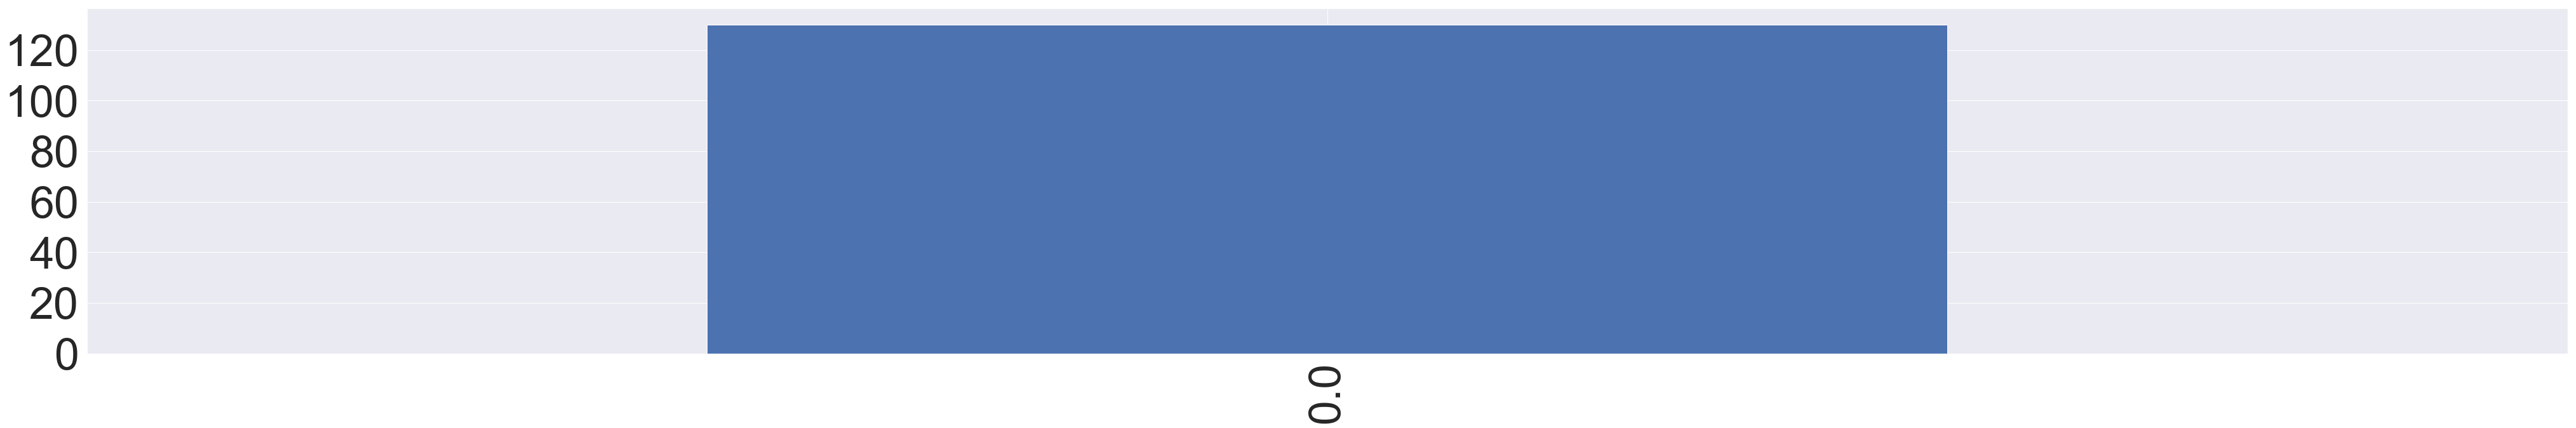

---- np_mean ---


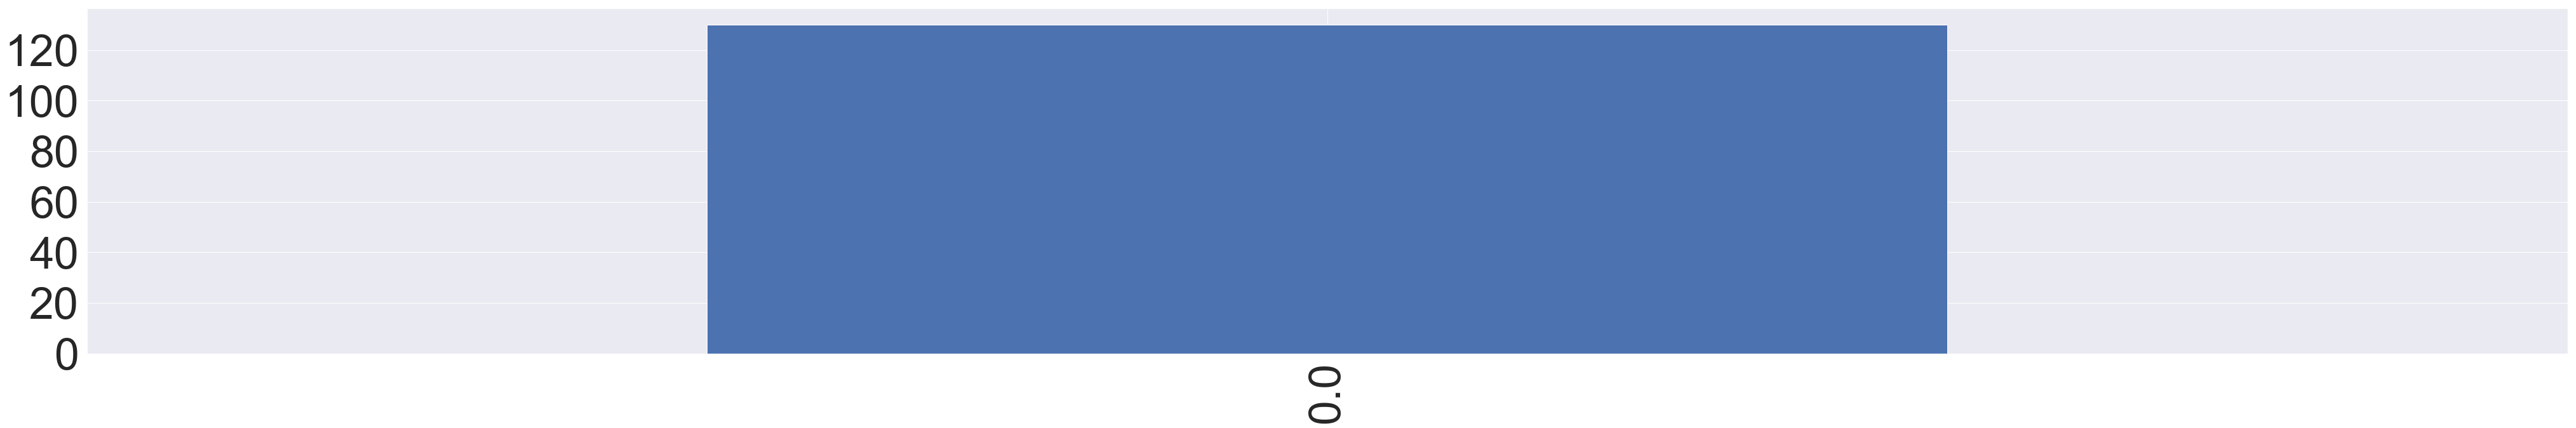

---- nr_count ---


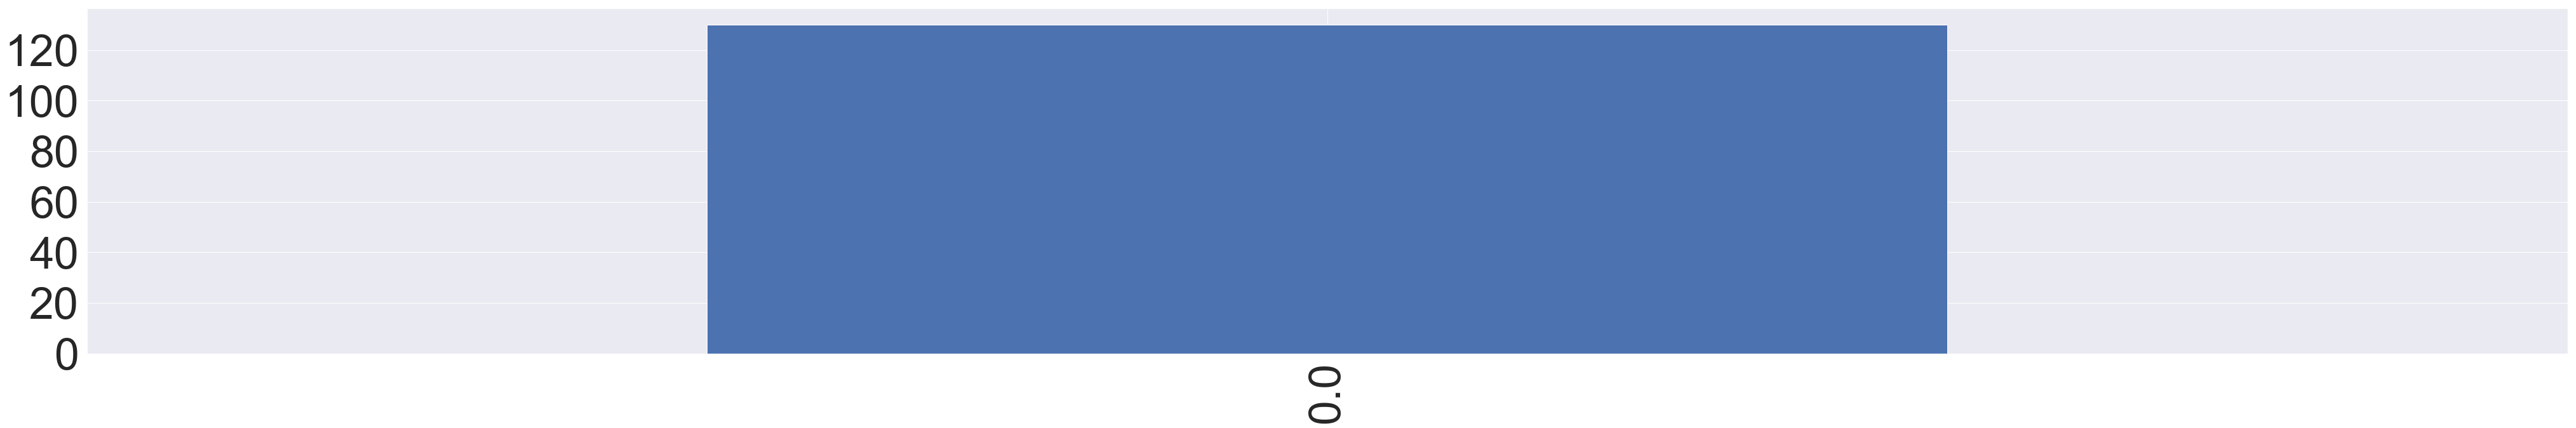

---- nrt_count ---


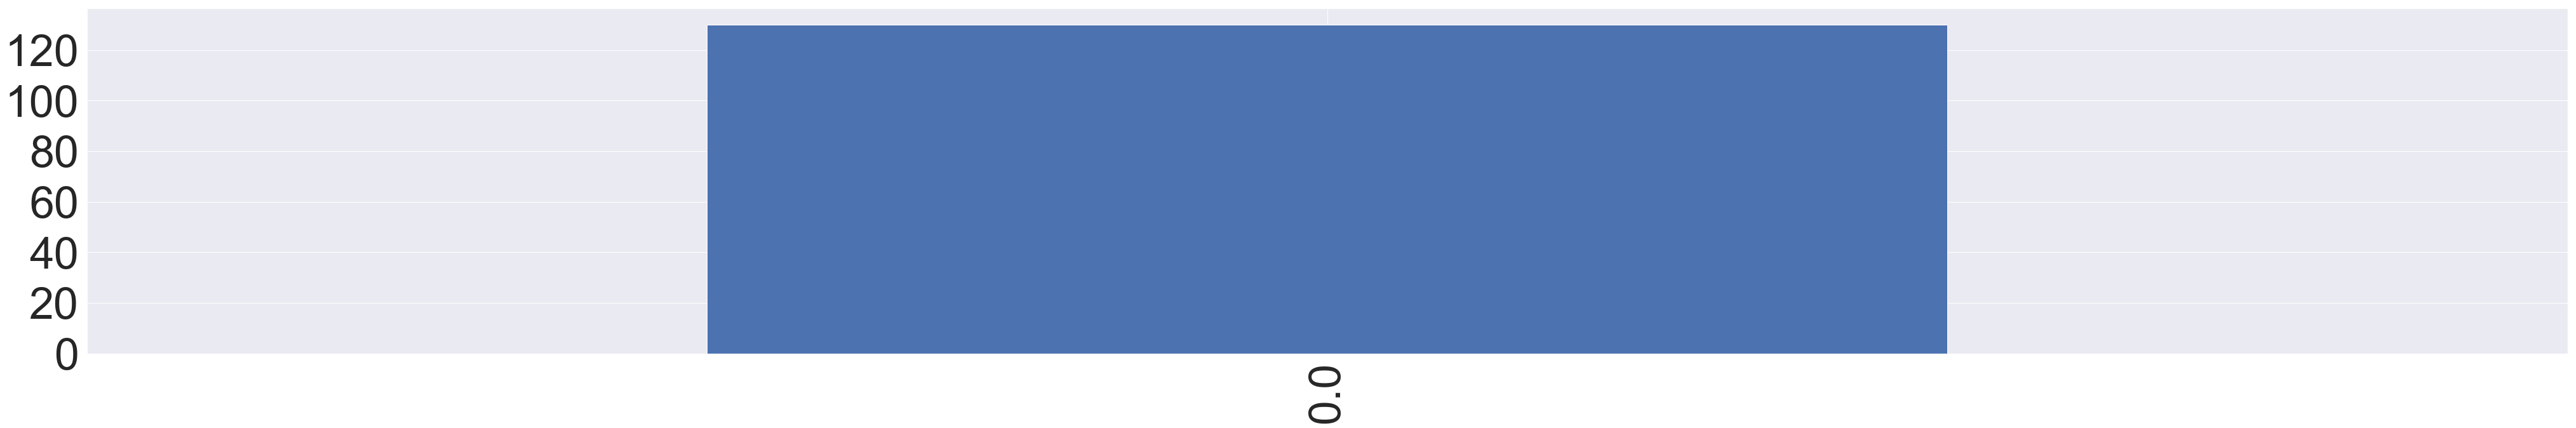

---- ttb_check ---


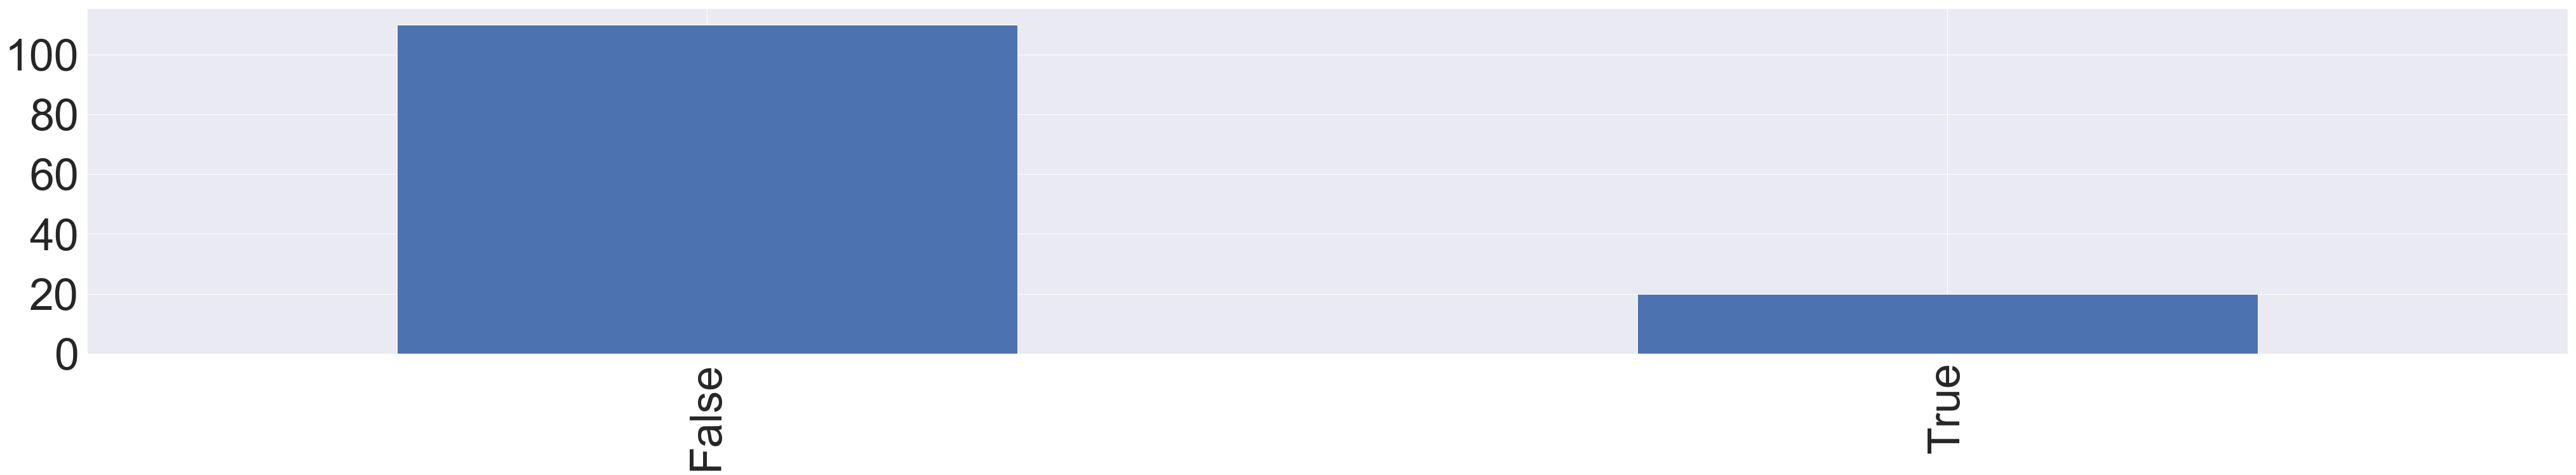

---- cdnt_count ---


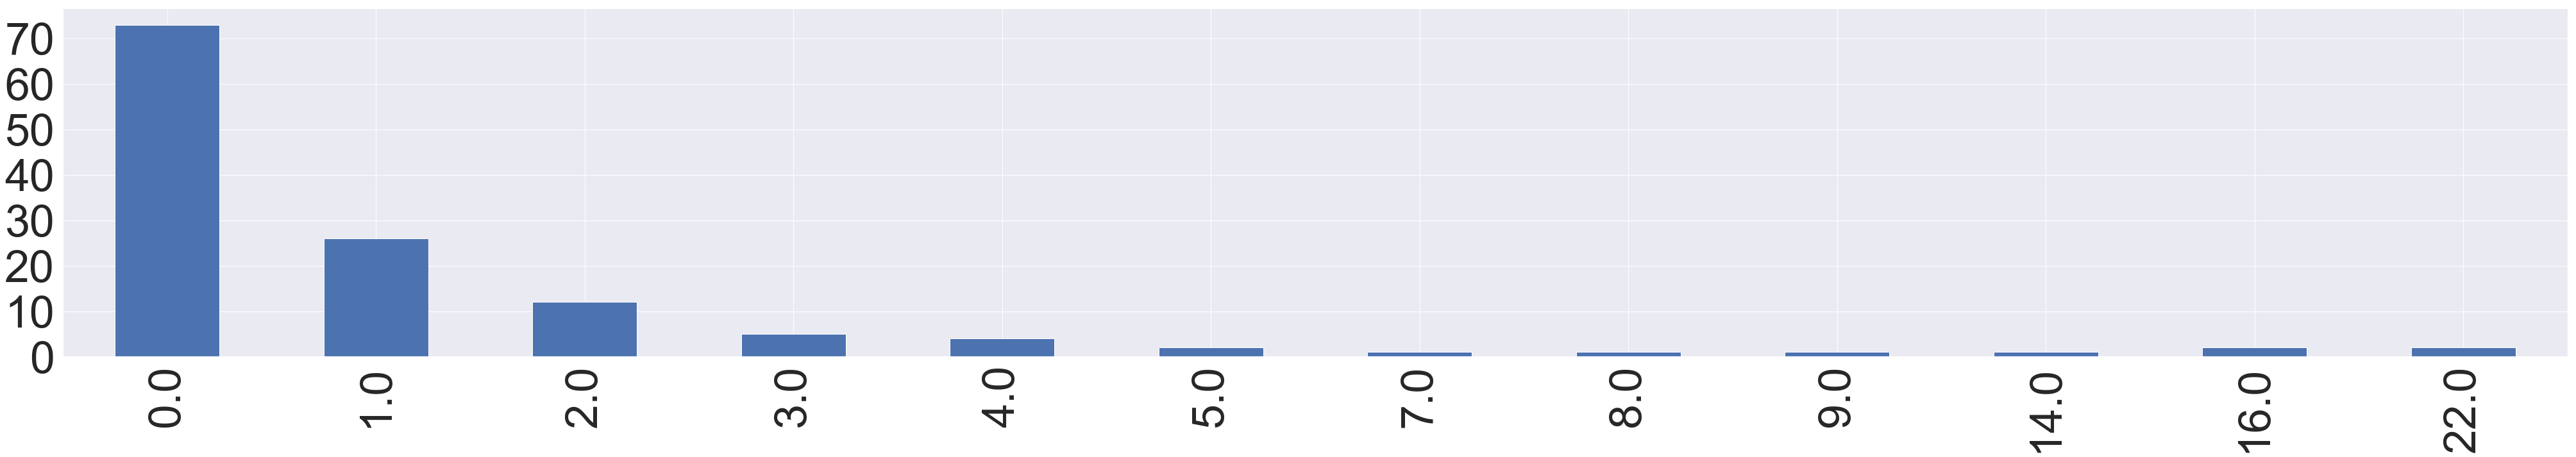

---- cdrt_count ---


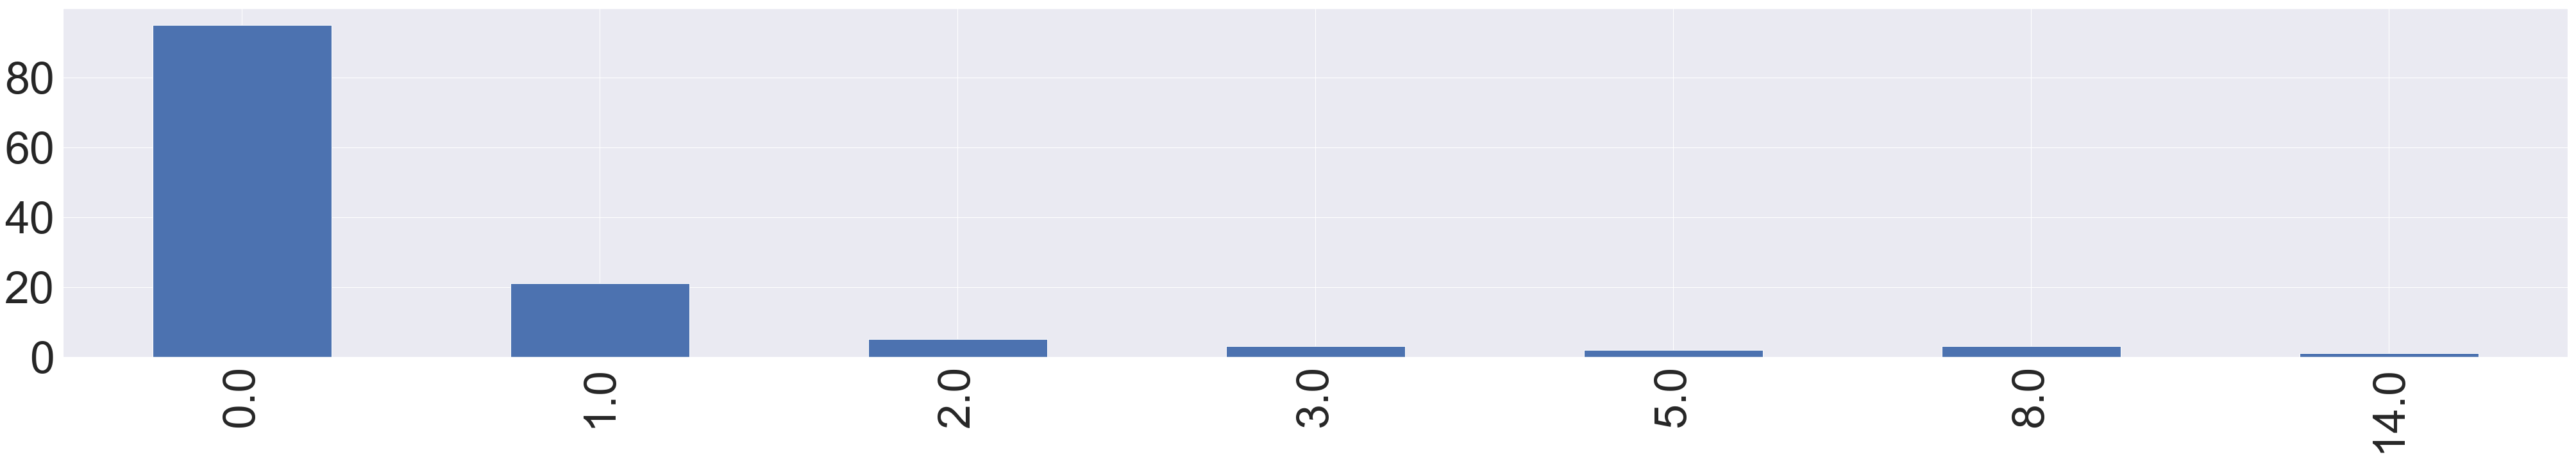

---- cdat_count ---


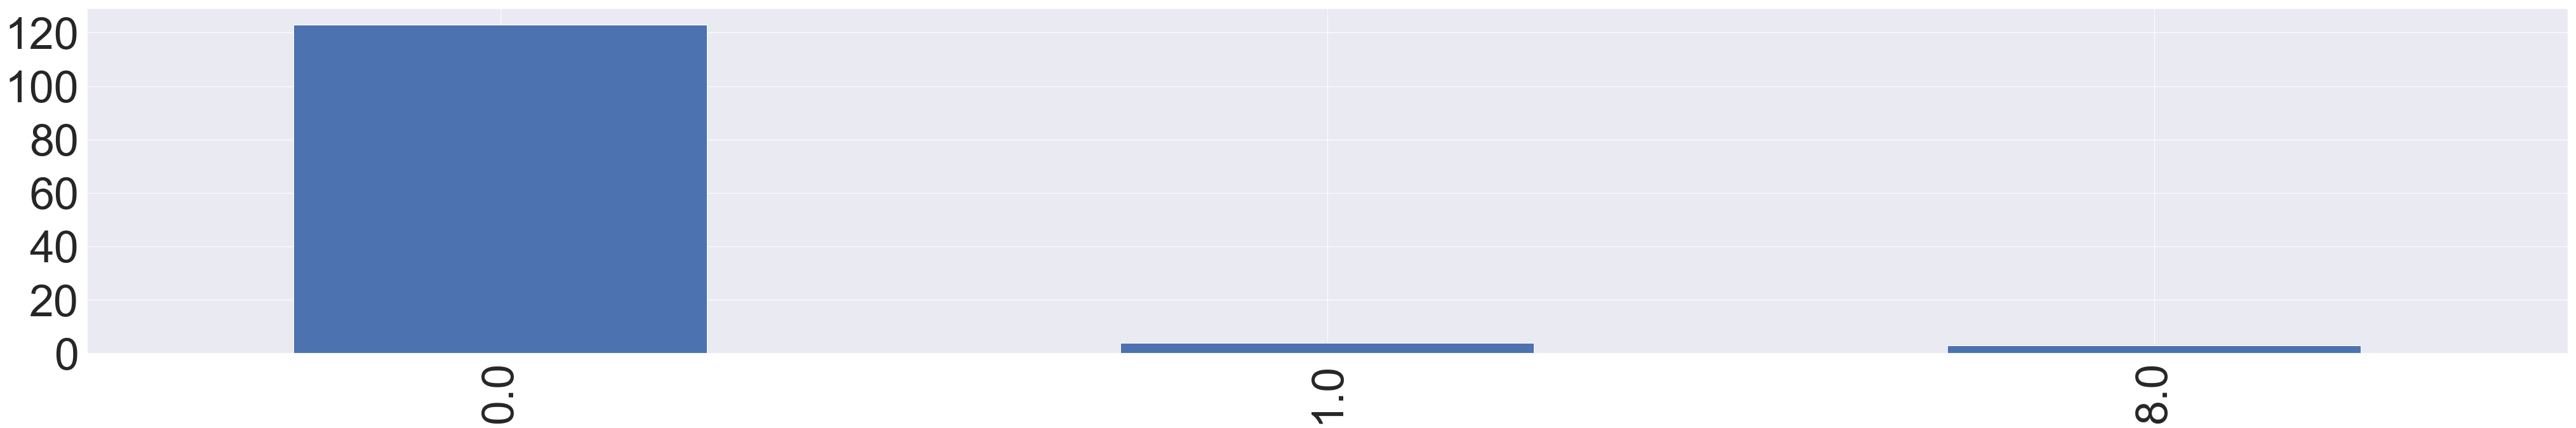

---- cdct_count ---


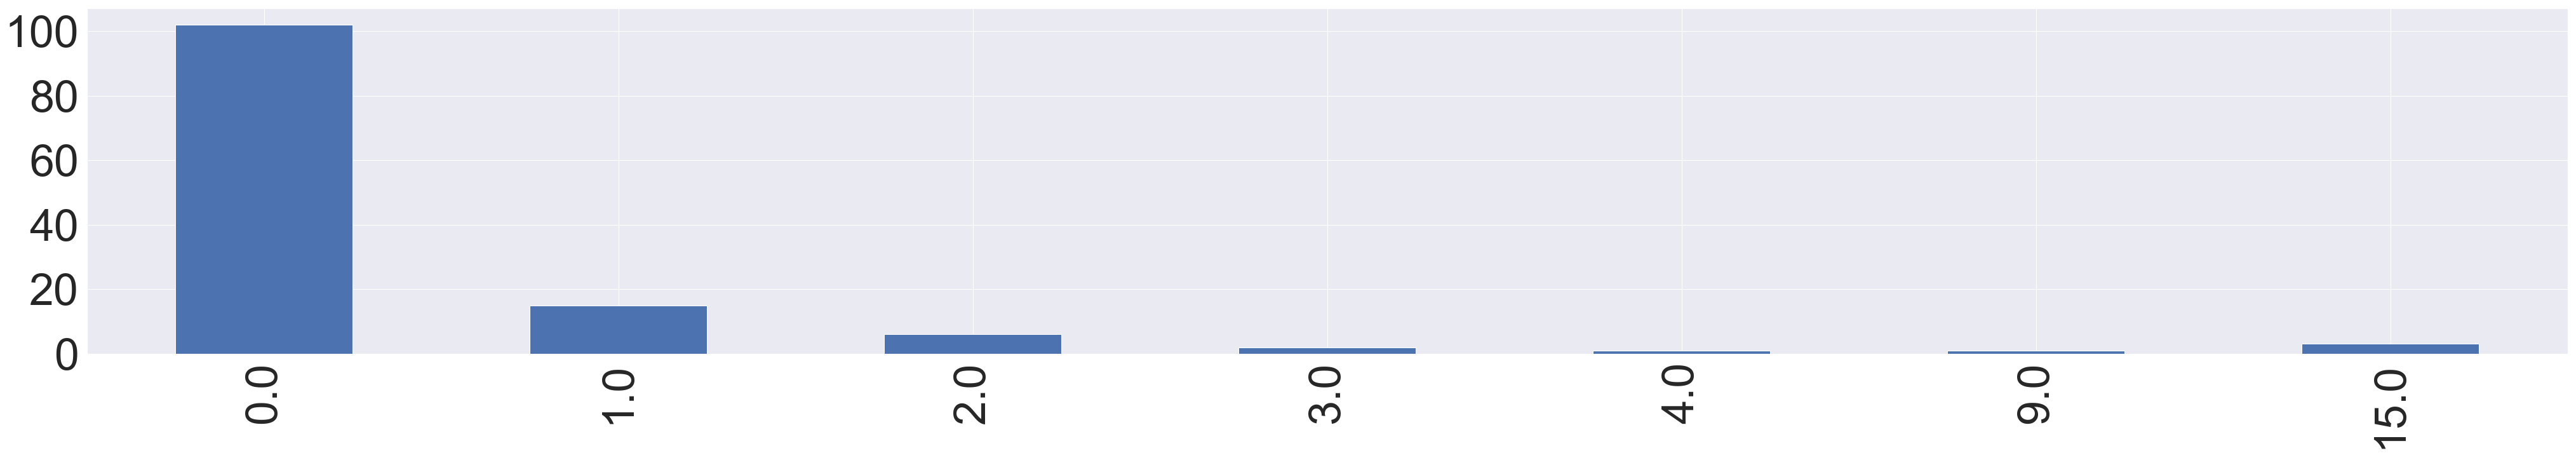

---- cddt_count ---


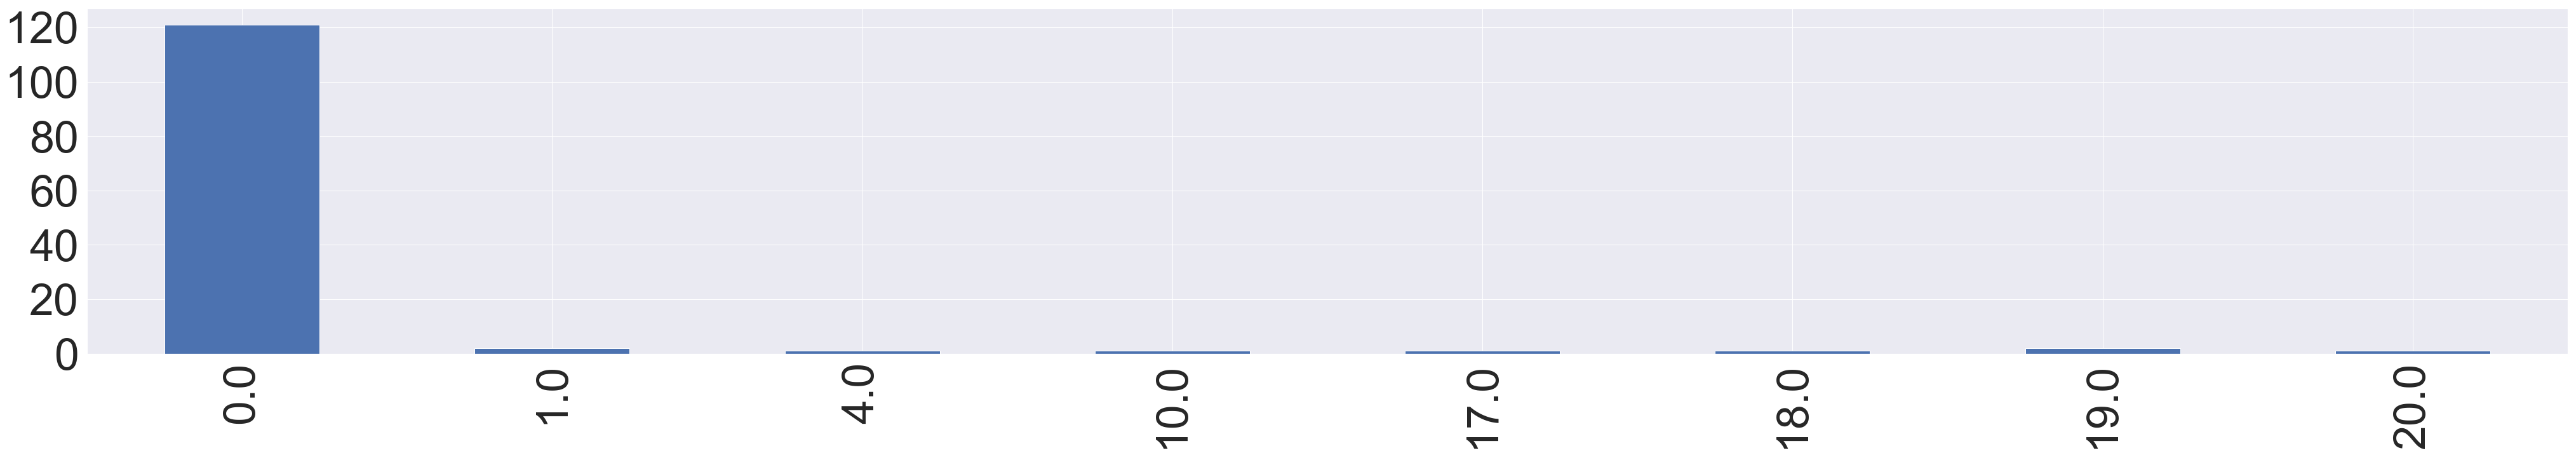

---- cdgt_count ---


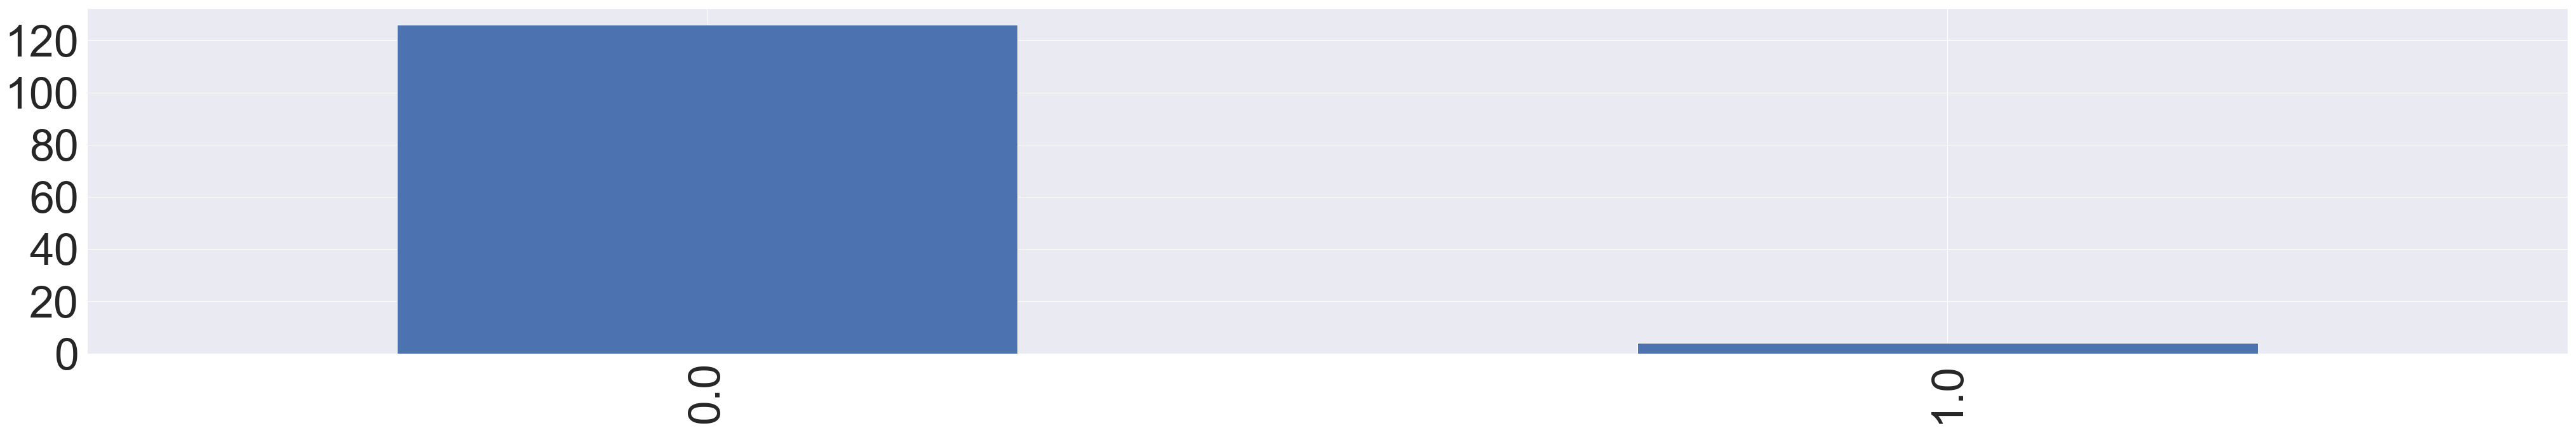

---- cdit_count ---


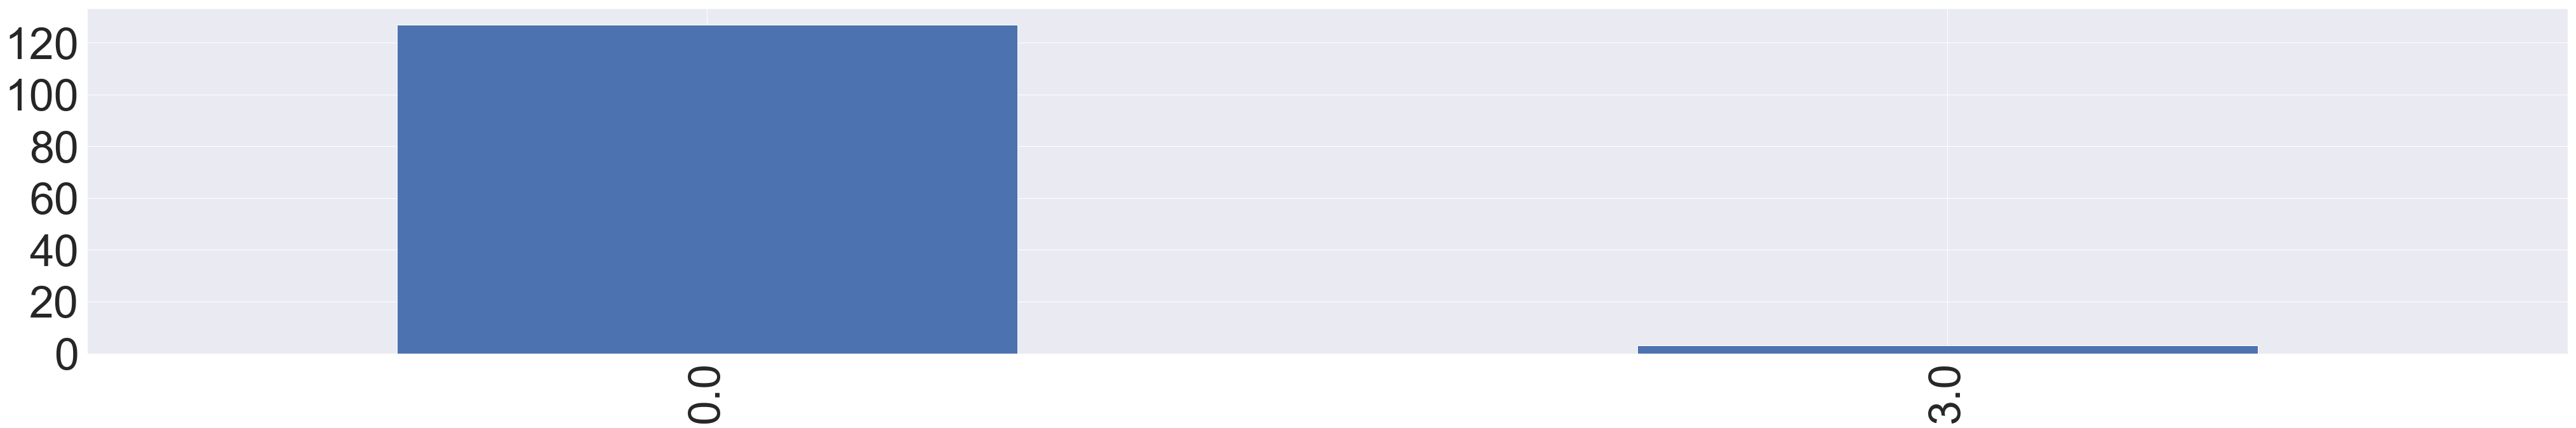

---- cdpt_count ---


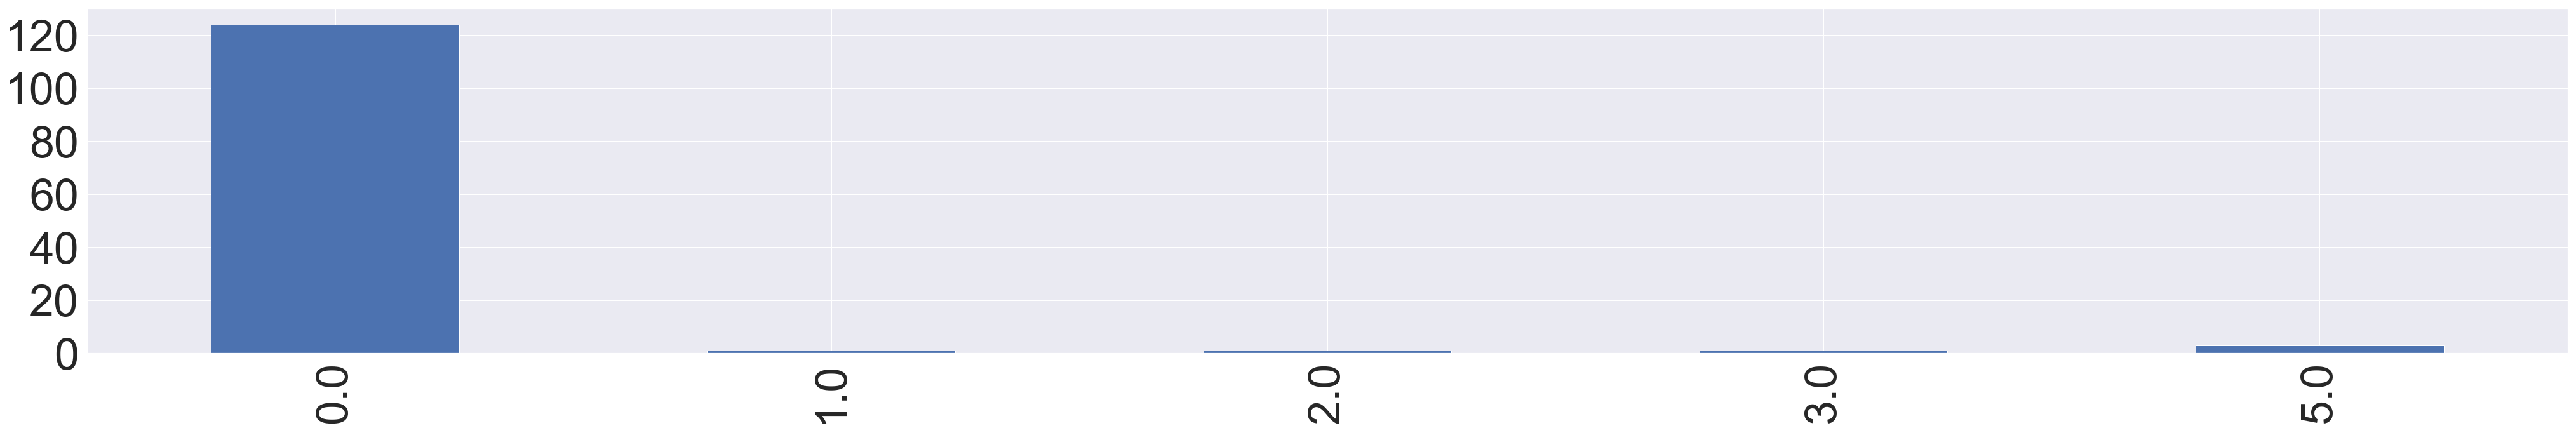

---- nw_count ---


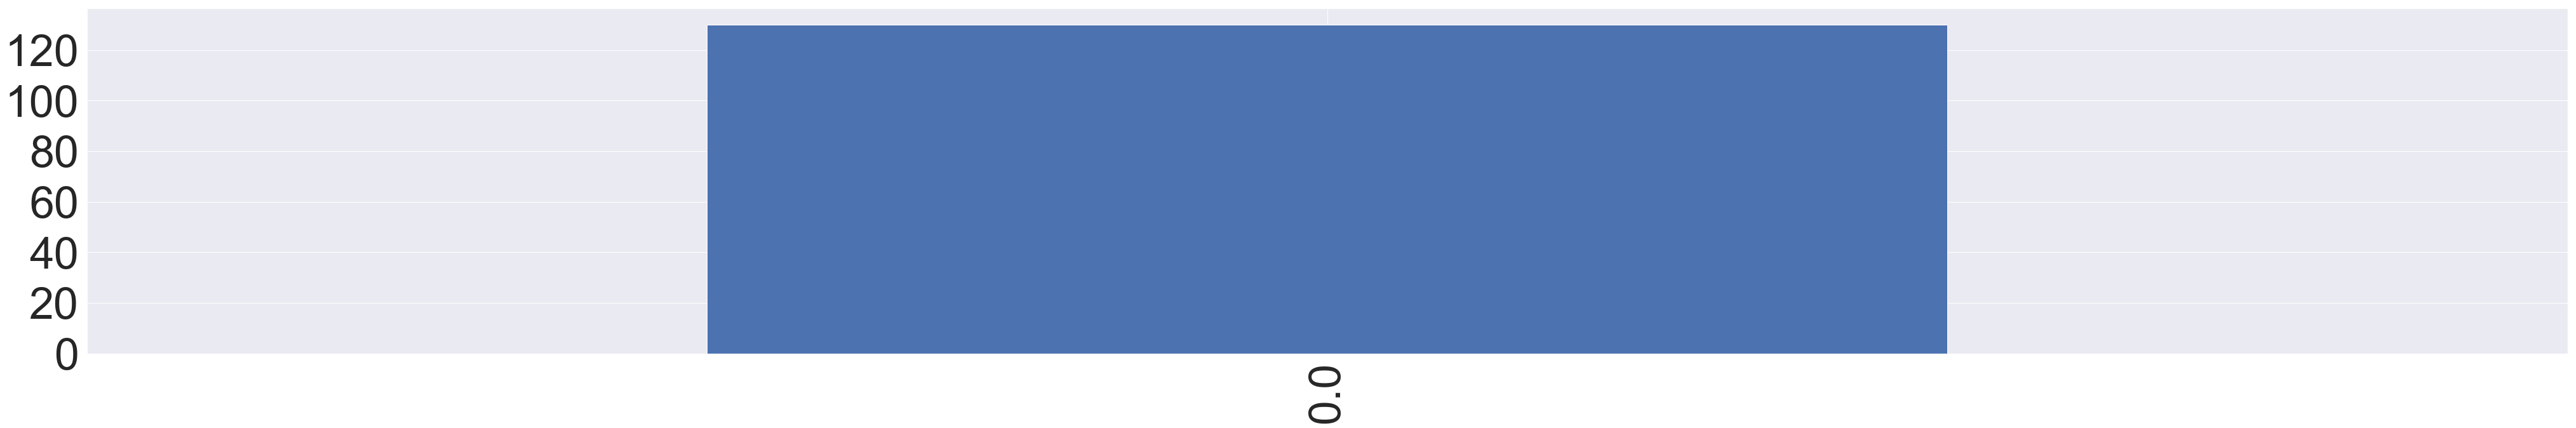

---- tdb_check ---


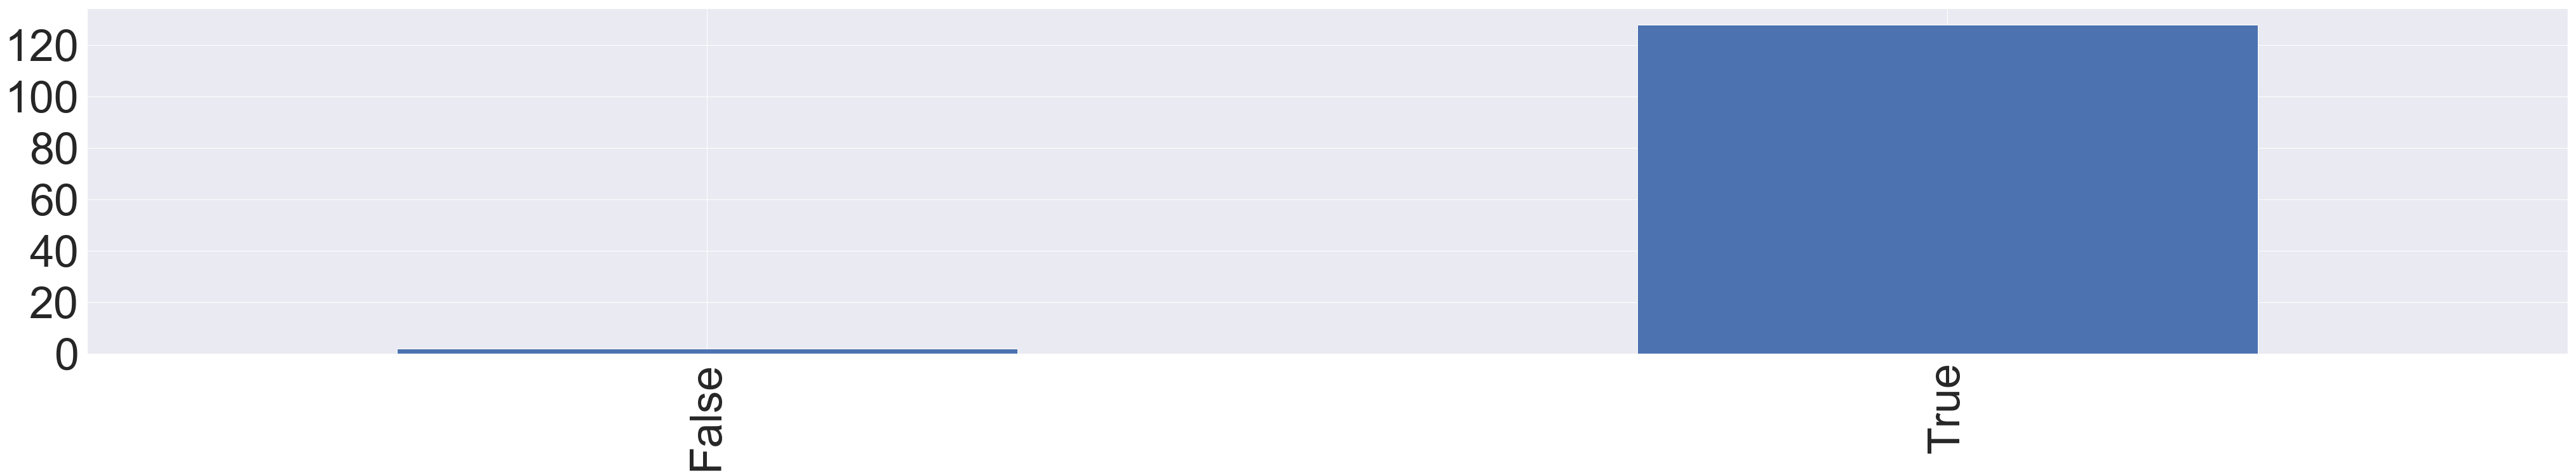

---- nrq_count ---


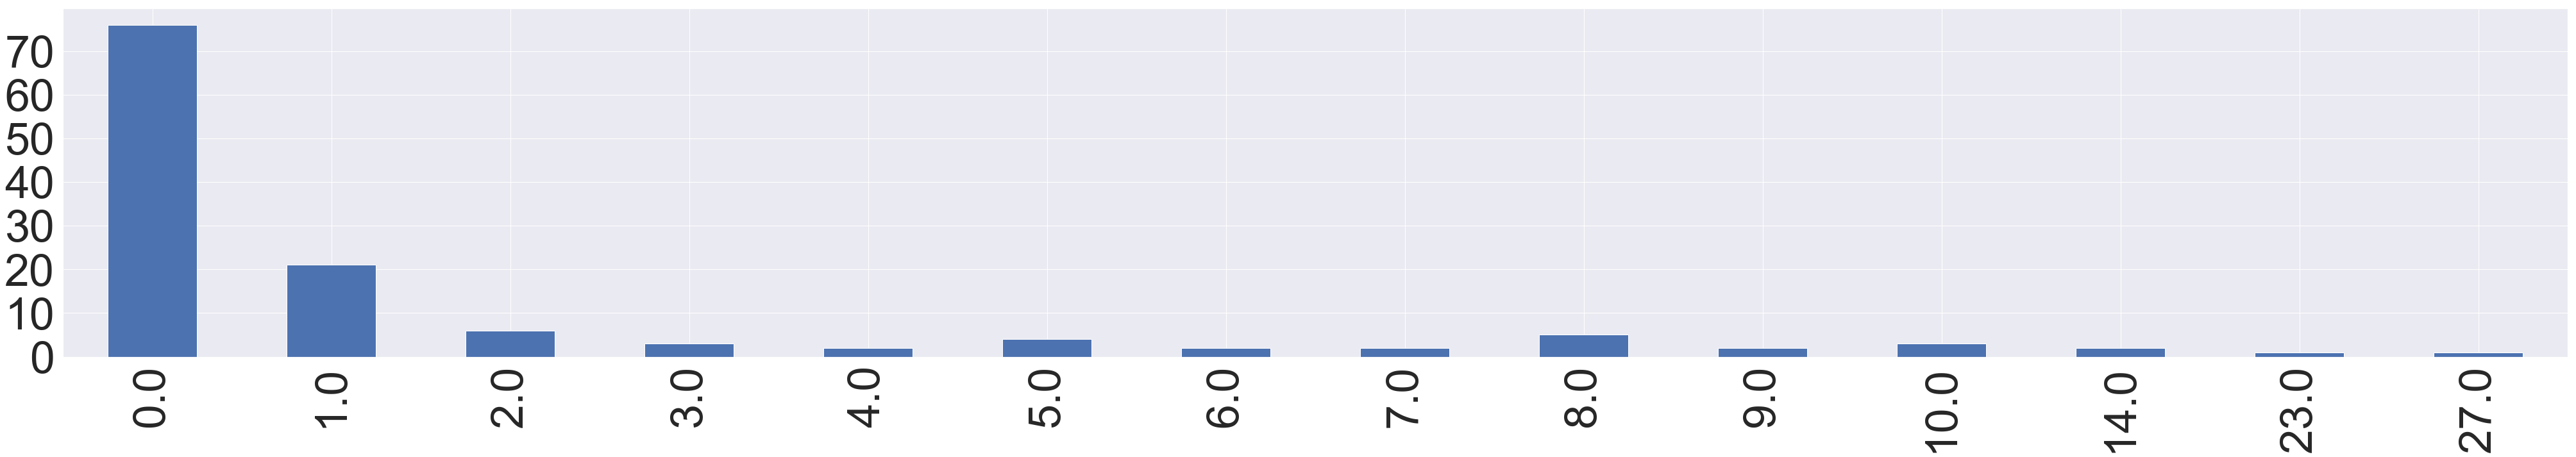

---- nsh_count ---


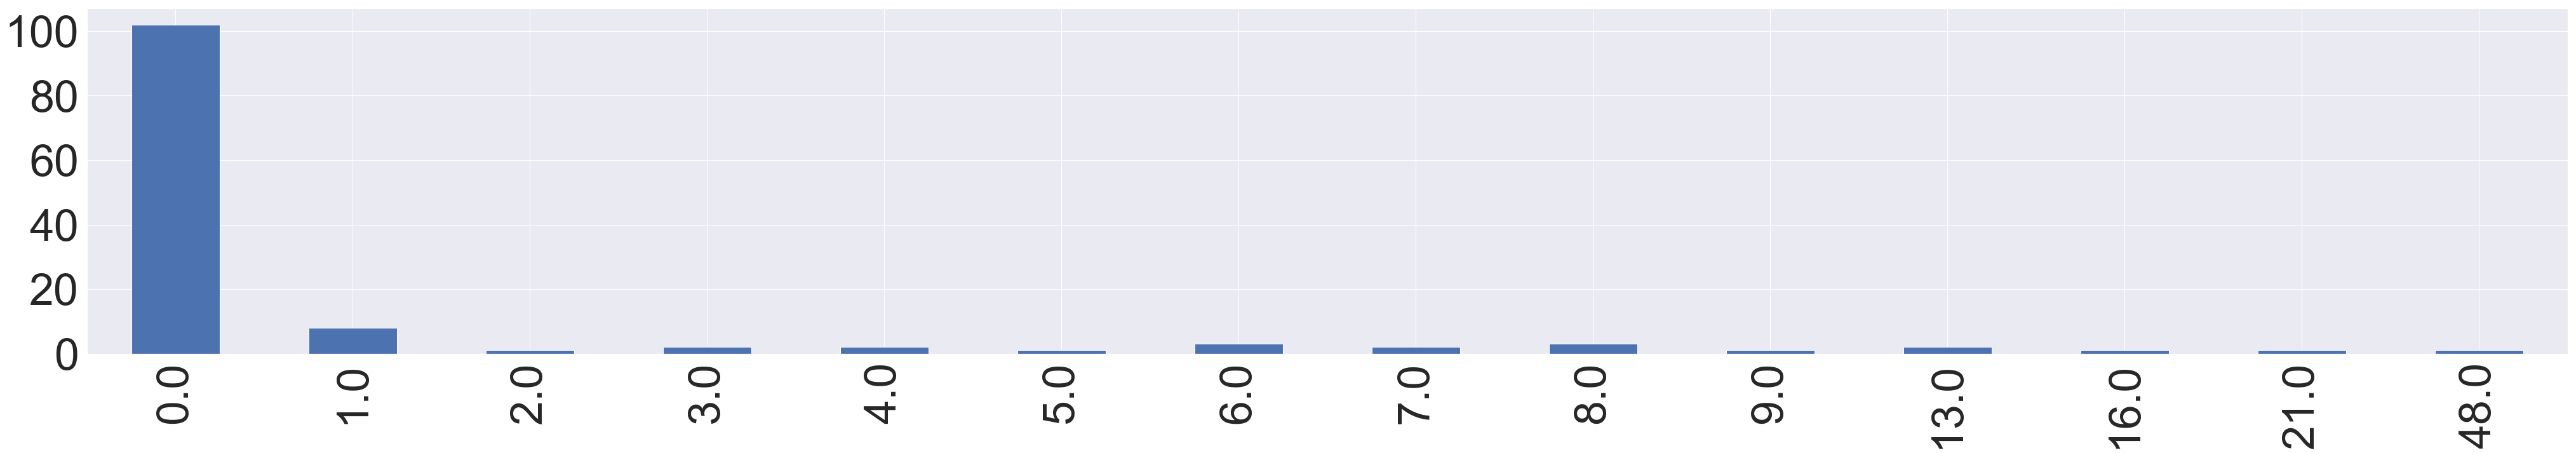

---- ncys_count ---


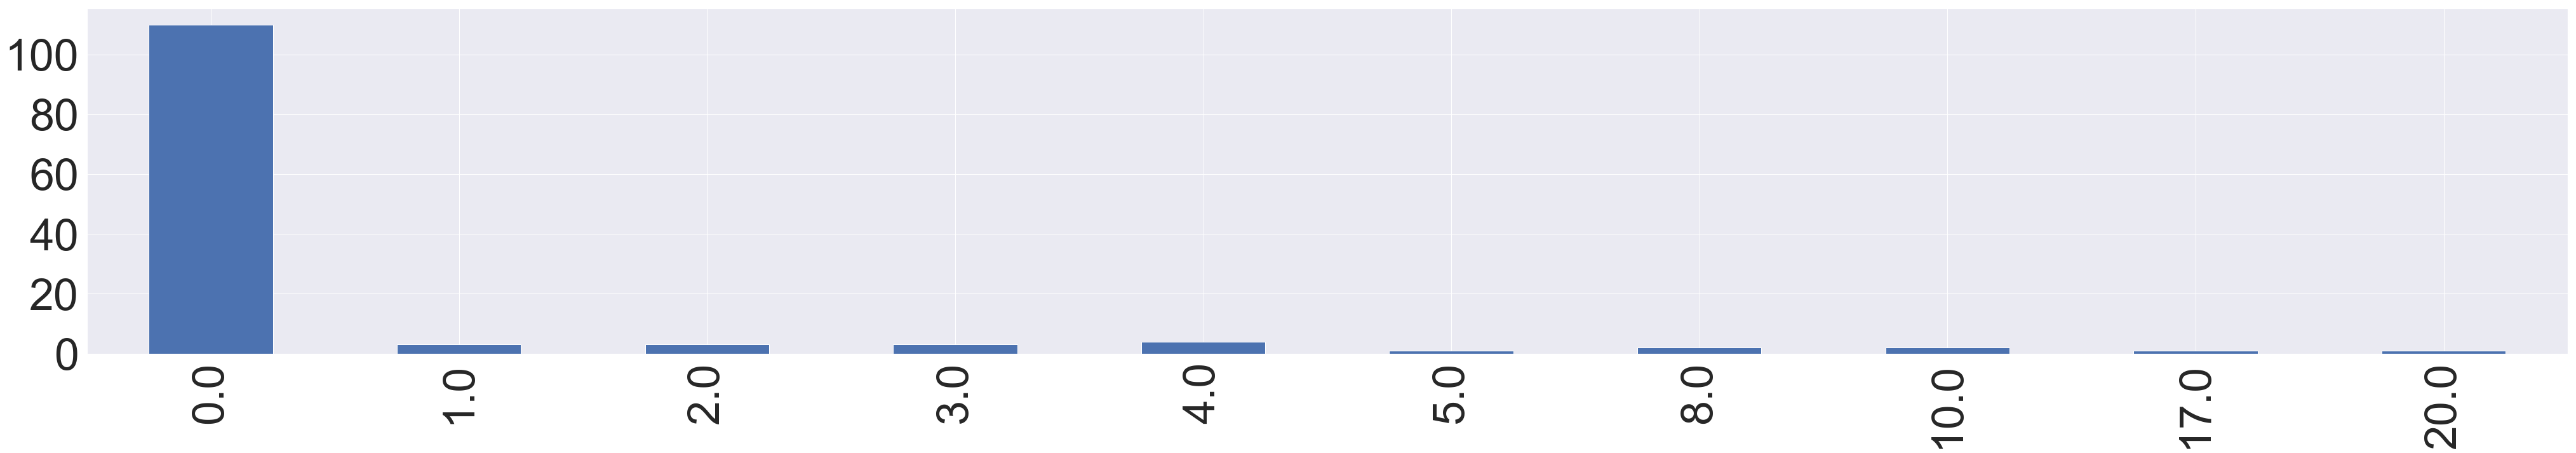

---- tob_check ---


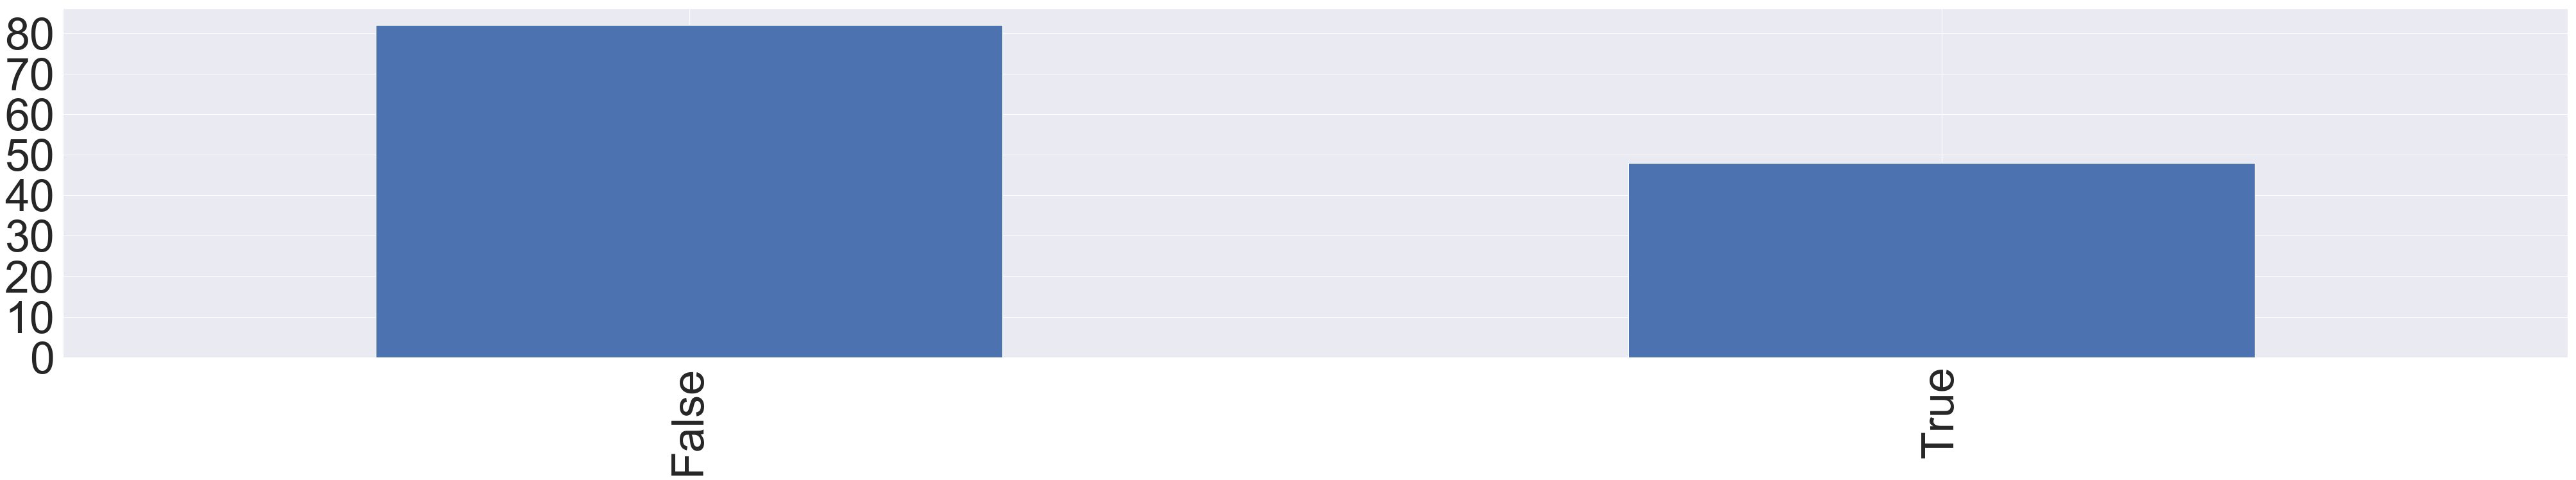

---- ngc_count ---


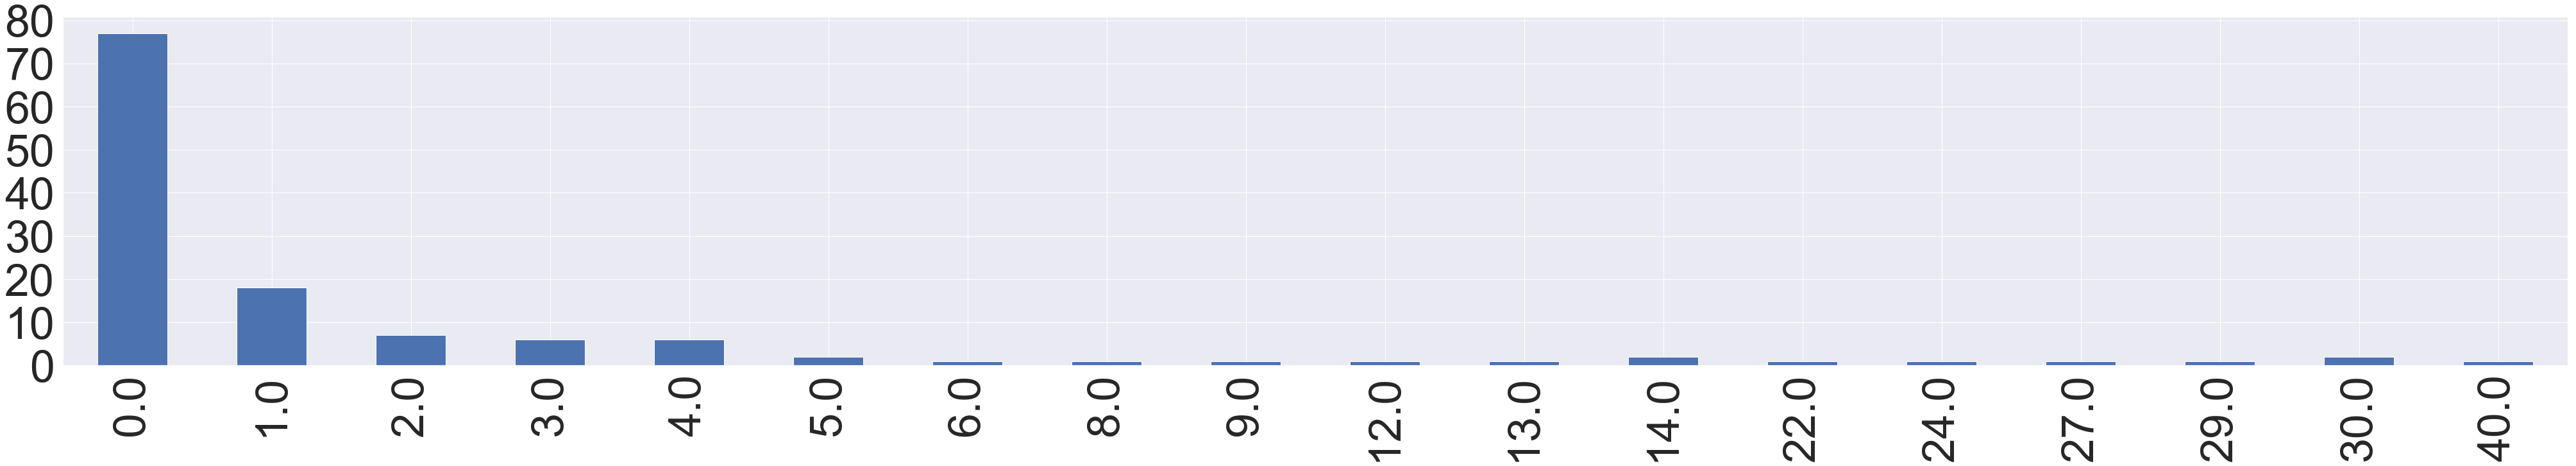

---- ngp_count ---


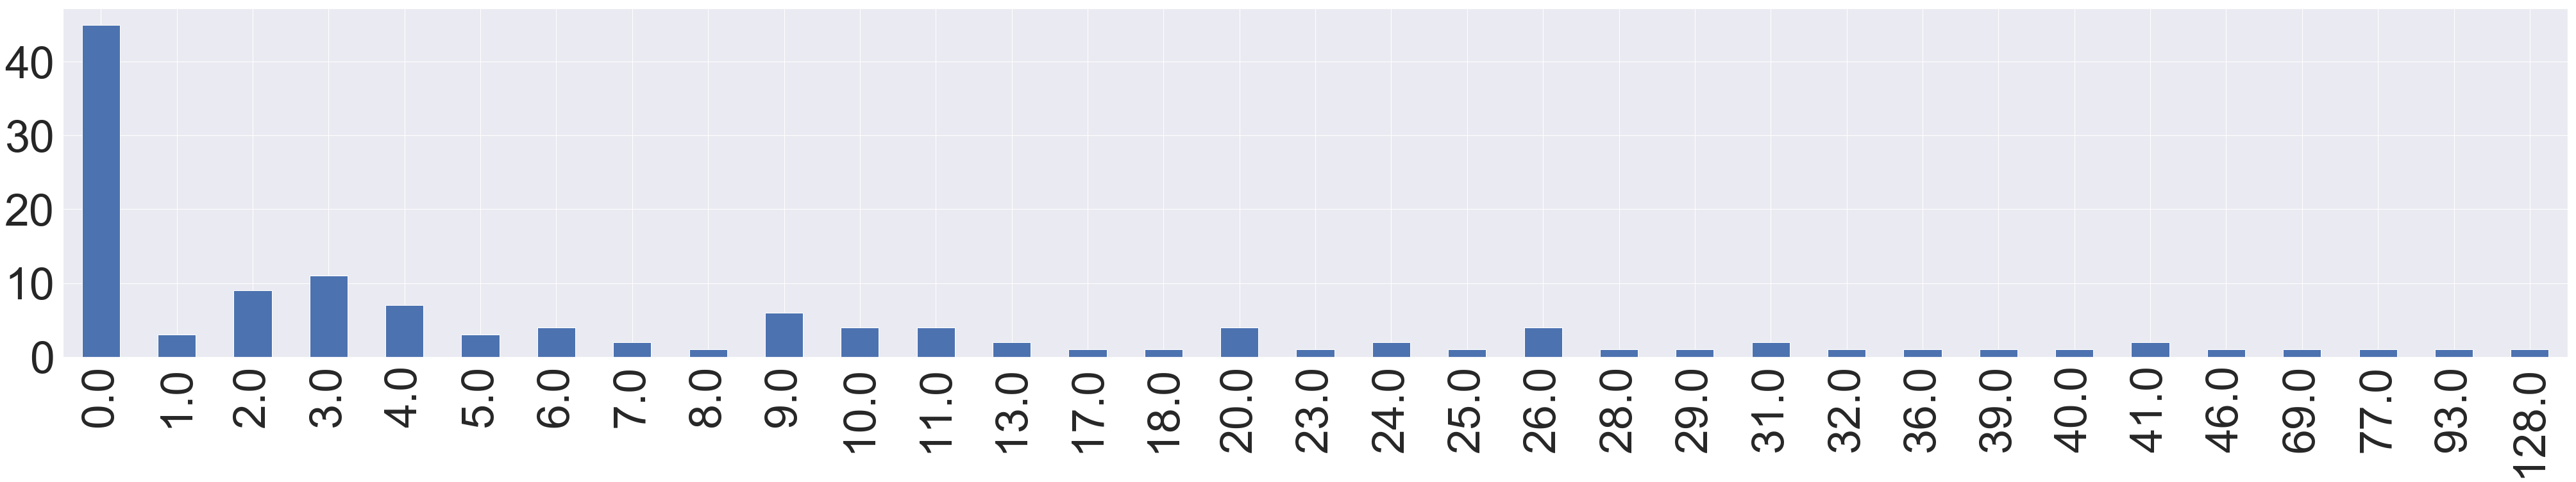

---- ngro_count ---


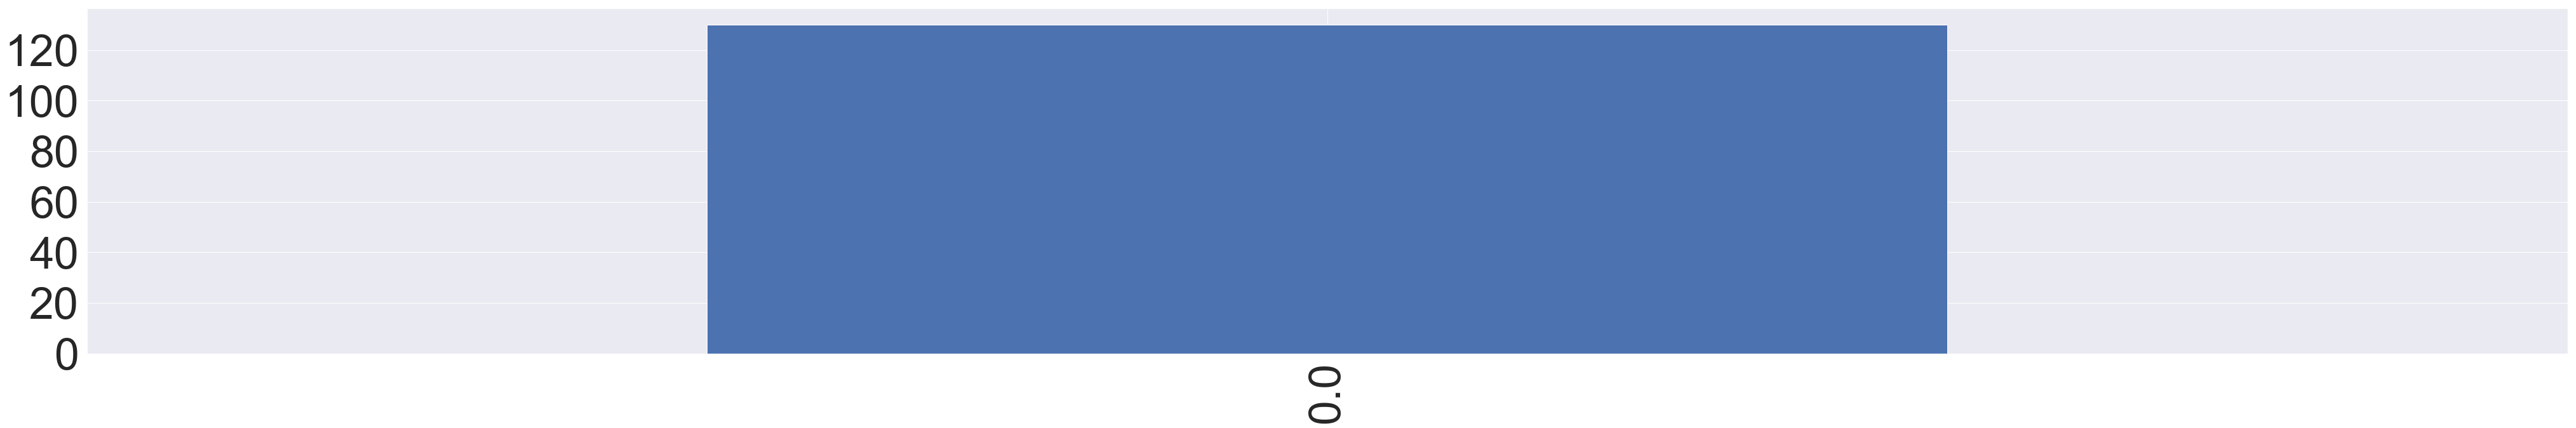

---- npol_count ---


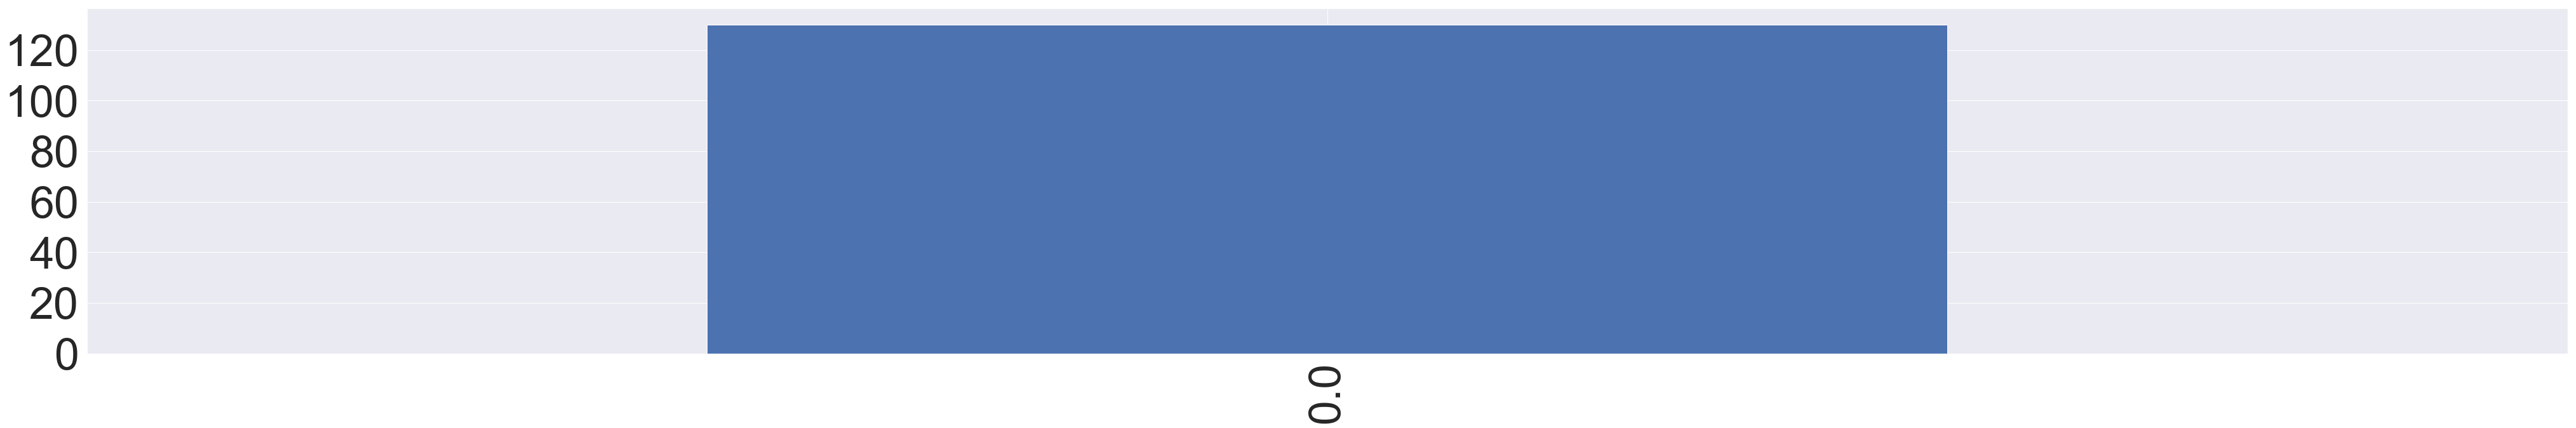

---- nf_count ---


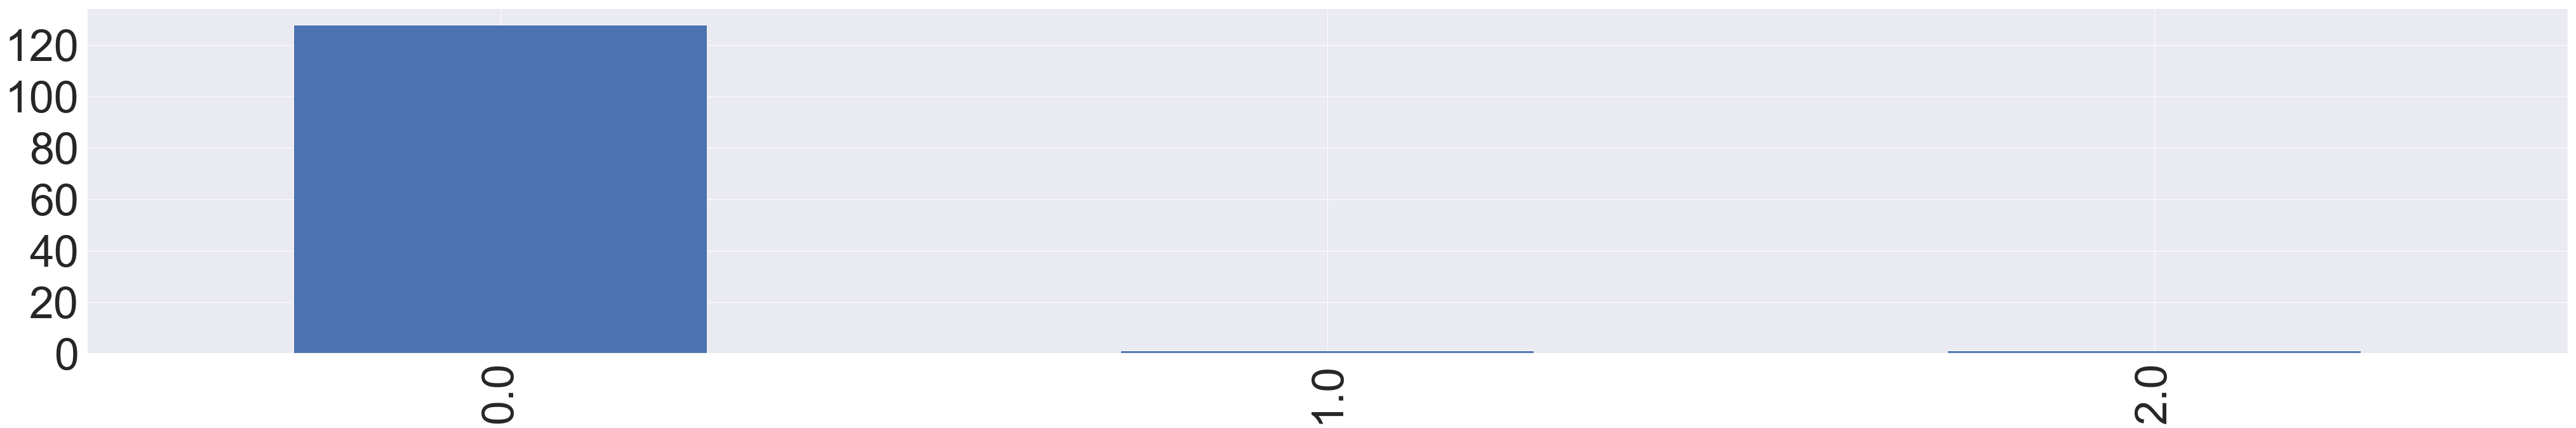

In [16]:
for c in df.columns:
    print("---- {} ---".format(c))
    df_count = df[c].value_counts().sort_index()
    df_count.plot(kind='bar', subplots=False, figsize=(70,10), fontsize=70)
    plt.show()



In [ ]:
#df.loc[df['nf_count'] > 0]

### General statistics

In [17]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 100)
pd.set_option('precision', 2)
description = df.describe()
print(description)


       loc_count  bloc_count  cloc_count  dpt_count  etp_count  nco_count  nkeys_count  \
count     130.00      130.00      130.00     130.00     130.00     130.00       130.00   
mean      128.75       10.63        6.62       5.93       5.96       1.72       115.60   
std       144.52       11.12       13.34       2.02       1.34       2.70       128.59   
min         3.00        2.00        0.00       1.00       2.00       0.00         2.00   
25%        29.75        5.00        3.00       5.00       5.27       0.00        29.50   
50%        72.50        7.00        4.00       6.00       6.00       0.00        64.50   
75%       193.75       12.00        7.00       8.00       6.94       3.00       167.75   
max       662.00       88.00      140.00      10.00       8.28      12.00       636.00   

       ntkn_count  nscm_count  na_count  nc_count  nc_min  nc_max  nc_median  nc_mean  ni_count  \
count      130.00      130.00     130.0    130.00   130.0  130.00     130.00   130.00    1

### Correlation matrix

In [18]:
corr = df.corr(method='pearson')
sns.set(font_scale=2)
plt.figure(figsize = (13,13))
ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap=sns.diverging_palette(220, 10, as_cmap=True))

TypeError: object of type <class 'float'> cannot be safely interpreted as an integer.

<Figure size 936x936 with 0 Axes>

### Boxplots

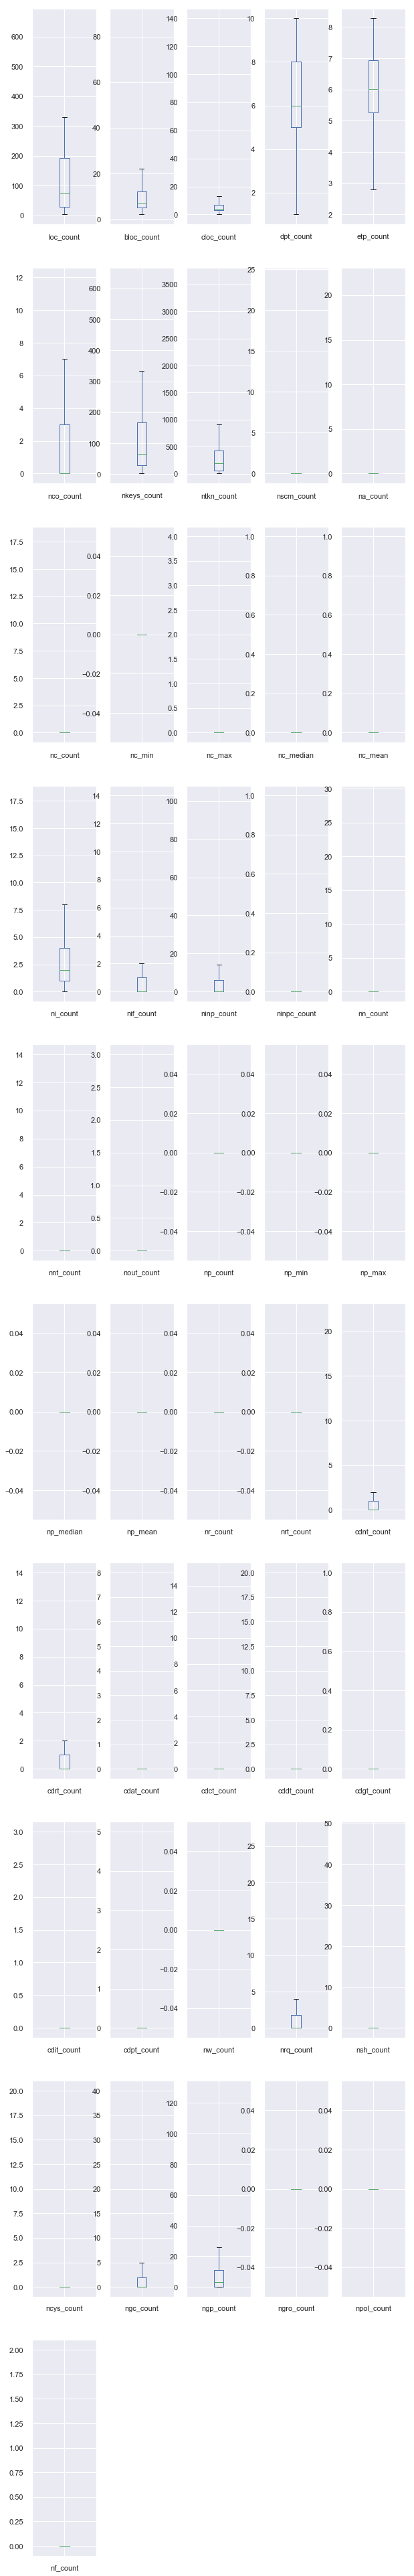

In [27]:
sns.set(font_scale=1)
df.plot(kind='box', subplots=True, layout=(10,5), figsize=(10,70), sharex=False, sharey=False)
plt.show()

### Check nan rows

In [28]:
df1 = df[df['ttb_check'].isna()]
pd.set_option('display.max_rows', 1000)
df[df.isna().any(axis=1)]

#Deze nu ff droppen, dit later fixen!
df = df.dropna()
df[df.isna().any(axis=1)]

Empty DataFrame
Columns: [loc_count, bloc_count, cloc_count, dpt_count, etp_count, nco_count, nkeys_count, ntkn_count, nscm_count, na_count, nc_count, nc_min, nc_max, nc_median, nc_mean, ni_count, nif_count, ninp_count, ninpc_count, nn_count, nnt_count, nout_count, np_count, np_min, np_max, np_median, np_mean, nr_count, nrt_count, ttb_check, cdnt_count, cdrt_count, cdat_count, cdct_count, cddt_count, cdgt_count, cdit_count, cdpt_count, nw_count, tdb_check, nrq_count, nsh_count, ncys_count, tob_check, ngc_count, ngp_count, ngro_count, npol_count, nf_count]
Index: []

## First clustering

In [29]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import normalize

clu_df = df.values
clu_df = normalize(clu_df)

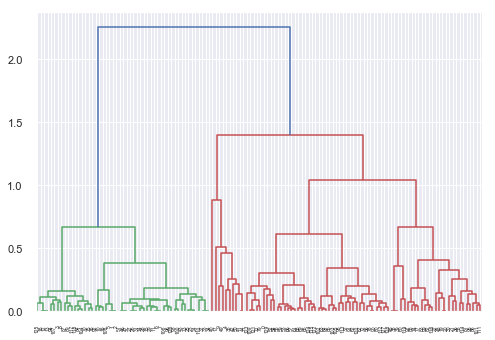

In [30]:
dendrogram = sch.dendrogram(sch.linkage(clu_df, method='ward'))

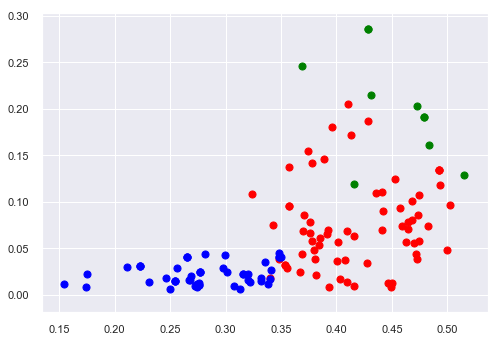

In [31]:
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
model.fit(clu_df)
labels = model.labels_
cluster_prediction = model.fit_predict(clu_df)
labels
plt.scatter(clu_df[labels==0, 0], clu_df[labels==0, 1], s=50, marker='o', color='red')
plt.scatter(clu_df[labels==1, 0], clu_df[labels==1, 1], s=50, marker='o', color='blue')
plt.scatter(clu_df[labels==2, 0], clu_df[labels==2, 1], s=50, marker='o', color='green')
plt.show()


In [32]:
#https://stackoverflow.com/questions/38372188/how-to-add-k-means-predicted-clusters-in-a-column-to-a-dataframe-in-python

df['cluster_prediction'] = pd.Series(cluster_prediction, index=df.index)

df.groupby(df['cluster_prediction']).describe()

#df[df['ttb_check'] == False]

c:\users\s145559\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


loc_count                                                   bloc_count         \
                       count    mean     std   min   25%    50%     75%    max      count   mean   
cluster_prediction                                                                                 
0                       69.0   93.62  109.79  11.0  19.0   52.0  124.00  585.0       69.0  10.04   
1                       51.0  200.49  165.81  38.0  72.0  126.0  251.00  662.0       51.0  13.08   
2                       10.0    5.30    1.83   3.0   3.5    5.5    6.75    8.0       10.0   2.20   

                                                      cloc_count                               \
                      std  min  25%   50%   75%   max      count   mean    std  min  25%  50%   
cluster_prediction                                                                              
0                   10.04  3.0  5.0   7.0  11.0  69.0       69.0   4.91   4.54  0.0  3.0  3.0   
1                   12.69  3.0  7.0  10.0  15.5  88.0       51.0  10.10  20.18  1.0  3.0  5.0   
2                    0.42  2.0  2.0   2.0   2.0   3.0       10.0   0.70   1.57  0.0  0.0  0.0   

                                dpt_count                                        etp_count        \
                     75%    max     count  mean   std  min  25%  50%   75%   max     count  mean   
cluster_prediction                                                                                 
0                   7.00   31.0      69.0  6.03  1.86  2.0  5.0  6.0  7.00   9.0      69.0  5.68   
1                   7.00  140.0      51.0  6.53  1.60  4.0  6.0  6.0  8.00  10.0      51.0  6.96   
2                   0.75    5.0      10.0  2.20  0.63  1.0  2.0  2.0  2.75   3.0      10.0  2.82   

                                                       nco_count                                  \
                     std   min   25%   50%   75%   max     count  mean   std  min  25%  50%  75%   
cluster_prediction                                                                                 
0                   0.82  4.00  5.06  5.75  6.30  7.45      69.0  0.81  1.55  0.0  0.0  0.0  1.0   
1                   0.74  5.31  6.61  6.96  7.44  8.28      51.0  3.27  3.36  0.0  0.0  2.0  5.0   
2                   0.64  2.00  2.20  2.81  3.32  3.70      10.0  0.00  0.00  0.0  0.0  0.0  0.0   

                         nkeys_count                                                     \
                     max       count    mean     std   min    25%    50%     75%    max   
cluster_prediction                                                                        
0                    6.0        69.0   94.70  117.39   7.0  18.00   48.0  121.00  636.0   
1                   12.0        51.0  165.69  135.22  32.0  61.00  132.0  214.00  635.0   
2                    0.0        10.0    4.40    1.43   2.0   3.25    4.5    5.75    6.0   

                   ntkn_count                                                      nscm_count  \
                        count    mean     std    min     25%    50%    75%     max      count   
cluster_prediction                                                                              
0                        69.0  181.52  229.15   16.0   40.00   88.0  245.0  1323.0       69.0   
1                        51.0  702.00  674.13  117.0  226.50  425.0  832.5  3631.0       51.0   
2                        10.0    7.70    3.20    4.0    4.75    7.0   10.0    13.0       10.0   

                                                         na_count                                  \
                    mean   std  min  25%  50%  75%   max    count  mean   std  min  25%  50%  75%   
cluster_prediction                                                                                  
0                   0.01  0.12  0.0  0.0  0.0  0.0   1.0     69.0  0.29  1.02  0.0  0.0  0.0  0.0   
1                   0.76  3.46  0.0  0.0  0.0  0.0  24.0     51.0  1.39  3.89  0.0  0.0  0.0  0.5  

## Pandas profiling

In [33]:
profile = df.profile_report(title='Pandas Profiling Report')
profile.to_file(output_file="industry_pandas profiling.html")

In [ ]:
(df[df['cluster_prediction'] == 0])

In [ ]:
(df[df['cluster_prediction'] == 1])

In [ ]:
false_df = (df[df['ttb_check'] == False])

In [ ]:
for c in false_df.columns:
    print("---- {} ---".format(c))
    df_count = false_df[c].value_counts().sort_index()
    df_count.plot(kind='bar', subplots=False, figsize=(70,10), fontsize=70)
    plt.show()